<font size="+2"> Machine Learning Project - Global Data on Sustainable Energy</font>

**Date:** 27th of May 2024

**Authors:** Elsa Dhnt, Jonas Gran Melandsør, Thai Doãn Kiên

4GMM, INSA Toulouse

# Introduction

The Global Data on Substainable Energy is a dataset from the [website of the KAGGLE competition](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy). It includes data for $21$ different varaibles, such as CO2-emission, percentage of countries power consumption that is renewable, etc., for $176$ countries during the time periode $2000-2020$. We have used this data to predict the CO2-emissions using linear regression, support vector machine regression, CART, random forest, boosting and neural networks. We are comparing the methods by looking at the error of the training and test samples separate, as well as their time consumption. We are also comparing the performance of different techniques for handeling missing values.

In [1]:
library(ggplot2)           # For plotting
library(tidyverse)
library(gridExtra)
library(GGally)
library(corrplot)          # For Correlation plot
library(Hmisc)             # For plotting of histograms
library(FactoMineR)
library(factoextra)
library(reshape2)
library(caret)
library(glmnet)
library(ggfortify)
library(e1071)              
library(rpart)              # For CART
library(rpart.plot)
library(partykit)
library(randomForest)       # For random forest
library(ggRandomForests)
library(gbm)                # For Boosting
library(MASS)               # For Neural Networkss
library(nnet) 
library(missForest)         # For handling missing data
library(VIM)
library(naniar)
library(zoo)                # For LOCF
library(Amelia)             # For AMELIA
library(tictoc)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded


Attachement du package : ‘Hmisc’


Les objets suivants sont masqués depuis ‘package:dplyr’:

    src, summarize


Les objets suivants sont masqués depuis ‘package:base’:

    format.pval, units


Welcome! Want to learn more? See two factoextra-related 

# Preparation of the dataset

In [2]:
globDat = read.table("global-data-on-sustainable-energy.csv", header=TRUE, sep=",") # Importing the data

head(globDat)
summary(globDat)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [3]:
# Removing "," from string since it used as a thousand separation and converting to floats
globDat$Density.n.P.Km2. <- as.numeric(gsub(",","",globDat$Density.n.P.Km2.)) 

globDat$Entity <- as.factor(globDat$Entity)   # Making the variable "Entity" a factor

head(globDat)   # Verifying that the changes

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

## Simple handling of missing values

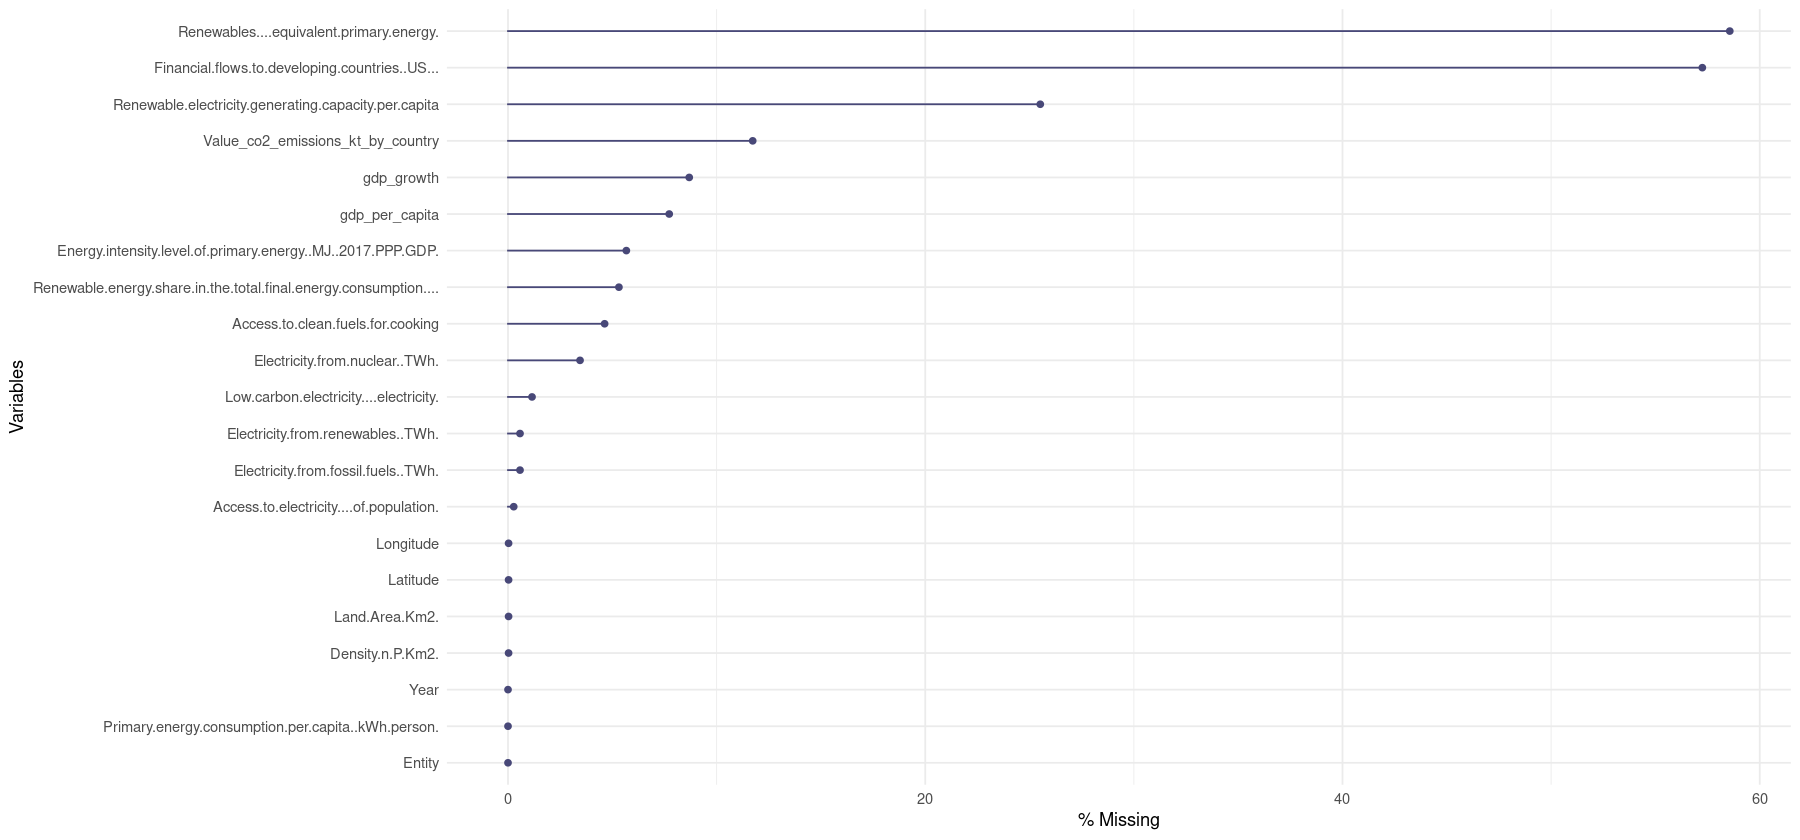

In [4]:
# Finding rate of missing data
options(repr.plot.width=15, repr.plot.height=7)
gg_miss_var(globDat, show_pct=TRUE)

We can see that the variables <em>Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US...</em> and <em>Renewables....equivalent.primary.energy.</em> have a lot of missing values. Thus they are not interesting for our prediction. 

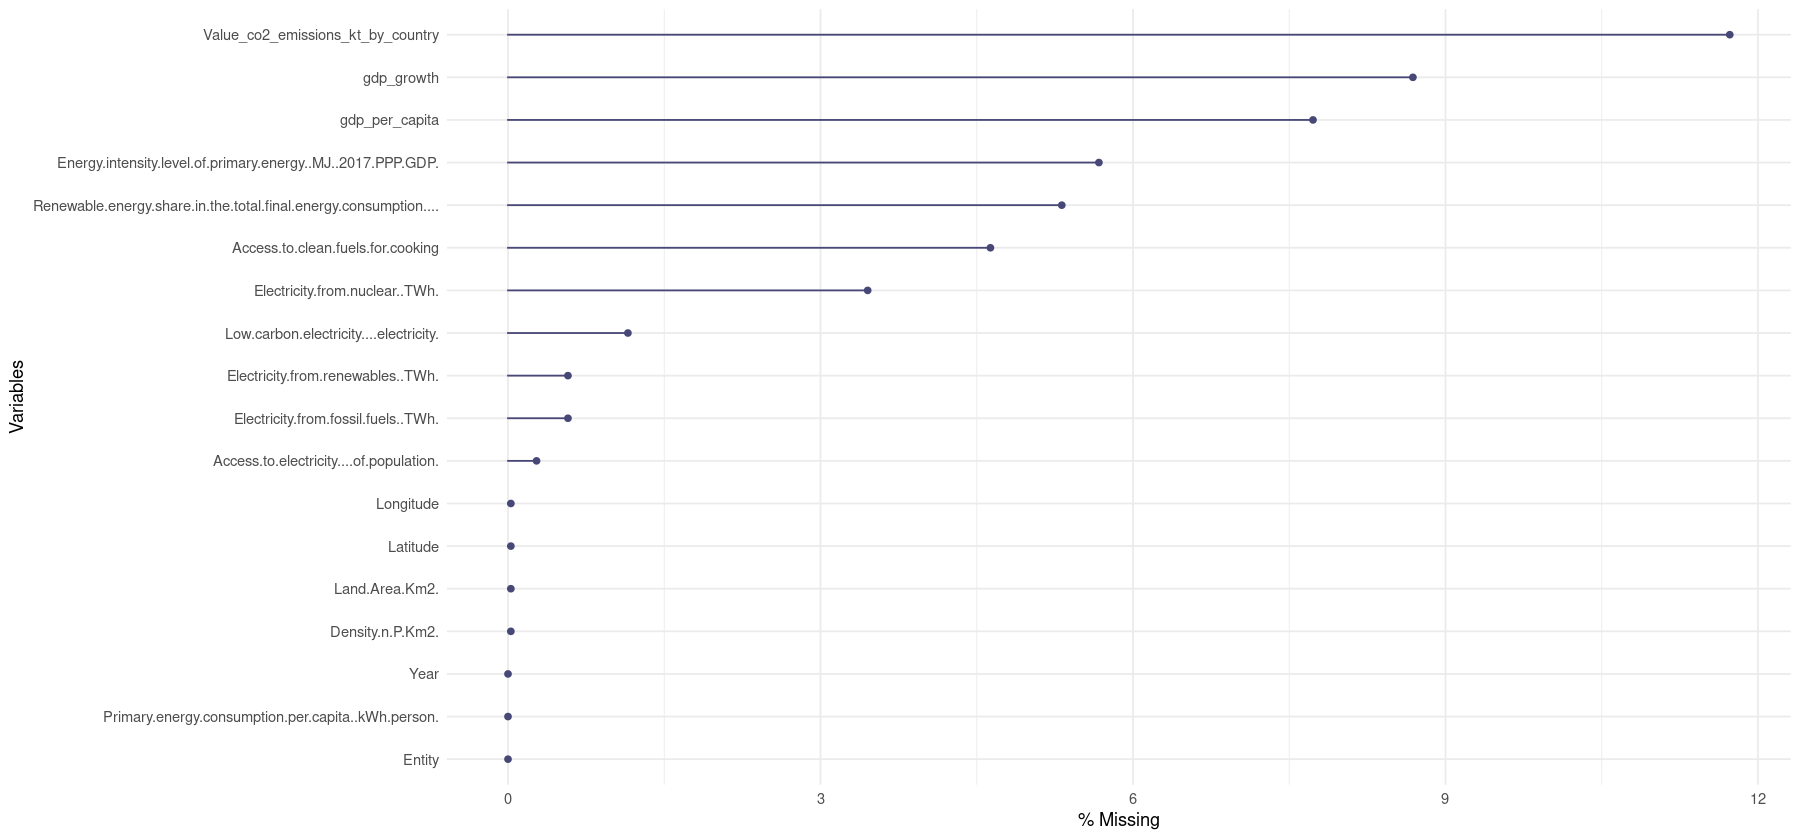

In [5]:
globDat = globDat[, -c(5,6,15)]      # Removing the variables with most missing values

gg_miss_var(globDat, show_pct=TRUE)  # PLotting the rate of missing values for the remaining variables

The variable with the highest ratio of missing number is the <em>Value_co2_emmission_kt_by_country</em>, with a ratio of missing value of $12\%$. This is high, but we will still delete all the missing values. In the last section we will look at other ways to handle the missing values.

In [6]:
globDatNa = globDat        # Creating a data frame to be used for the part with the missing value treatment
globDat = na.omit(globDat) # Removing all remaining NA-values
dim(globDat)

[1] 2868   18

The dataframe now consist of $2868$ entries for $18$ variables, without any missing value.

## Transforming the dataset

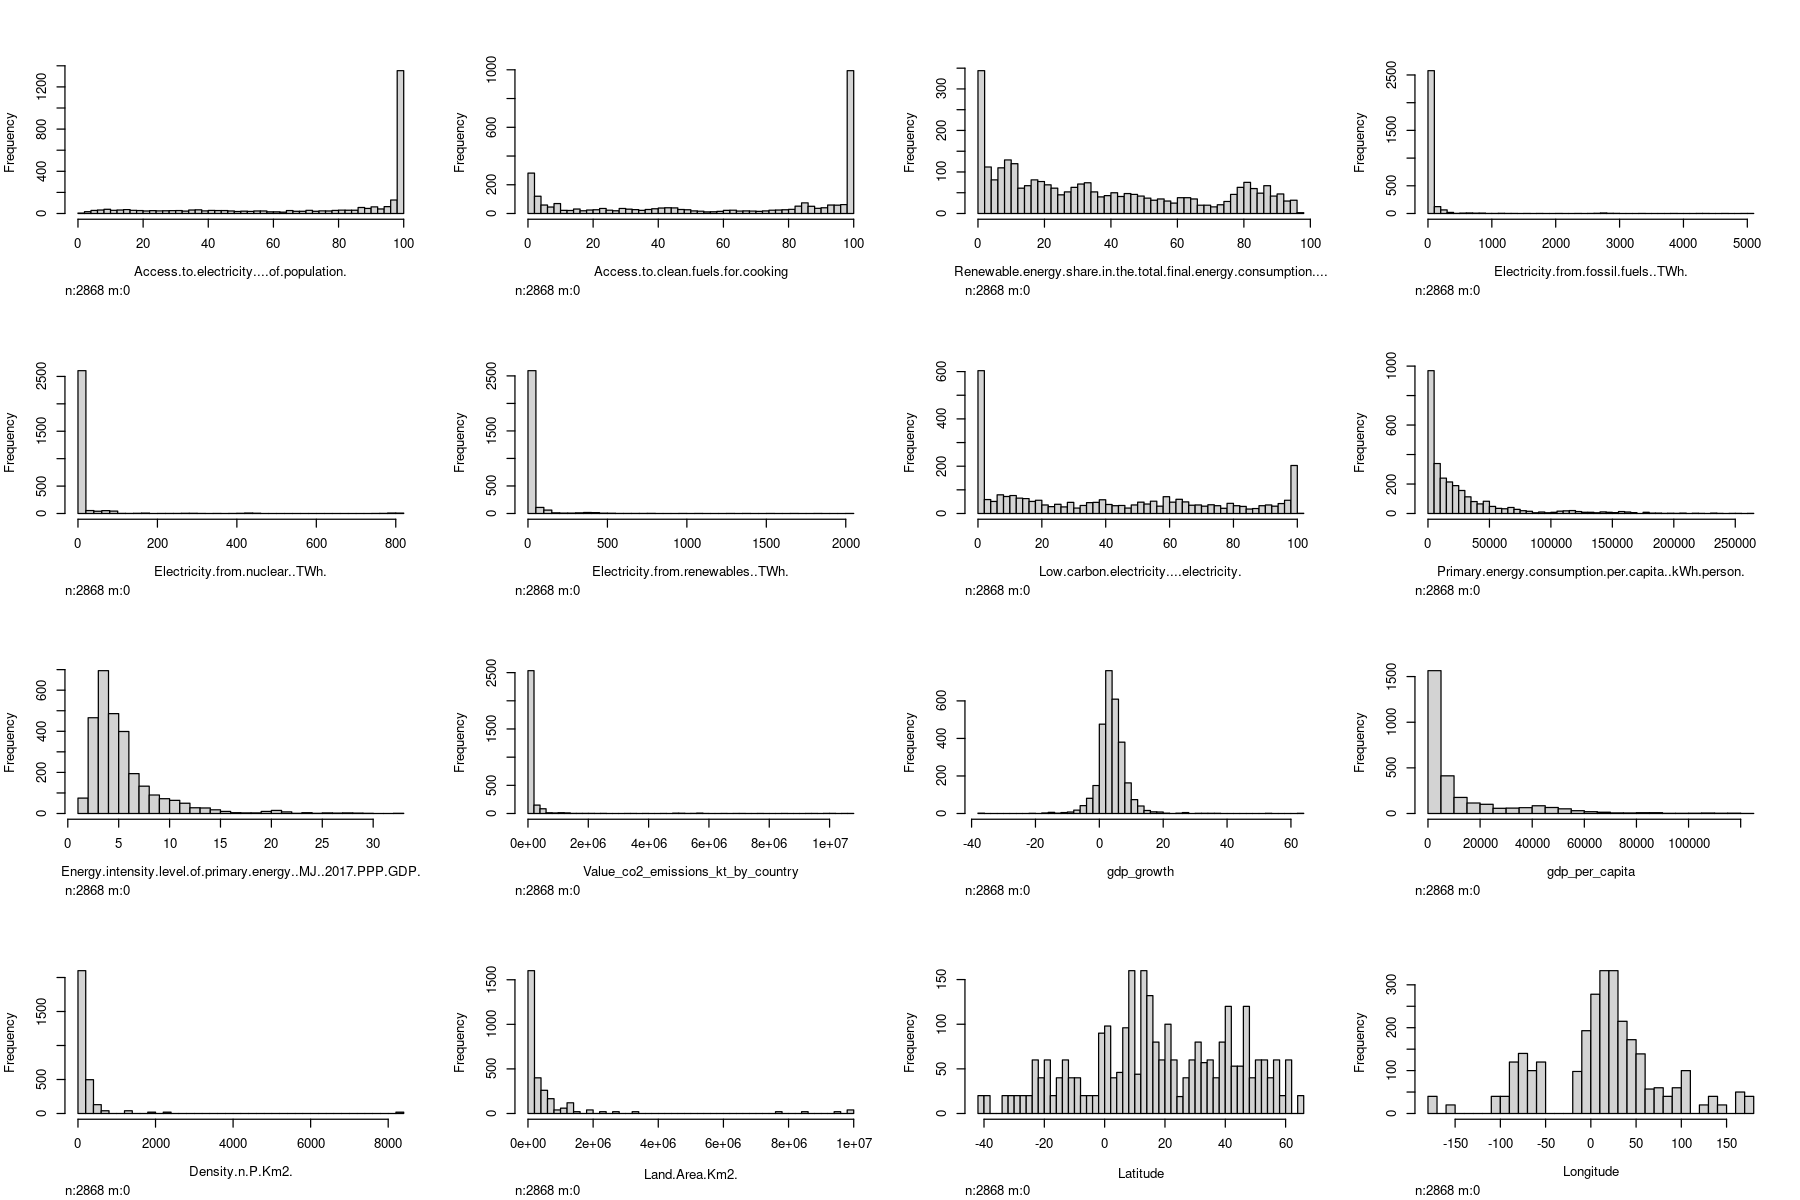

In [7]:
# Histograms
options(repr.plot.width=15, repr.plot.height=10)
hist.data.frame(globDat[,-c(1,2)])  # Removing the qualitative variable "Entity" and "Year" 
                             # as we do not want to normalize this variable as each we will use it as a label later

The different variables have quite different distributions, with many of them really skewed, such as the <em>Energy intensity level of primary energy...</em>. Some of the methods we are going to use demand that the data is Gaussian distributed, such as the linear regression. Therefore we do a set of non-linear transformation on the quantitative data such that they nearly follow a normal distribution. We have used sqrt- and log-transformations. Some variables, do not become normalized using this transformations, such as the <em>Access.to.electricity....of.population.</em>. We do also not transform the <em>latitude, longitude</em> and <em>gdp-growth</em> as they are close to gaussian already.

In [8]:
globDatTrans <- globDat       # Creating a new data frame for transformed variables

globDatTrans[, 'S(ElecAcce)'] <- sqrt(globDat[, 'Access.to.electricity....of.population.'])

globDatTrans[, 'S(CleFueAcce)'] <- sqrt(globDat[, 'Access.to.clean.fuels.for.cooking'])

globDatTrans[, 'S_RenewEner'] <- sqrt(globDat[, 'Renewable.energy.share.in.the.total.final.energy.consumption....'])

globDatTrans[, 'L(FossElec)'] <- log(globDat[, 'Electricity.from.fossil.fuels..TWh.']+1e-6)

globDatTrans[, 'L(NuclElec)'] <- log(globDat[, 'Electricity.from.nuclear..TWh.']+1e-6)

globDatTrans[, 'L(RenewElec)'] <- log(globDat[, 'Electricity.from.renewables..TWh.']+1e-6)

globDatTrans[, 'S(LowCarbElec)'] <- sqrt(globDat[, 'Low.carbon.electricity....electricity.'])

globDatTrans[, 'L(EnerCons/cpt)'] <- log(globDat[, 'Primary.energy.consumption.per.capita..kWh.person.'])

globDatTrans[, 'L(EnerIntens)'] <- log(globDat[, 'Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.'])

globDatTrans[, 'LCO2_emit'] <- log(globDat[, 'Value_co2_emissions_kt_by_country'])

globDatTrans[, 'gdp_growth'] <- globDat[, 'gdp_growth']

globDatTrans[, 'L(GDP/cpt)'] <- log(globDat[, 'gdp_per_capita'])

globDatTrans[, 'L(PopDens)'] <- log(globDat[, 'Density.n.P.Km2.'])

globDatTrans[, 'L(Area)'] <- log(globDat[, 'Land.Area.Km2.'])

globDatTrans[, 'Latitude'] <- globDat[, 'Latitude']

globDatTrans[, 'Longitude'] <- globDat[, 'Longitude']

colnames(globDatTrans)

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Primary.energy.consumption.per.capita..kWh.person."              
[11] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[12] "Value_co2_emissions_kt_by_country"                               
[13] "gdp_growth"                                                      
[14] "gdp_per_capita"                                                  
[15] "Density.n.P.Km2."                                                
[16] "Land.Area.Km2."                                                  
[17] "Latitude"                                                        
[18] "Longitude"                                                       
[19] "S(ElecAcce)"                                                     
[20] "S(CleFueAcce)"                                                   
[21] "S_RenewEner"                                                     
[22] "L(FossElec)"                                                     
[23] "L(NuclElec)"                                                     
[24] "L(RenewElec)"                                                    
[25] "S(LowCarbElec)"                                                  
[26] "L(EnerCons/cpt)"                                                 
[27] "L(EnerIntens)"                                                   
[28] "LCO2_emit"                                                       
[29] "L(GDP/cpt)"                                                      
[30] "L(PopDens)"                                                      
[31] "L(Area)"

At the ned of the dataframe we have added the new transformed variables with shortened names. They are marked with $L$ if they are transformed with $log$ and $S$ if they are transformed with $sqrt$. We will delete the orginal variables.

In [9]:
globDatTrans <- globDatTrans[, c(1,2,19:31,13,17:18)]
colnames(globDatTrans)
dim(globDatTrans)

[1] "Entity"          "Year"            "S(ElecAcce)"     "S(CleFueAcce)"  
 [5] "S_RenewEner"     "L(FossElec)"     "L(NuclElec)"     "L(RenewElec)"   
 [9] "S(LowCarbElec)"  "L(EnerCons/cpt)" "L(EnerIntens)"   "LCO2_emit"      
[13] "L(GDP/cpt)"      "L(PopDens)"      "L(Area)"         "gdp_growth"     
[17] "Latitude"        "Longitude"

[1] 2868   18

In [10]:
options(repr.plot.width=15, repr.plot.height=7)  
globDatQuanti <- select_if(globDatTrans, is.numeric)

sprintf("Size of globDatQuanti: Numer of rows: % s, Number of columns % s", nrow(globDatQuanti),ncol(globDatQuanti))

[1] "Size of globDatQuanti: Numer of rows: 2868, Number of columns 17"

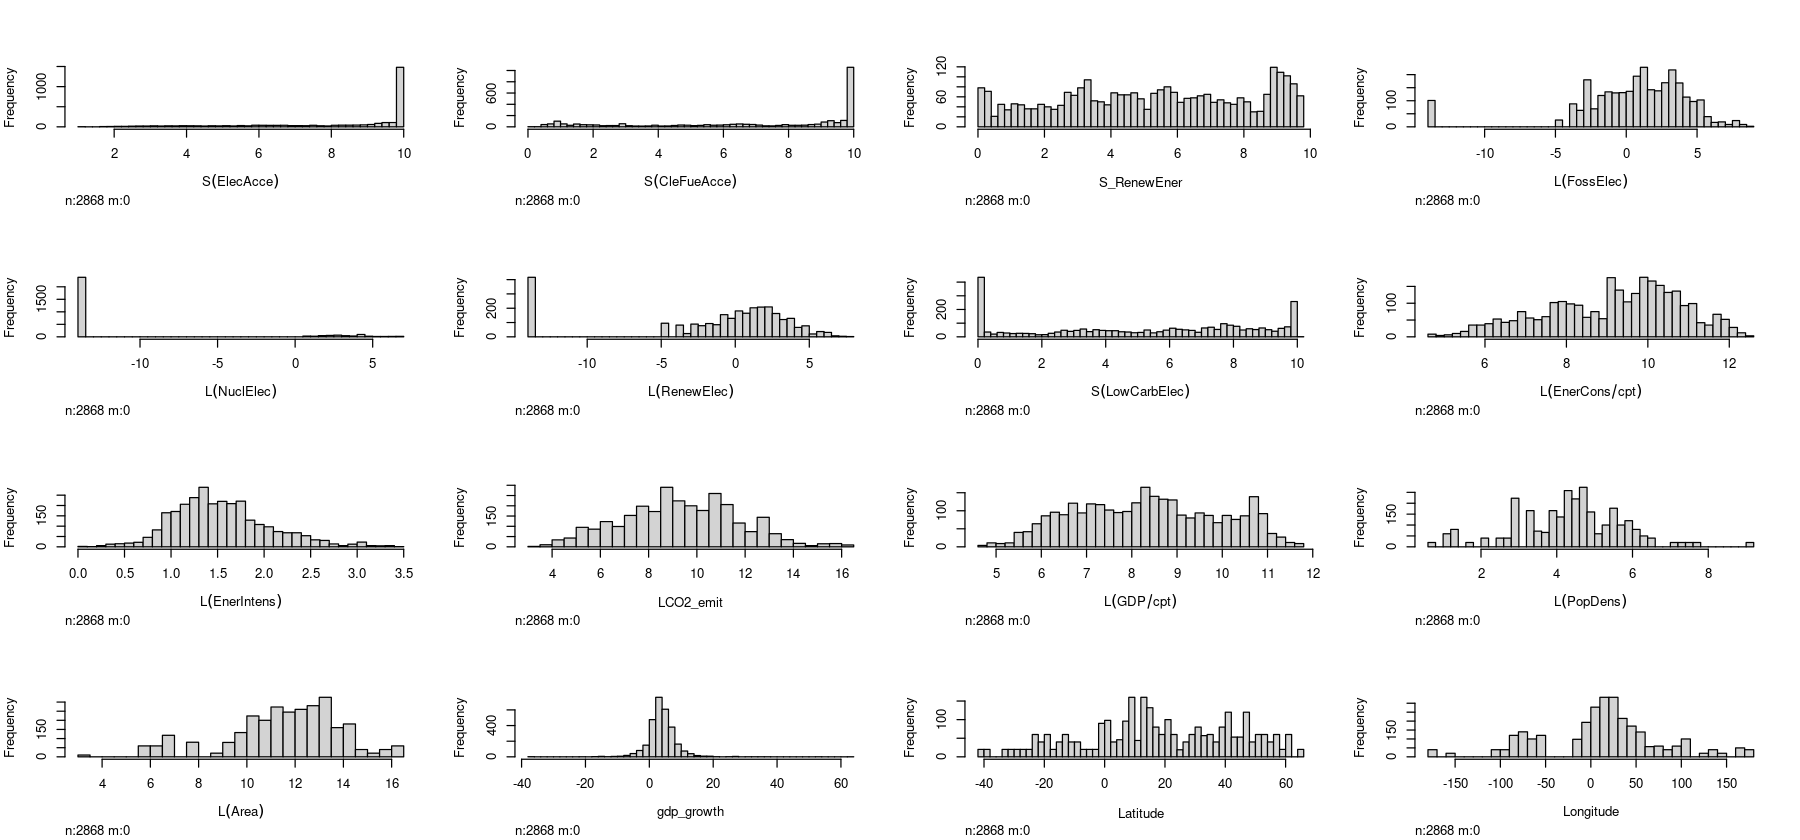

In [11]:
hist.data.frame(globDatQuanti[,-c(1)])  # Removing Year as this is not normalized

The first two variables are far from normalized. The rest are not perfectly Gaussian, but we will use them like this still.

## Investigation of the variable <em>LCO2_emit</em>

Since we are going to predict the <em>LCO2_emit</em> using different methods later in this notebook, we would like to get better knowlege about the variable. First we are going to look at the heterogeneity of this varaible. Secondly we would like to look at the relation between the CO2-emission and the variable year, as this is quite relevant due of the climate awareness of today.

### Visualizing heterogeneity

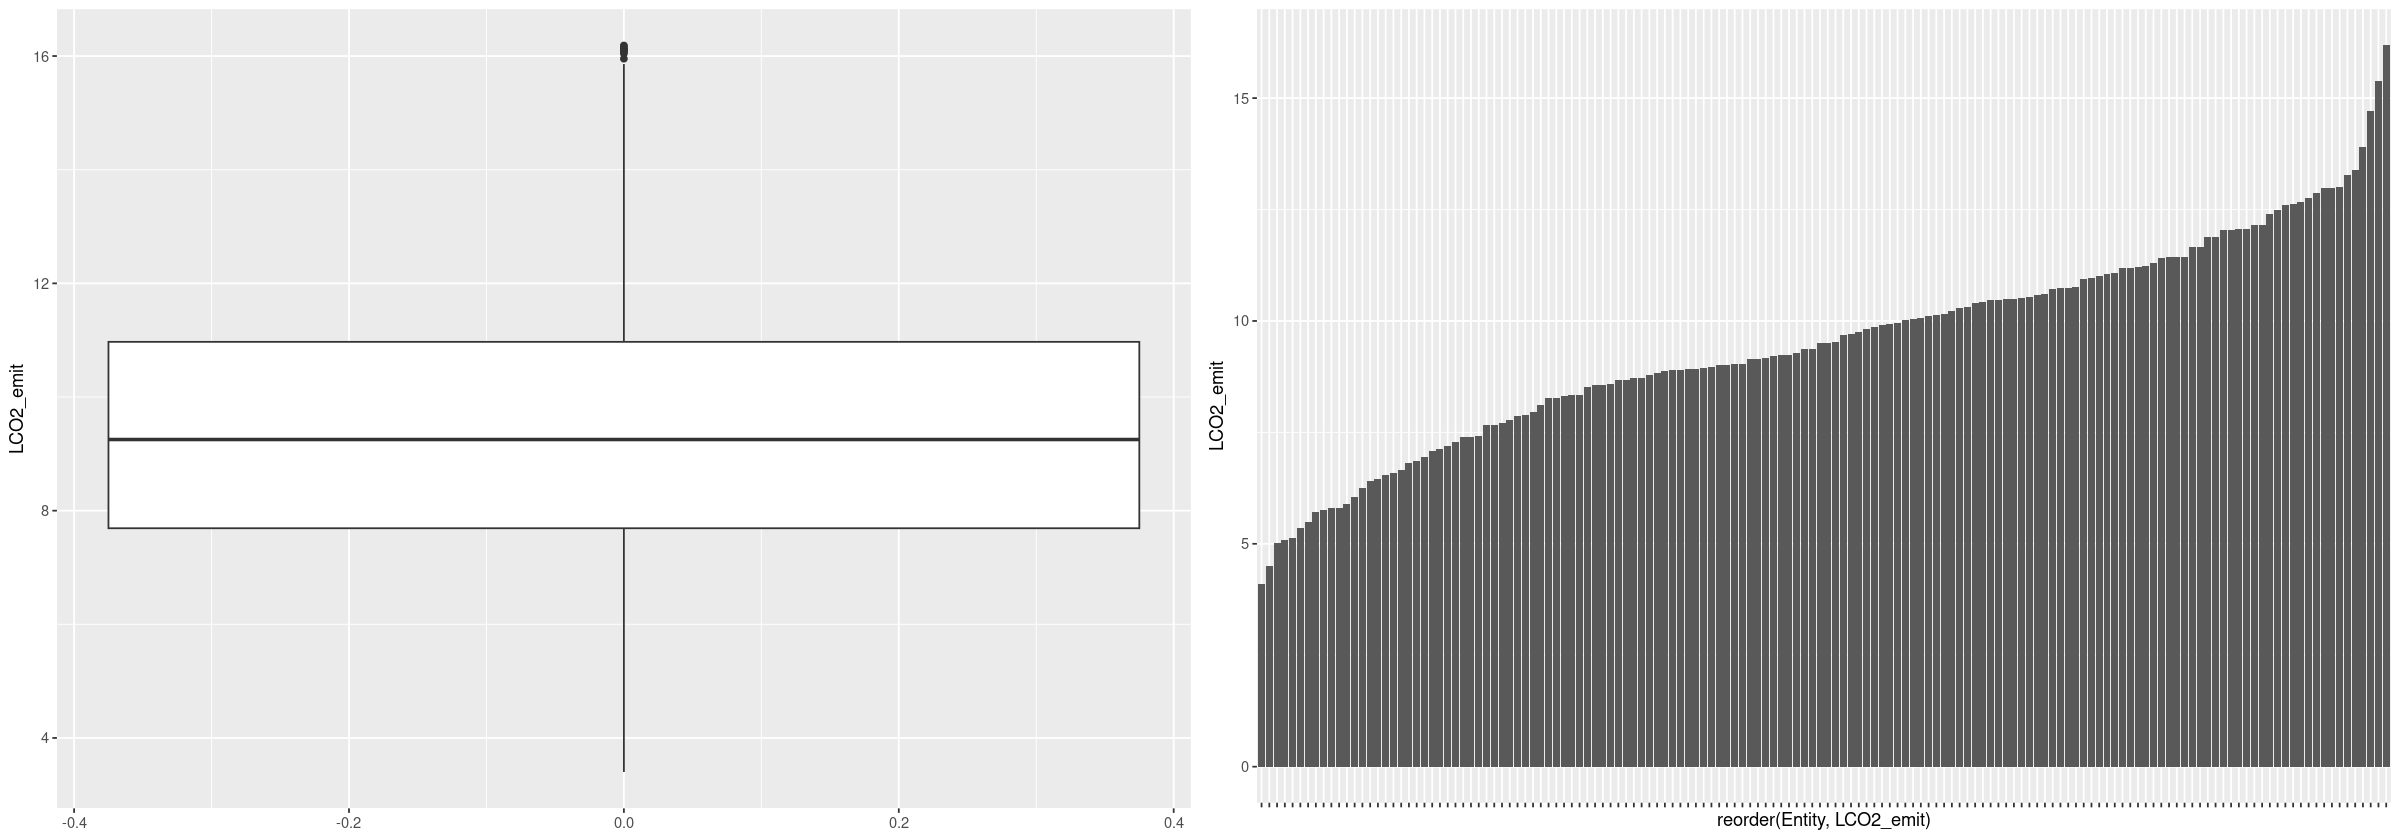

In [12]:
options(repr.plot.width=20, repr.plot.height=7)

p1 <- ggplot(globDatTrans, aes(y=LCO2_emit)) + geom_boxplot()

CO2perEntity <- globDatTrans[, c(1, 2, 12)]

CO2perEntity2019 <- globDatTrans[globDatTrans$Year == 2019,][,c(1,12)]   # Filtering out data from 2019 only
p2 <- ggplot(CO2perEntity2019, aes(x=reorder(Entity,LCO2_emit), y=LCO2_emit)) + 
    geom_col() + theme(axis.text.x=element_blank())

grid.arrange(p1,p2, ncol=2)

From  the boxplot to the left, we see that the whiskers are quite far from the median in both direction, and since the scale is logaritmic, the span is quite large. Therefore the heterogeneity is quite large for the variable <em>LCO2_emit</em>. This observation is backed up by the column-plot th the right, where we can see that highest emitting country emits three times as much on the logarithmic scale, resulting in a ratio of $22026$ more than the least emitting one. The slope is also quite steep for the contries far to the right, i.e. the most emitting countries, indicating that they produce much more CO2, than the other countries. To check which entities that is a part of the highest emitters, we find the five countries with the highest value in <em>LCO2_emit</em>. 

            Entity Year LCO2_emit
3503 United States 2000  15.56919
715          China 2000  15.02343
1682         Japan 2000  13.98323
1535         India 2000  13.75136
1283       Germany 2000  13.62952
3504 United States 2001  15.56441
716          China 2001  15.07655
1683         Japan 2001  13.97284
1536         India 2001  13.76794
1284       Germany 2001  13.65026
3505 United States 2002  15.53703
717          China 2002  15.15316
1684         Japan 2002  14.00332
1537         India 2002  13.80085
1285       Germany 2002  13.63325
3506 United States 2003  15.54876
718          China 2003  15.30072
1685         Japan 2003  14.01021
1538         India 2003  13.82721
1286       Germany 2003  13.63733
3507 United States 2004  15.56267
719          China 2004  15.44961
1686         Japan 2004  14.00601
1539         India 2004  13.89771
1287       Germany 2004  13.61836
720          China 2005  15.57761
3508 United States 2005  15.56532
1687         Japan 2005  14.00846
1540         I

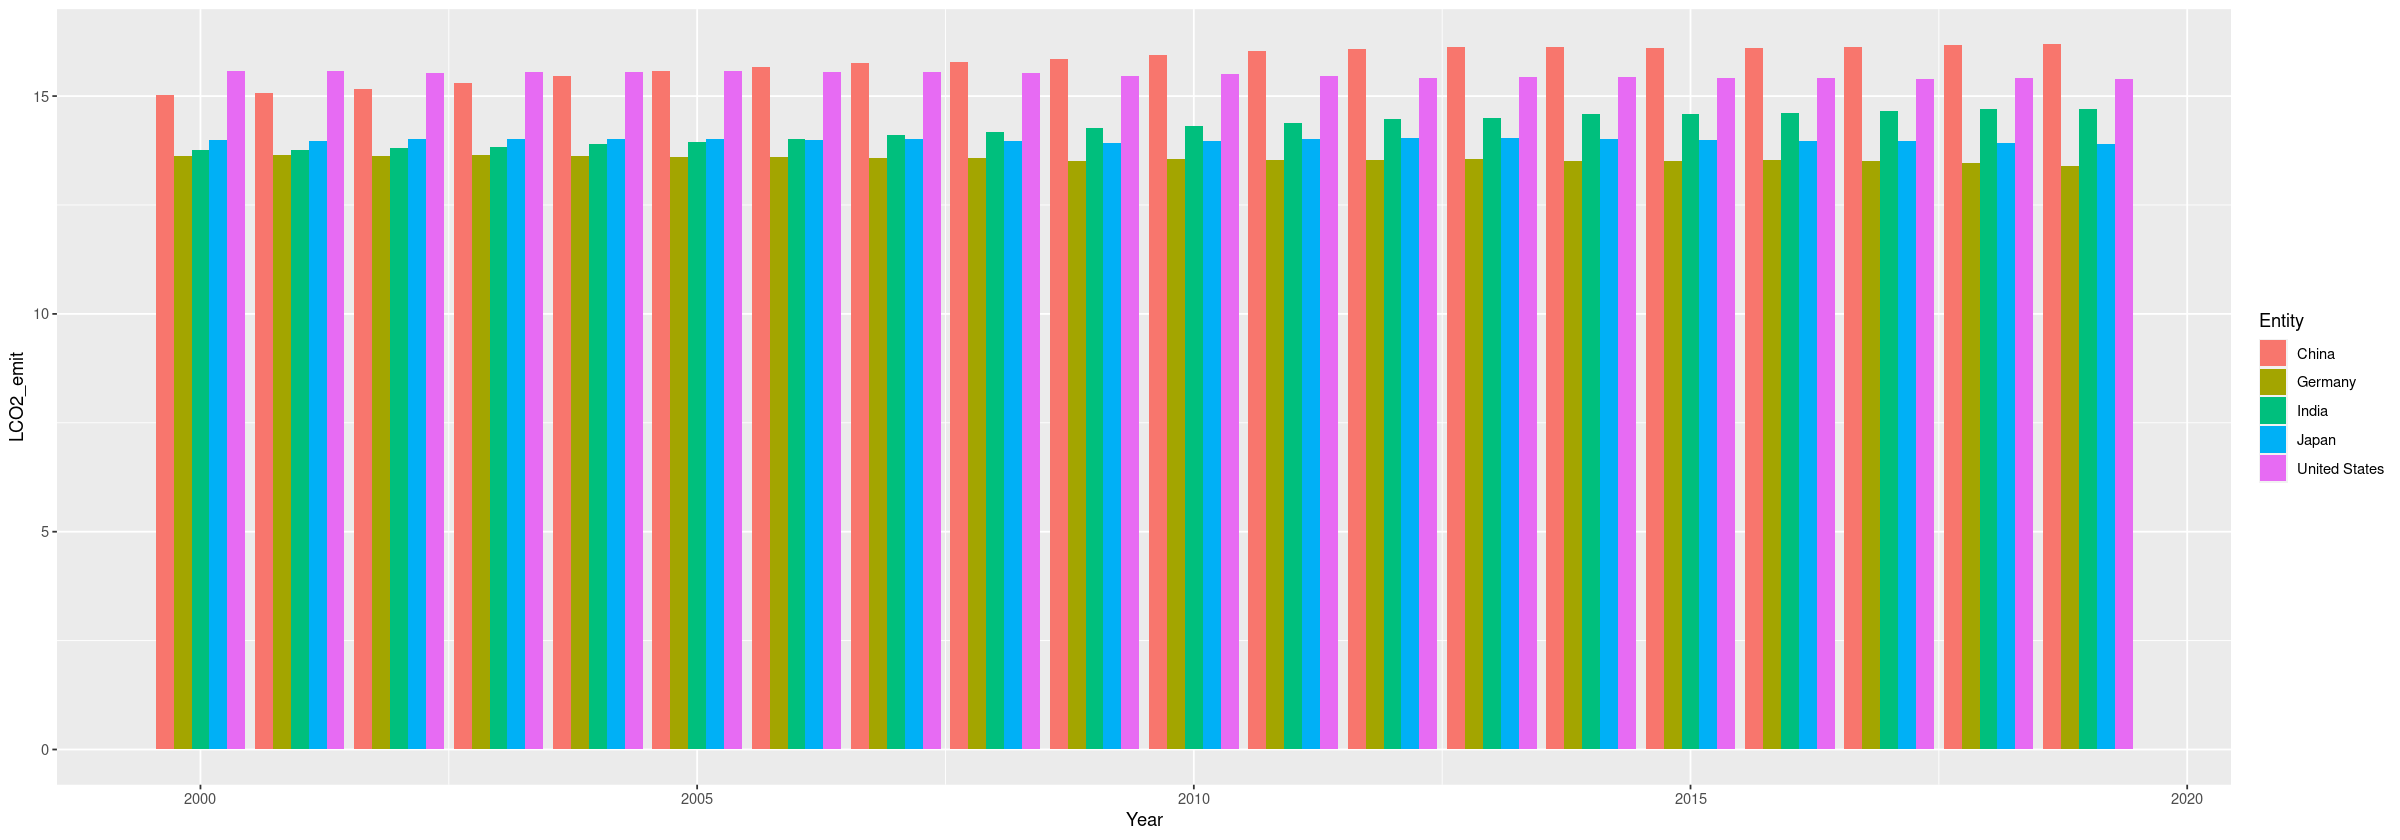

In [13]:
# Sorting by Year (low to high) and LCO2_emit (high to low)
CO2perEntity <- CO2perEntity[with(CO2perEntity, order(Year, -LCO2_emit)), ] 

topFivePolutioner <- Reduce(rbind,by(CO2perEntity, CO2perEntity$Year, head, n=5)) #Selecting the 5 highest
print(topFivePolutioner)

ggplot(topFivePolutioner, aes(x=Year, y=LCO2_emit)) + geom_col(aes(fill=Entity),position='dodge')

It is the five same countries which are emitting most each year, <em>Germany, Japan, India, USA</em> and <em>China</em>. The order is not the same each year, though, as <em>China</em> surpasses <em>USA</em> in $2005$, as well as <em>India</em> exceeds <em>Japan</em> in $2006$. What is more important is that the five emitting countires do not change in the dataset and that they are all present each year. This is important for comfirming whether the <em>LCO2_emit</em> increases as function of <em>Year</em>, as not all countries have registered their CO2-emission each year, which can make an impact on the sum of <em>LCO2_emit</em> pear year.

### Looking at possible dependency between  variables <em>LCO2_emit</em> and <em>Year</em>

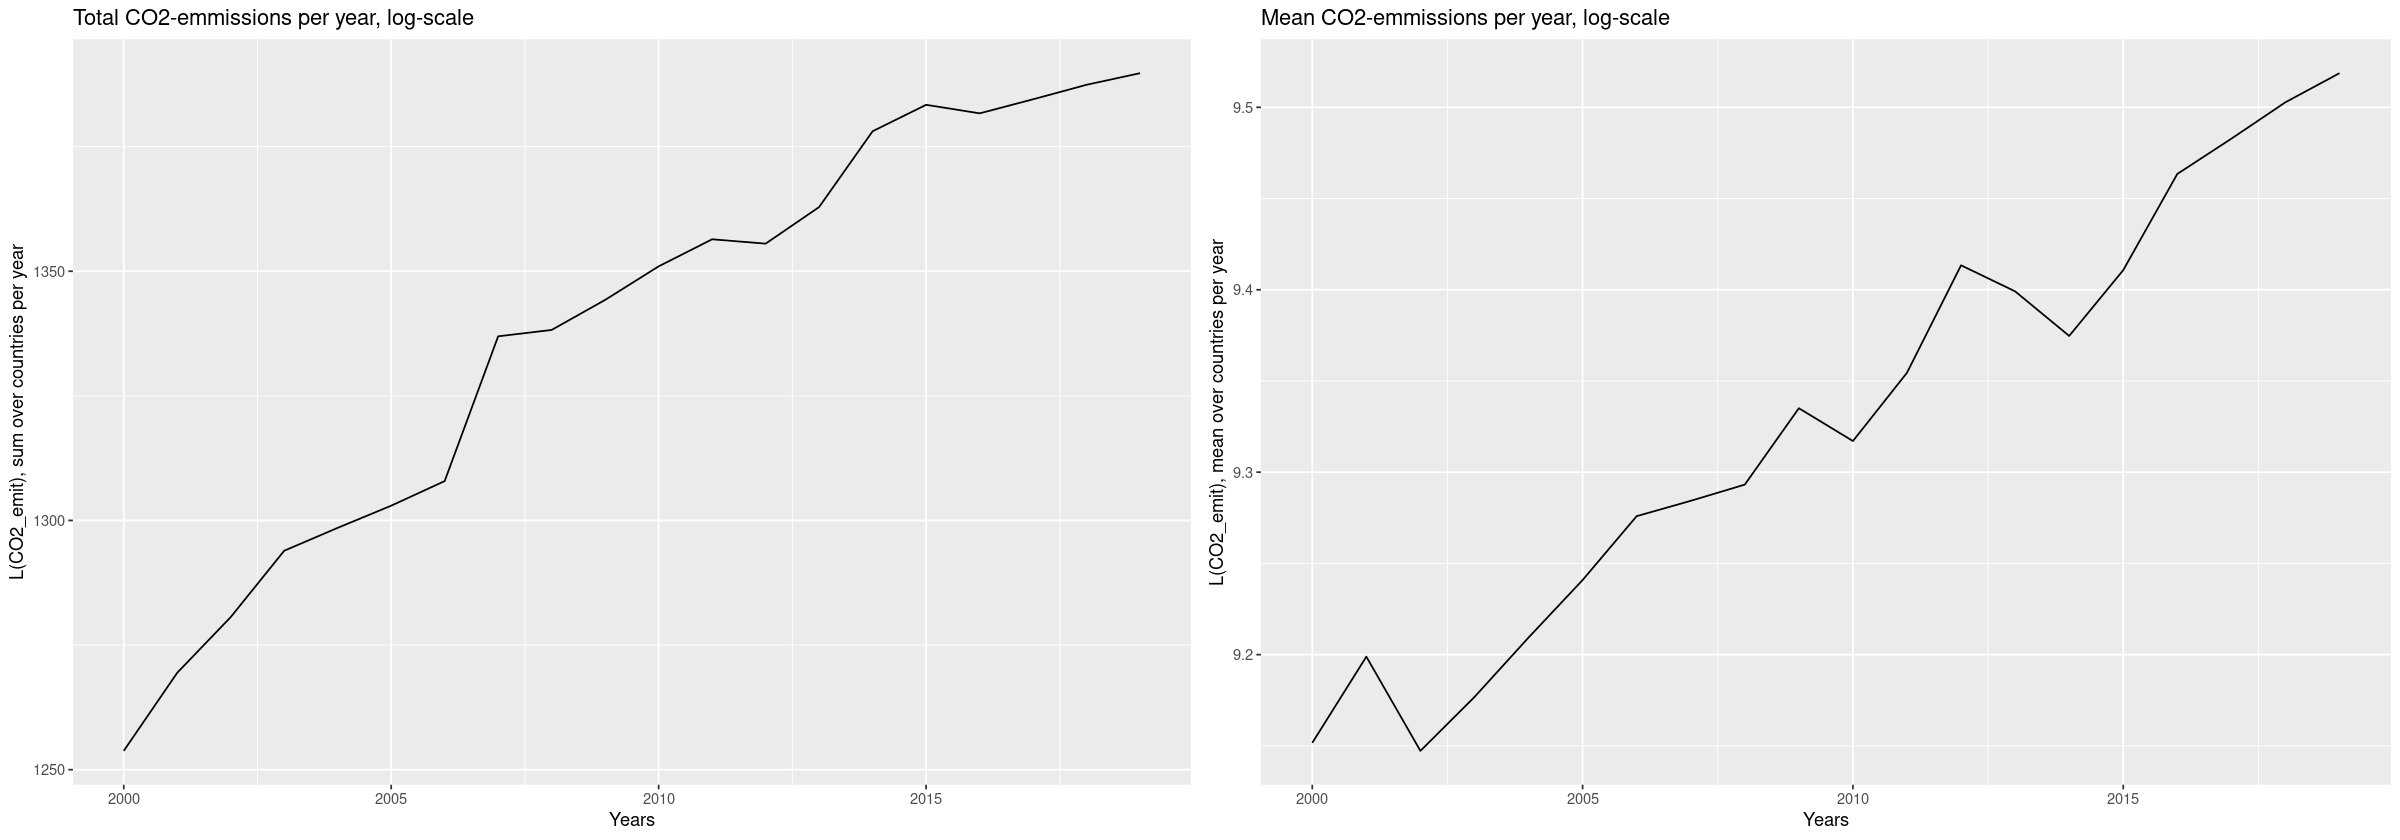

In [14]:
CO2vsYearSum <- aggregate(globDatTrans$LCO2_emit, list(globDatTrans$Year), FUN=sum)  # Total CO2-emission, log-scale
CO2vsYearMean <- aggregate(globDatTrans$LCO2_emit, list(globDatTrans$Year), FUN=mean)  # Mean CO2-emission, log-scale

p1 <- ggplot(CO2vsYearSum, aes(x=Group.1, y=x)) + geom_line() + labs(x='Years', 
                                                               y='L(CO2_emit), sum over countries per year', 
                                                               title = 'Total CO2-emmissions per year, log-scale')
p2 <- ggplot(CO2vsYearMean, aes(x=Group.1, y=x)) + geom_line() + labs(x='Years', 
                                                               y='L(CO2_emit), mean over countries per year', 
                                                               title = 'Mean CO2-emmissions per year, log-scale')
grid.arrange(p1,p2,ncol=2)

Both the total and mean log-scale of the CO2-emissions increase evidently as a function of the variable <em>Year</em>. This in itself is not enough evidence to confirm that the CO2-emissions has increased globally during the years, because, we do not now if all countries has registered their emissions each year. It is belivable that there are more registrations in the later years, as there have become more awareness regarding the climate lately. 

In [15]:
yearUnique <- sort(unique(globDatTrans$Year))   # making a list of all the years
df = data.frame()
for (i in 1:length(yearUnique)){
    y = yearUnique[i]  # year
    df <- rbind(df, c(y, nrow(globDatTrans[globDatTrans$Year ==  y,])))  #adding a row for each 
}
colnames(df)[1] <- 'Year'; colnames(df)[2] <-'Number of values'
df

Year Number of values
1  2000 137             
2  2001 138             
3  2002 140             
4  2003 141             
5  2004 141             
6  2005 141             
7  2006 141             
8  2007 144             
9  2008 144             
10 2009 144             
11 2010 145             
12 2011 145             
13 2012 144             
14 2013 145             
15 2014 147             
16 2015 147             
17 2016 146             
18 2017 146             
19 2018 146             
20 2019 146

We see that the number of total registrations for each year varies with $10$, indicating that the effect of missing entries should not have a too large effect on the increase of CO2-emissions. Still, we do not now which countries having missing entries or if those are among the most emitting countries, except from the five highest emitters, as we saw that it was the same five for each year. To check wherever the ratio of registered values have an effect on the increase in CO2-emissions, we removed all countries which have missing values for the variable <em>LCO2_emit</em>.

In [16]:
entityFreq <- globDatTrans %>% count(Entity)     # Counting frequency of each country in "Entity"

which(entityFreq$n < 20)           # Finding countries to be removed, i.e. those with frequency below 20
entityFreq[c(1,36,42,57,76,88,93,111,115,117,123,125),1]  # Countries in "Entity, which should be removed"

countriesToBeRemoved <- c('Afghanistan','Djibouti', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Montenegro',
                          'Nauru', 'Qatar', 'Sao Tome and Principe', 'Serbia', 'Somalia', 'South Sudan')

for (country in countriesToBeRemoved){
    print(which(globDatTrans$Entity == country))  # Finding the indices for all entries of the countries to be remove
}

# Removing all entries of the countries with missing values

equalSizedDat <- globDatTrans[-c(1:17, 698:703, 804:815, 1096:1113, 1474:1486, 
                                 1707:1719, 1800:1809, 2150:2168, 2229:2246, 2267:2279, 2380:2385, 2406:2408),]
df = equalSizedDat %>% count(Entity)  # Frequency of all remaining countries
paste("Maximum number of entries per country - min number of entries per country:", max(df[,2])-min(df[,2]))

[1]   1  36  42  57  76  88  93 111 115 117 123 125

[1] Afghanistan           Djibouti              Eritrea              
 [4] Guinea-Bissau         Liberia               Montenegro           
 [7] Nauru                 Qatar                 Sao Tome and Principe
[10] Serbia                Somalia               South Sudan          
176 Levels: Afghanistan Albania Algeria Angola Antigua and Barbuda ... Zimbabwe

 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
[1] 698 699 700 701 702 703
 [1] 804 805 806 807 808 809 810 811 812 813 814 815
 [1] 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110
[16] 1111 1112 1113
 [1] 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486
 [1] 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719
 [1] 1800 1801 1802 1803 1804 1805 1806 1807 1808 1809
 [1] 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164
[16] 2165 2166 2167 2168
 [1] 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243
[16] 2244 2245 2246
 [1] 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279
[1] 2380 2381 2382 2383 2384 2385
[1] 2406 2407 2408


[1] "Maximum number of entries per country - min number of entries per country: 0"

That the maximum number of entries minus the minimum is zero, verifies, that only countries with registrations each year is left.

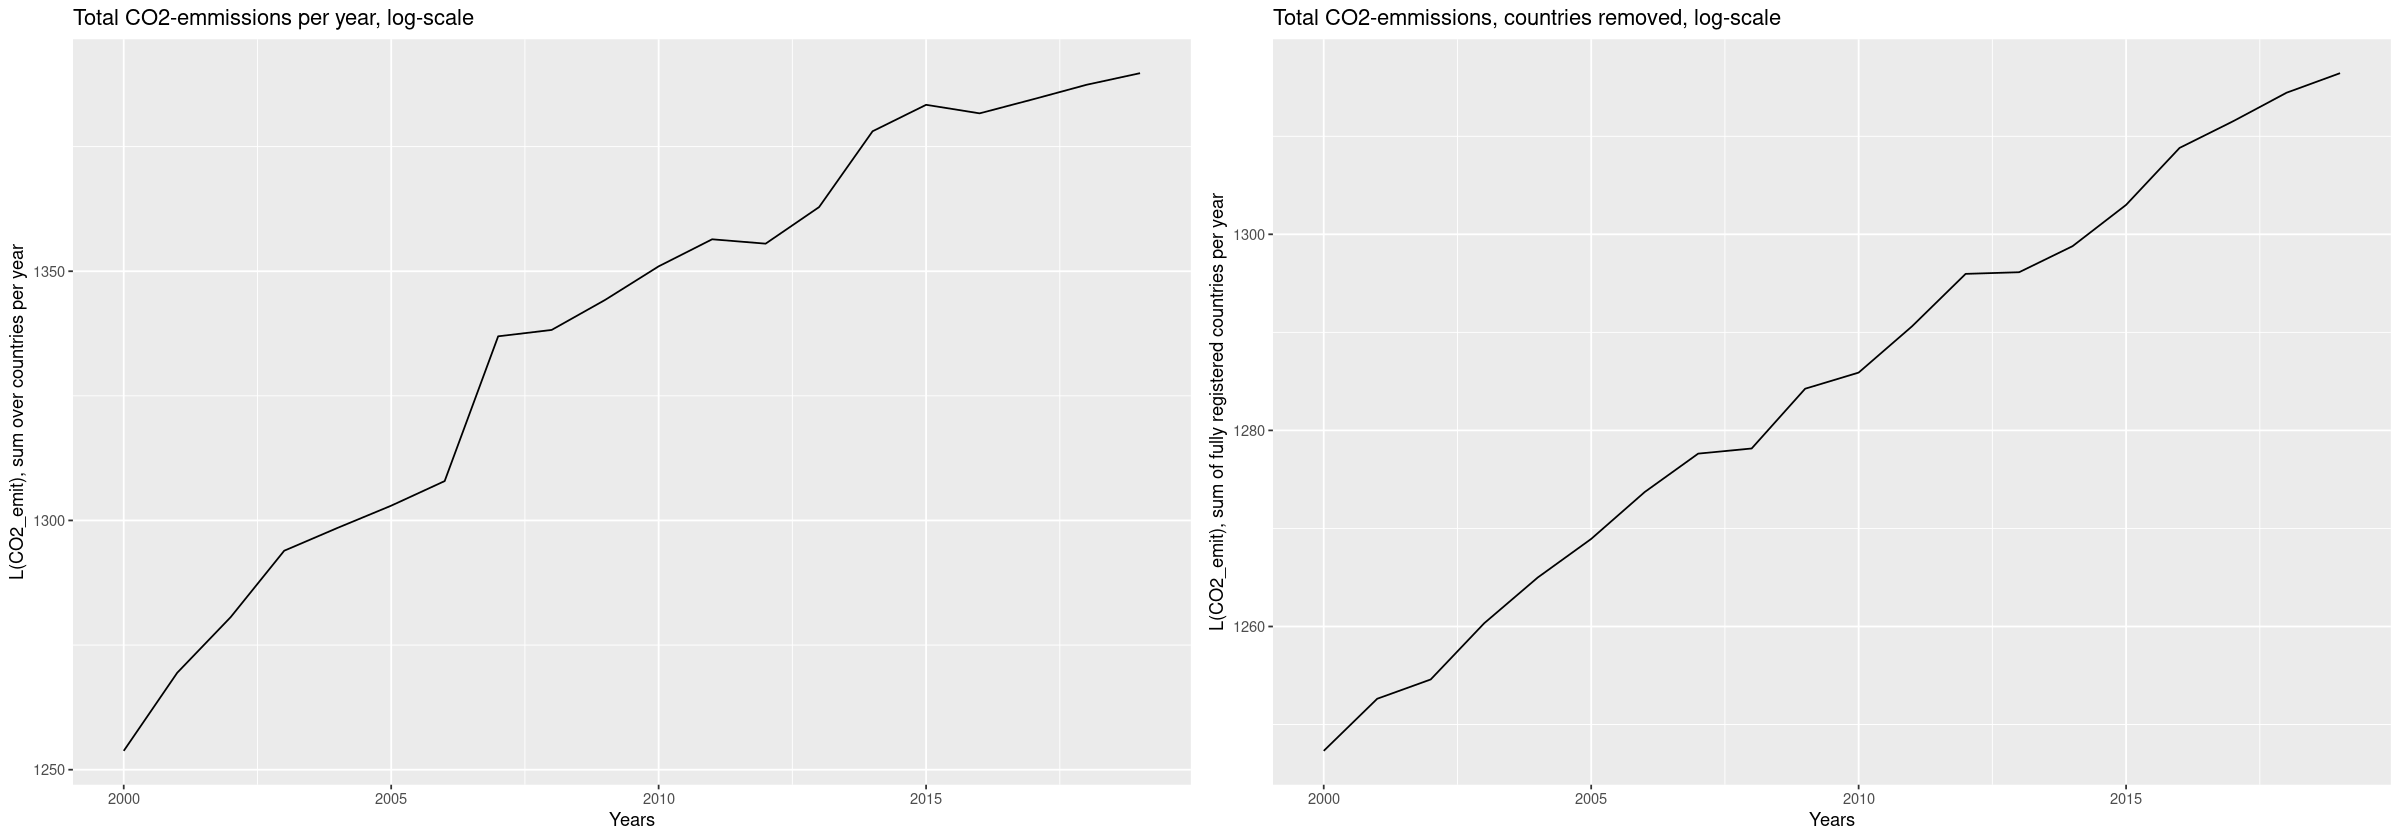

In [17]:
# Total CO2-emissions of countire with 20 entries in LCO2_emit, log-scale
CO2vsYearSumRemoved <- aggregate(equalSizedDat$LCO2_emit, list(equalSizedDat$Year), FUN=sum) 

p3 <- ggplot(CO2vsYearSumRemoved, aes(x=Group.1, y=x)) + geom_line() + labs(x='Years', 
                                                               y='L(CO2_emit), sum of fully registered countries per year', 
                                                               title = 'Total CO2-emmissions, countries removed, log-scale')
grid.arrange(p1,p3, ncol=2)

Without the missing entities, the emissions of CO2 per year seems to be an affine function.

## Multidimensional descriptive analysis

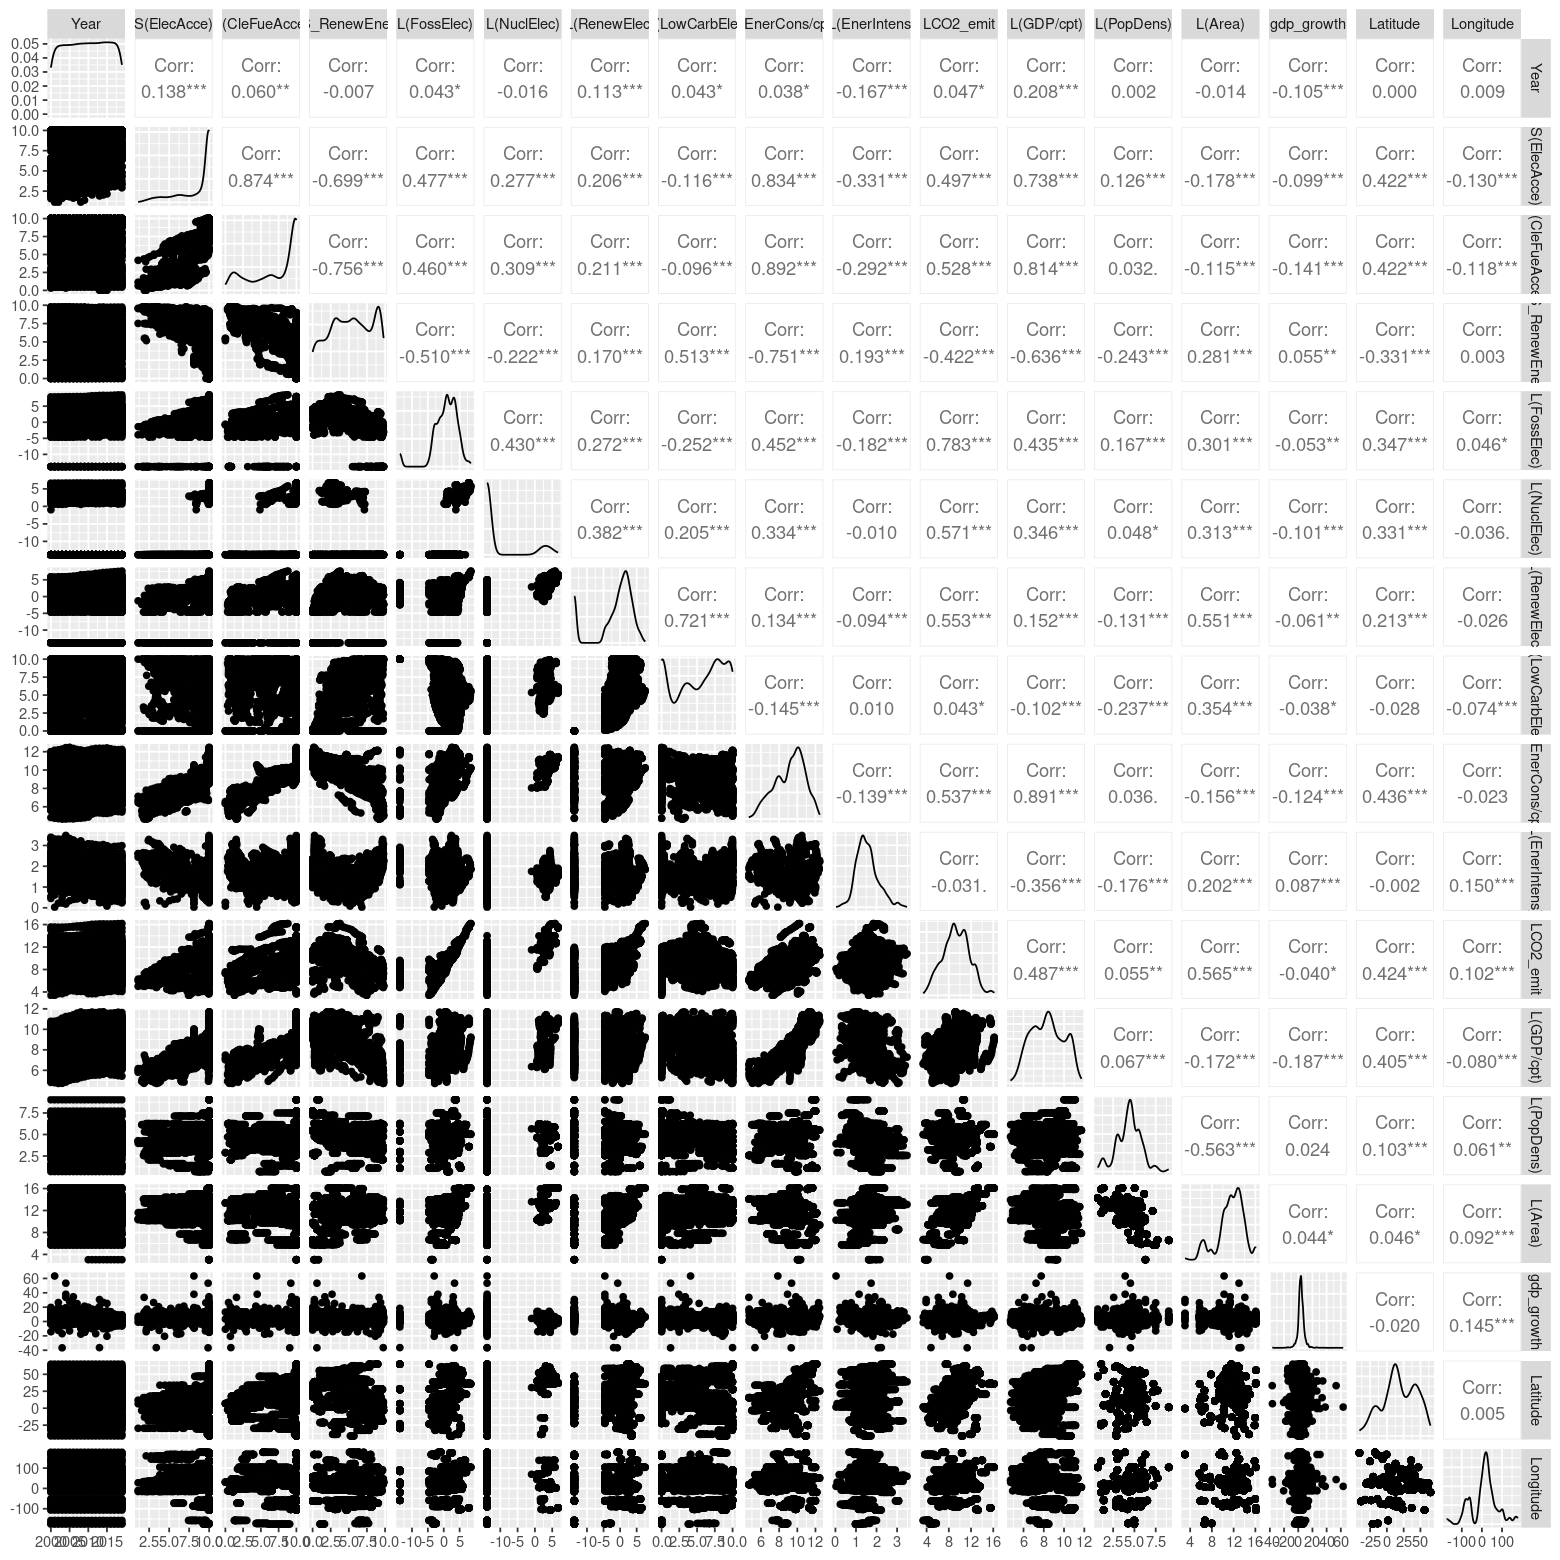

In [18]:
options(repr.plot.width=13, repr.plot.height=13)
ggpairs(globDatQuanti)

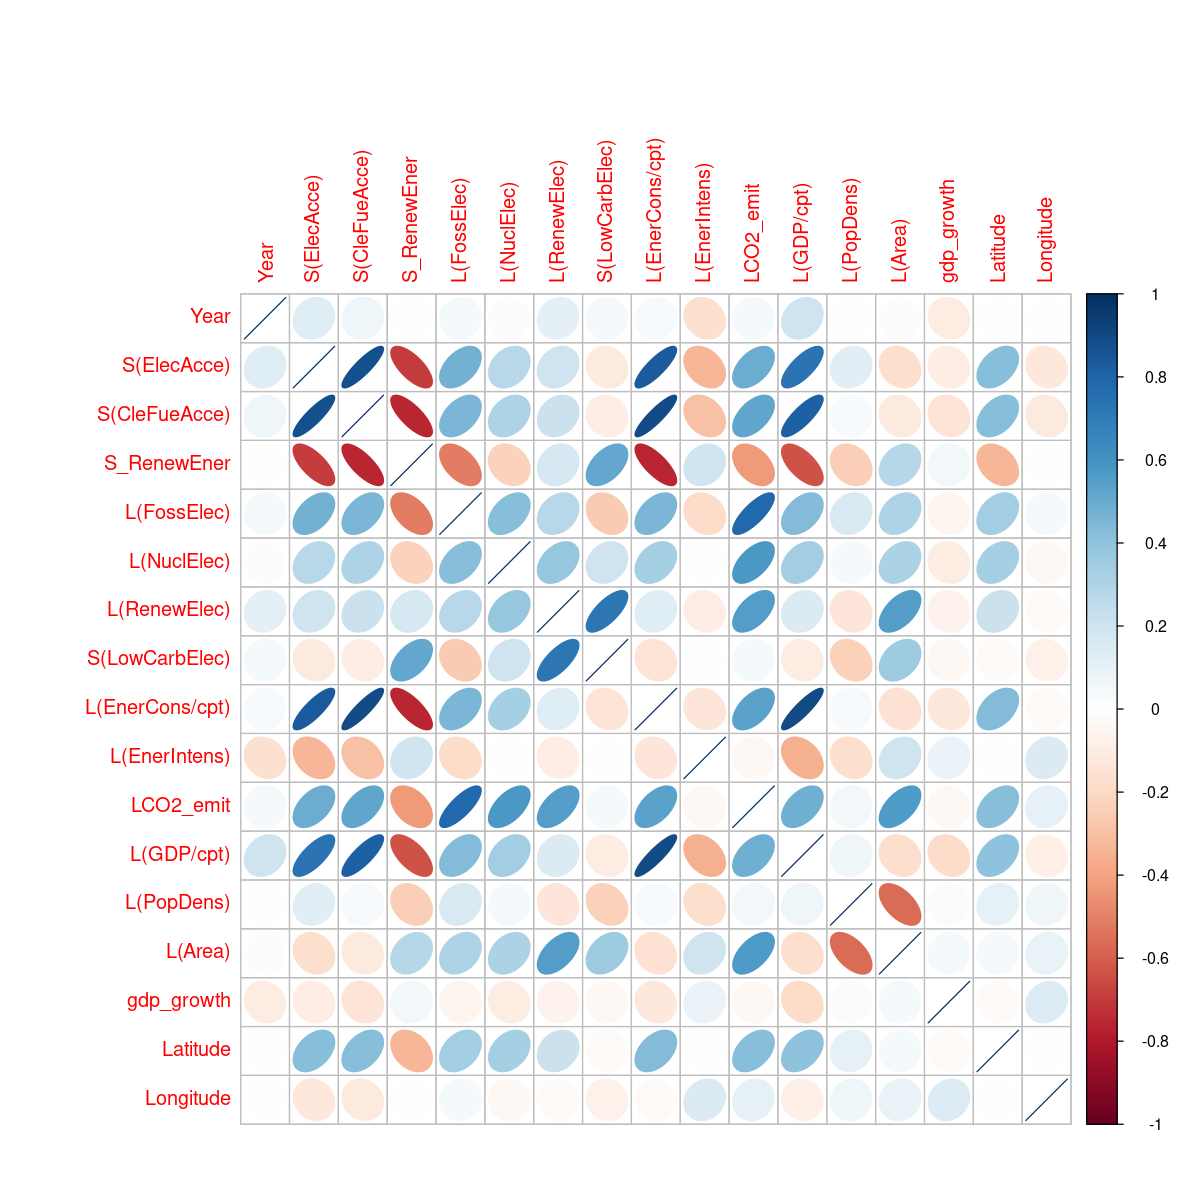

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
corrplot(cor(globDatQuanti),method="ellipse")

Some variables are very corrolated with each other, such as the transformed <em>Access.to.clean.fuels.for.cooking and Access.to.electricity....of.population..</em>. For the variable we will predict, <em>LCO2_emit</em>, we see that it is highly correlated with <em>L(FossElec>)</em>, making sense as the fossil fuels usely emit CO2, meaning that countries with high use of fossil fuels necessarily will emit more CO2. Since these variables are almost perfectly correlated, we will later remove the <em>L(FossElec>)</em> to better measure the performance of different regression methods. Other important variables for the <em> LCO2_emit</em> are <em>L(NuclElec), L(RenewElec)</em> and <em>L(Area) </em>, though they have correlation coefficent as low as $0.6$. What is also interesting is the that the <em>S_RenewEner</em> is negatively correlated with  <em> LCO2_emit</em> with correlation coefficent of around $-0.4$. Even though these variables are not the most correlated, we will of interest to the environmental challanges of today also investigate how well the level of renewable energy explains the CO2-emissions.

First we will see if the dataset can be effectively reduced dimensionally, using a PCA.

## Principal Component Analysis

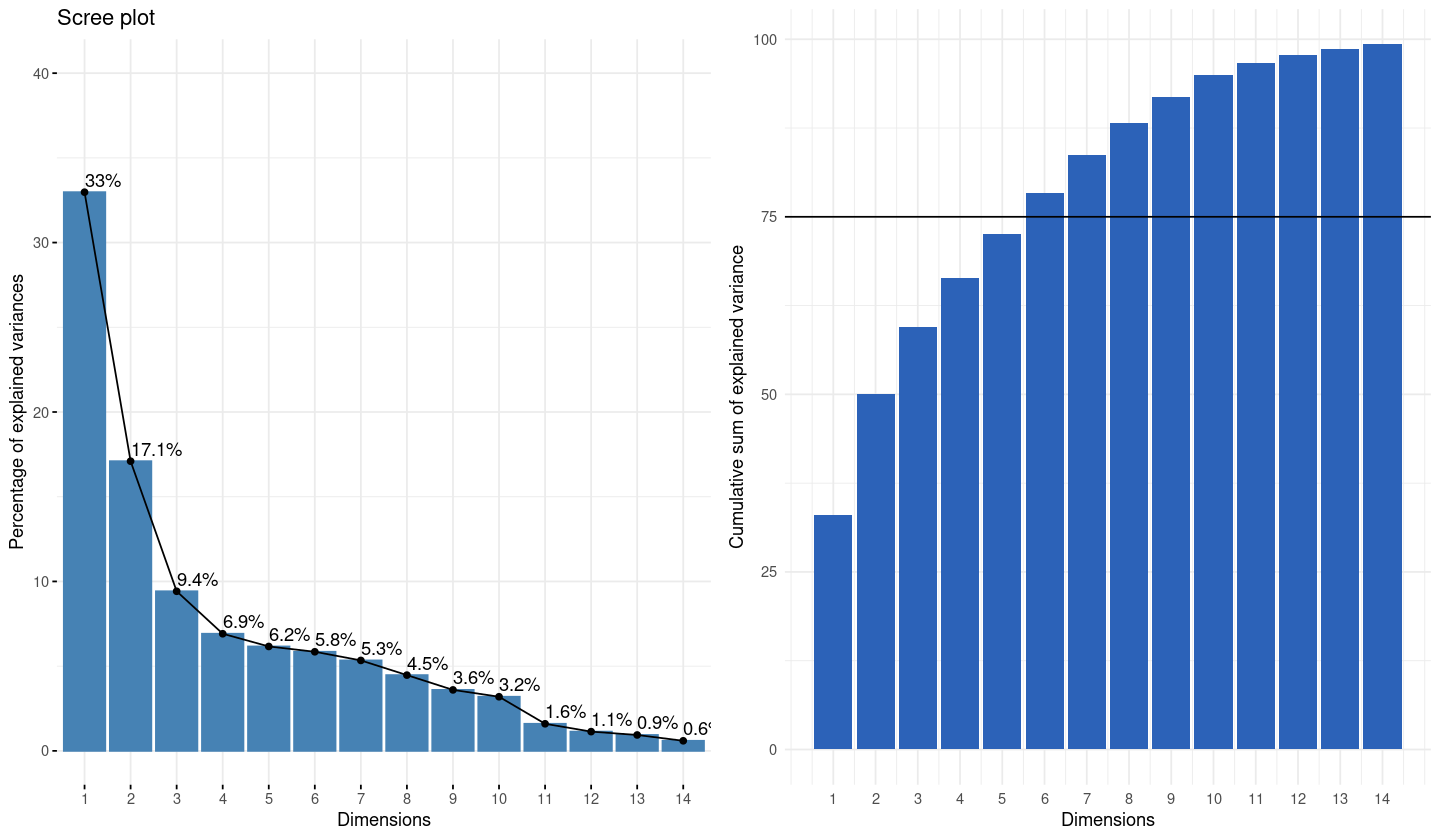

In [20]:
pca <- PCA(globDatQuanti, scale.unit = TRUE, graph = FALSE, ncp = 14)   # PCA

pca_frame <- data.frame(x=1:length(pca$eig[1:14,3]), y=pca$eig[1:14,3]) # Selecting only the 14 first components

options(repr.plot.width=12, repr.plot.height=7)
g1<-fviz_eig(pca, addlabels = TRUE, ylim = c(0, 40), ncp=14) # Plotting the explained variance for each component

# Plotting the cumulative explained variance for number of components
g2<-ggplot(pca_frame, aes(fill="white")) + geom_col(aes(x,y), fill = "#2c62b8") + 
        theme_minimal() + labs(x="Dimensions", y="Cumulative sum of explained variance", ) +
        geom_hline(aes(yintercept=75)) + 
        scale_x_continuous(breaks = seq(1,14))

grid.arrange(g1,g2,ncol=2)


If six dimensions are chosen, $75\%$ of the variance will be explained within our reduced dataset.

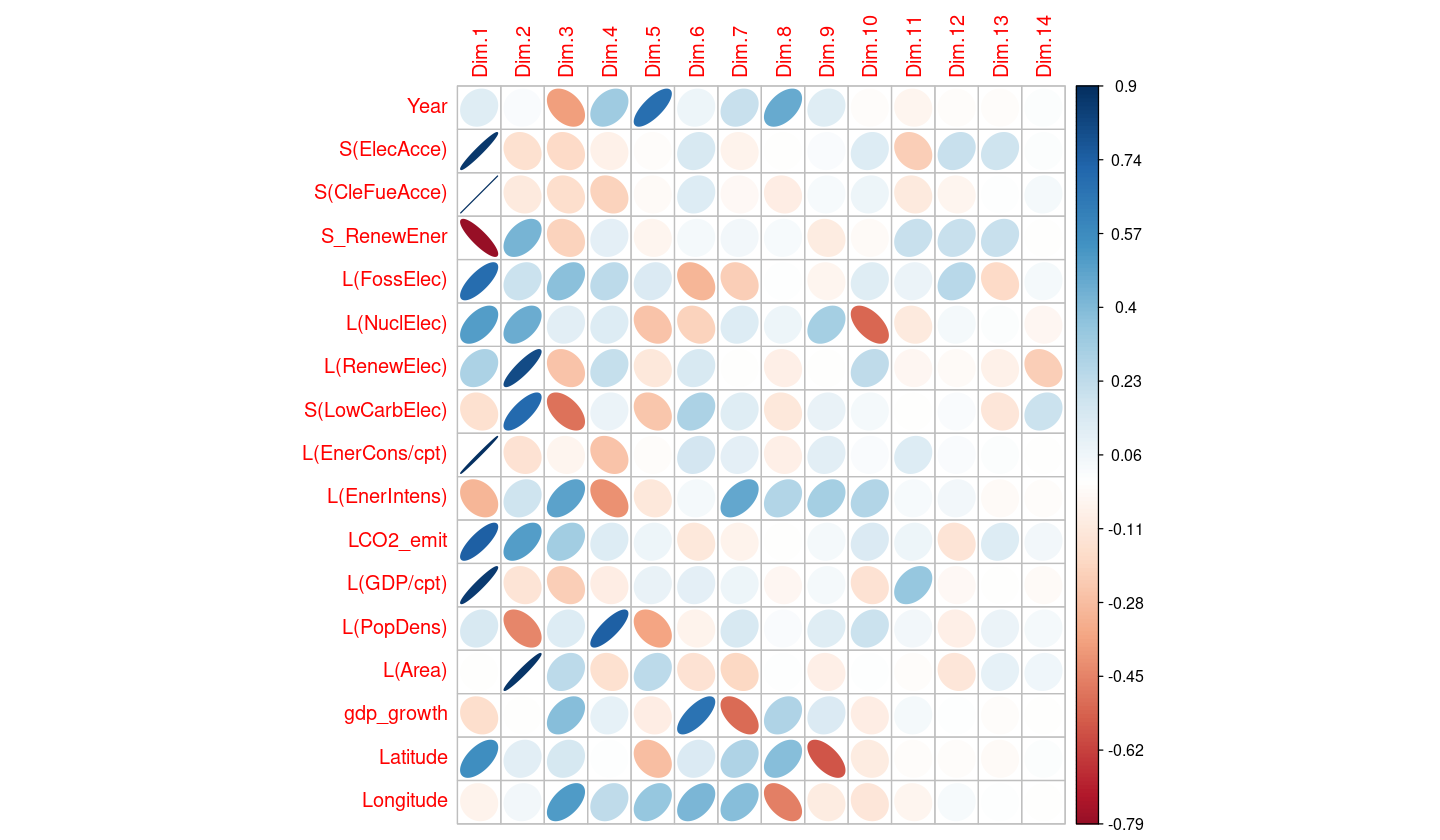

In [21]:
corrplot(pca$var$cor, is.corr=FALSE,method="ellipse")

We can see with this correlation graph that some variables are really well explained by some dimension. The first dimension is therefore really positively correlated with <em>Access to Elec, Access to Clean Fuel, Energy Cons/cpt </em> and <em>GDP/cpt</em> and negatively corrolated with <em>RenewEner</em>. The second dimension is really positively corrolated with <em>L(Area)</em> and <em>RenewElec</em>.

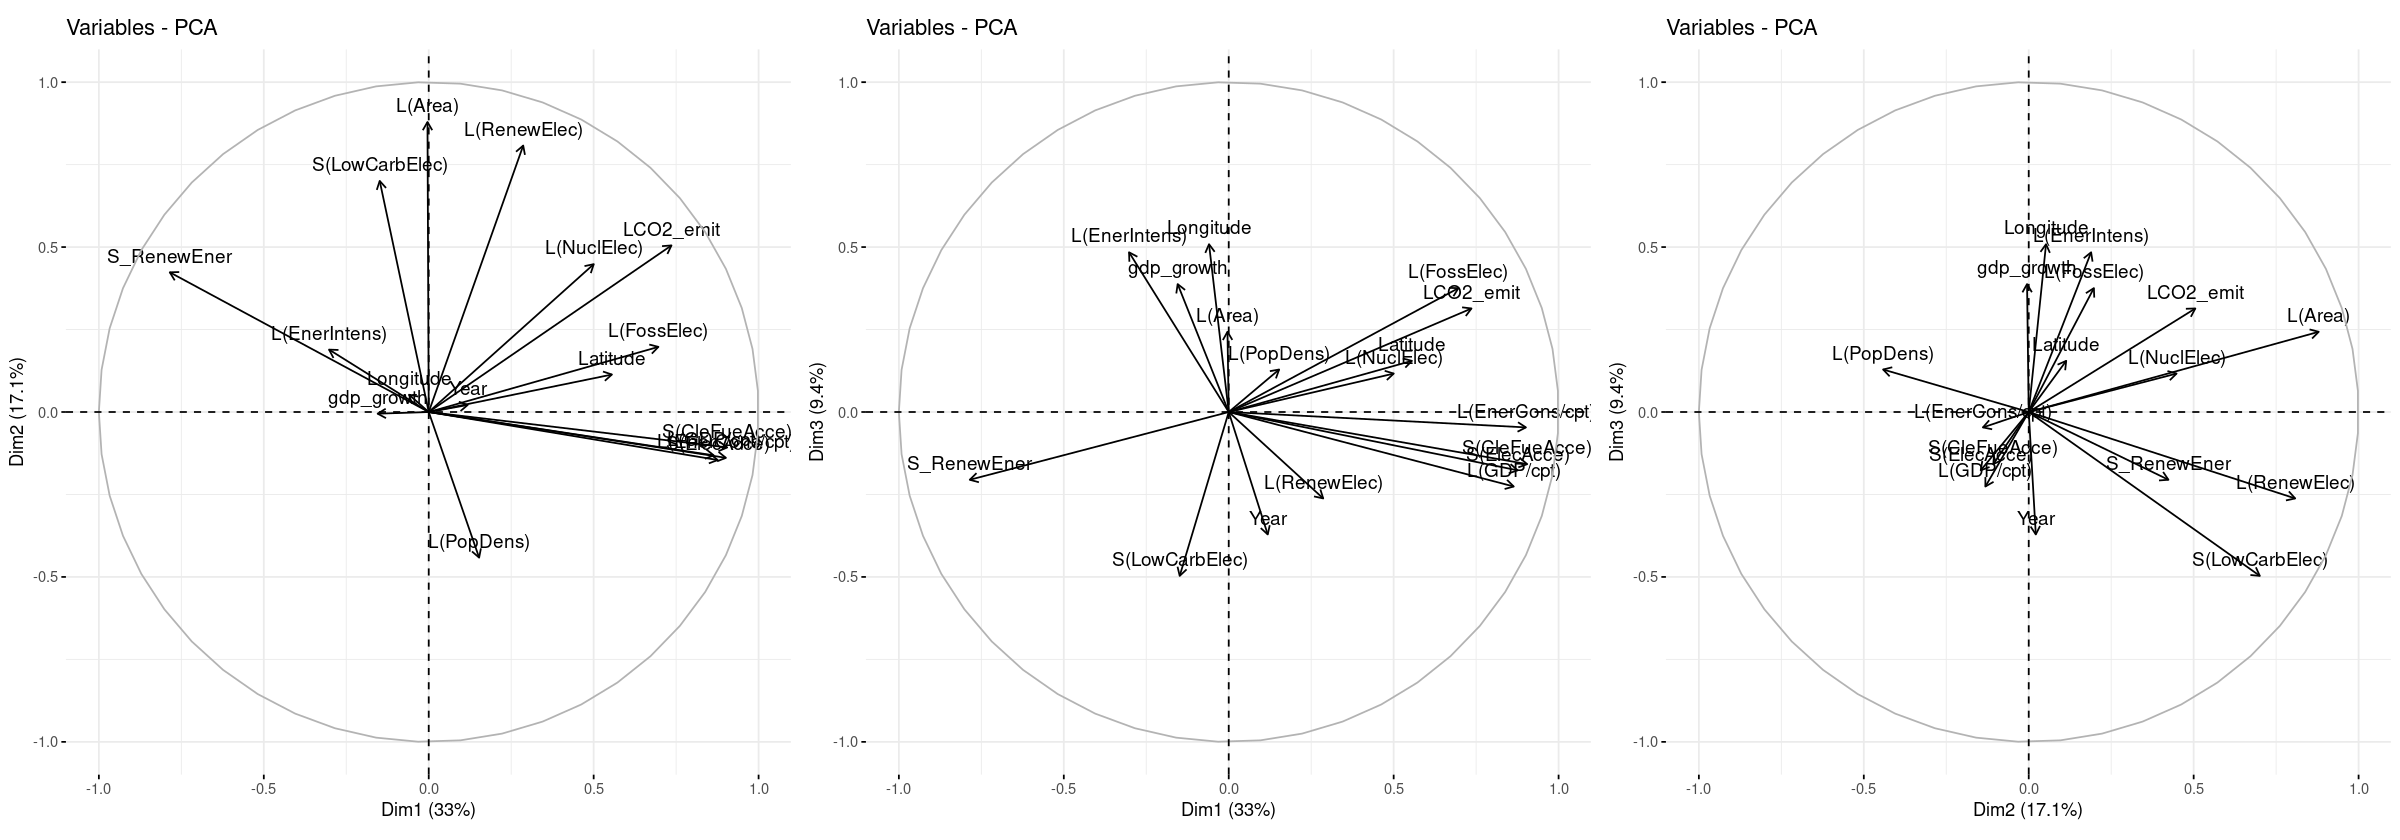

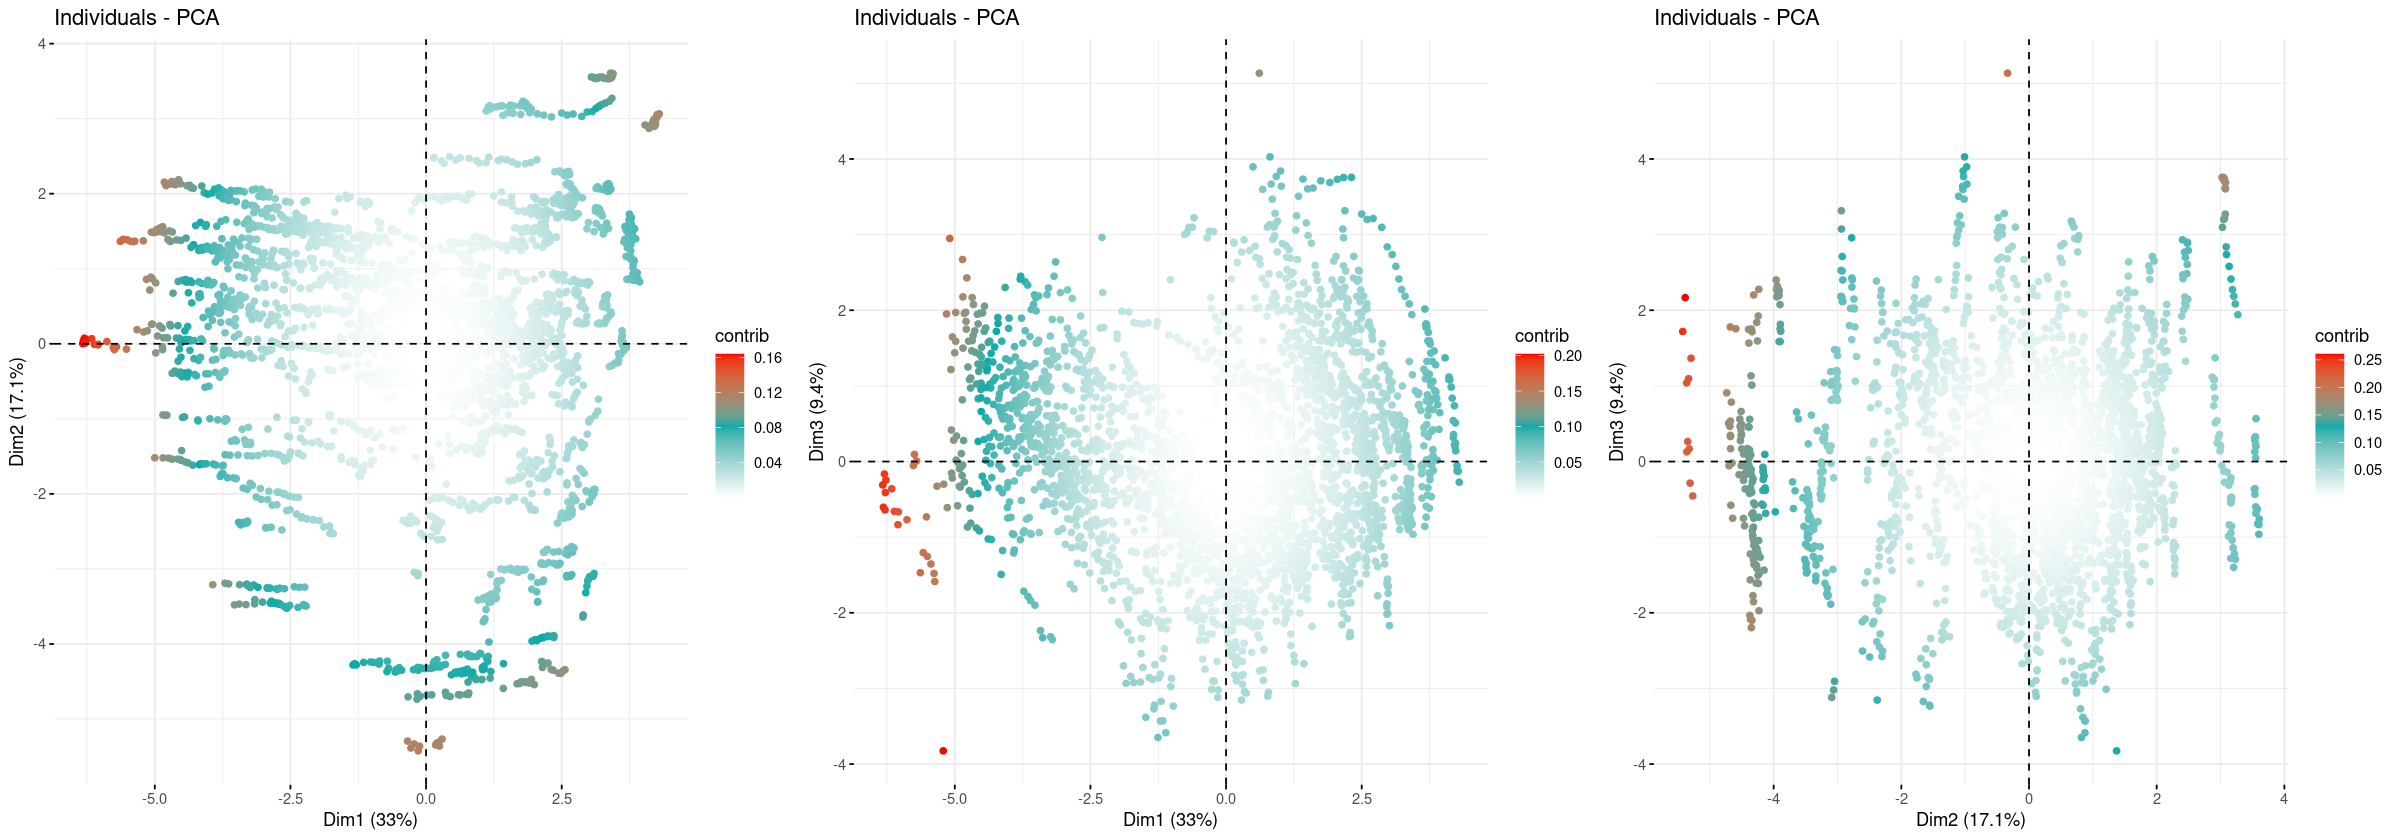

In [22]:
options(repr.plot.width=20, repr.plot.height=7)
# Circle of correlation
p1 <- fviz_pca_var(pca)
p2 <-fviz_pca_var(pca,axes=c(1,3))
p3 <-fviz_pca_var(pca,axes=c(2,3))
grid.arrange(p1,p2,p3, ncol=3)

# Individuals plots
p4 <- fviz_pca_ind(pca,col.ind="contrib",label="none",gradient.cols = c("white", "#03aba8", "#f70202"))
p5 <- fviz_pca_ind(pca,col.ind="contrib",label="none",gradient.cols = c("white", "#03aba8", "#f70202" ),axes=c(1,3))
p6 <- fviz_pca_ind(pca,col.ind="contrib",label="none",gradient.cols = c("white", "#03aba8", "#f70202" ),axes=c(2,3))

grid.arrange(p4,p5,p6, ncol=3)

With the circle of correlation and the individuals plot, we can see that the variable we want to predict is well represented by the two first (even three) dimensions. Nevertheless, even if some variable are really correlated with the pca components, we can see here that they are far from going in the same direction. We can deduce that we will not have a big reduction of dimension, as we saw before. We chose thus not to reduce the data for the rest of our project. 

# Modelisation
## Preparing the data

As mentioned in the paragraph of variable correlation, we will delete the variable <em>L(FossElec)</em> to better measure the performance of the different regression methods. We will also remove the <em>Entity</em>-variable, as this is qualitative with more than $150$ different modes (countries). This variable will also complicate the use of optimal trees as each country is being treated as a variable. 

In [23]:
# Removing 'L(FossElec)' as sugggested by email and 'Entity' as discussed in class
globDatTransLin <- globDatTrans[, -c(1,6)]

To be able to both optimize the models and assess them, we divide the dataset into a learning sample for training the model and a test sample for model assessment. We use the ratio $4:1$.

In [24]:
set.seed(125)
inTrain = createDataPartition(globDatTransLin[,2],p = 0.8, list = FALSE)

# Extraction of the samples
trainDat = globDatTransLin[inTrain,]
testDat = globDatTransLin[-inTrain,]

colnames(trainDat) <- make.names(colnames(trainDat)) # Formatting the training and test datasets for use of Rpart
colnames(testDat) <- make.names(colnames(testDat))

str(trainDat)
str(testDat)

'data.frame':	2296 obs. of  16 variables:
 $ Year           : int  2003 2006 2007 2009 2010 2011 2012 2013 2014 2015 ...
 $ S.ElecAcce.    : num  3.84 5.54 6 6.84 6.53 ...
 $ S.CleFueAcce.  : num  3.08 3.72 3.91 4.29 4.47 ...
 $ S_RenewEner    : num  6.05 5.65 5.36 4.07 3.89 ...
 $ L.NuclElec.    : num  -13.8 -13.8 -13.8 -13.8 -13.8 ...
 $ L.RenewElec.   : num  -0.462 -0.446 -0.288 -0.248 -0.288 ...
 $ S.LowCarbElec. : num  8.19 8.73 8.89 9.11 8.93 ...
 $ L.EnerCons.cpt.: num  5.44 5.72 5.87 6.88 7.08 ...
 $ L.EnerIntens.  : num  0.336 0.405 0.425 0.811 0.9 ...
 $ LCO2_emit      : num  7.11 7.47 7.48 8.49 8.87 ...
 $ L.GDP.cpt.     : num  5.25 5.57 5.89 6.08 6.3 ...
 $ L.PopDens.     : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L.Area.        : num  13.4 13.4 13.4 13.4 13.4 ...
 $ gdp_growth     : num  8.83 5.36 13.83 21.39 14.36 ...
 $ Latitude       : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude      : num  67.7 67.7 67.7 67.7 67.7 ...
'data.frame':	572 obs. of  16 variables:
 $ Year    

For the model assesment we define a function calculating the mean square error (MSE) and one for the adjusted determination coefficient ($R'^2)$.

In [25]:
MSE <- function(prediction, dataset = testDat){
    '
        Input parameters: 
            prediction: predicted object
            dataset: test set
        Output: 
            SSR/n: MSE
    '
        n = nrow(dataset)        # sample size
        SSR = sum((prediction - dataset$LCO2_emit)^2)
    return(SSR/n)
}


R_squared <- function(prediction, dataset = testDat, k = 1){ 
    '
    Input parameters: 
        prediction: predicted object
        dataset: test set
        k: polynomial degree of model (k=1 for linear regression)
    Output: 
        R: adjusted R**2
    '
    n = length(dataset)      # sample size
    SSR = n*MSE(prediction, dataset)
    SST = sum((dataset$LCO2_emit - mean(dataset$LCO2_emit))^2)
                                
    R = round(1-(SSR/SST)*((n-1)/(n-k-1)), 4)
    return(R)
}

In [26]:
# Borrowed from Apprent-R-Ozone-English
# Function for plotting the residuals
gplot.res <- function(x, y, titre = "titre"){ 
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    #xlim(0, 250)+ylim(-150, 150)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Linear regression

First we will use simple linear regression for the dataset. We start with a naïve approach, then we will do linear regression with/without variable selection and with/without penalization.

### Naïve linear regression

Linear regression: 0.018 sec elapsed


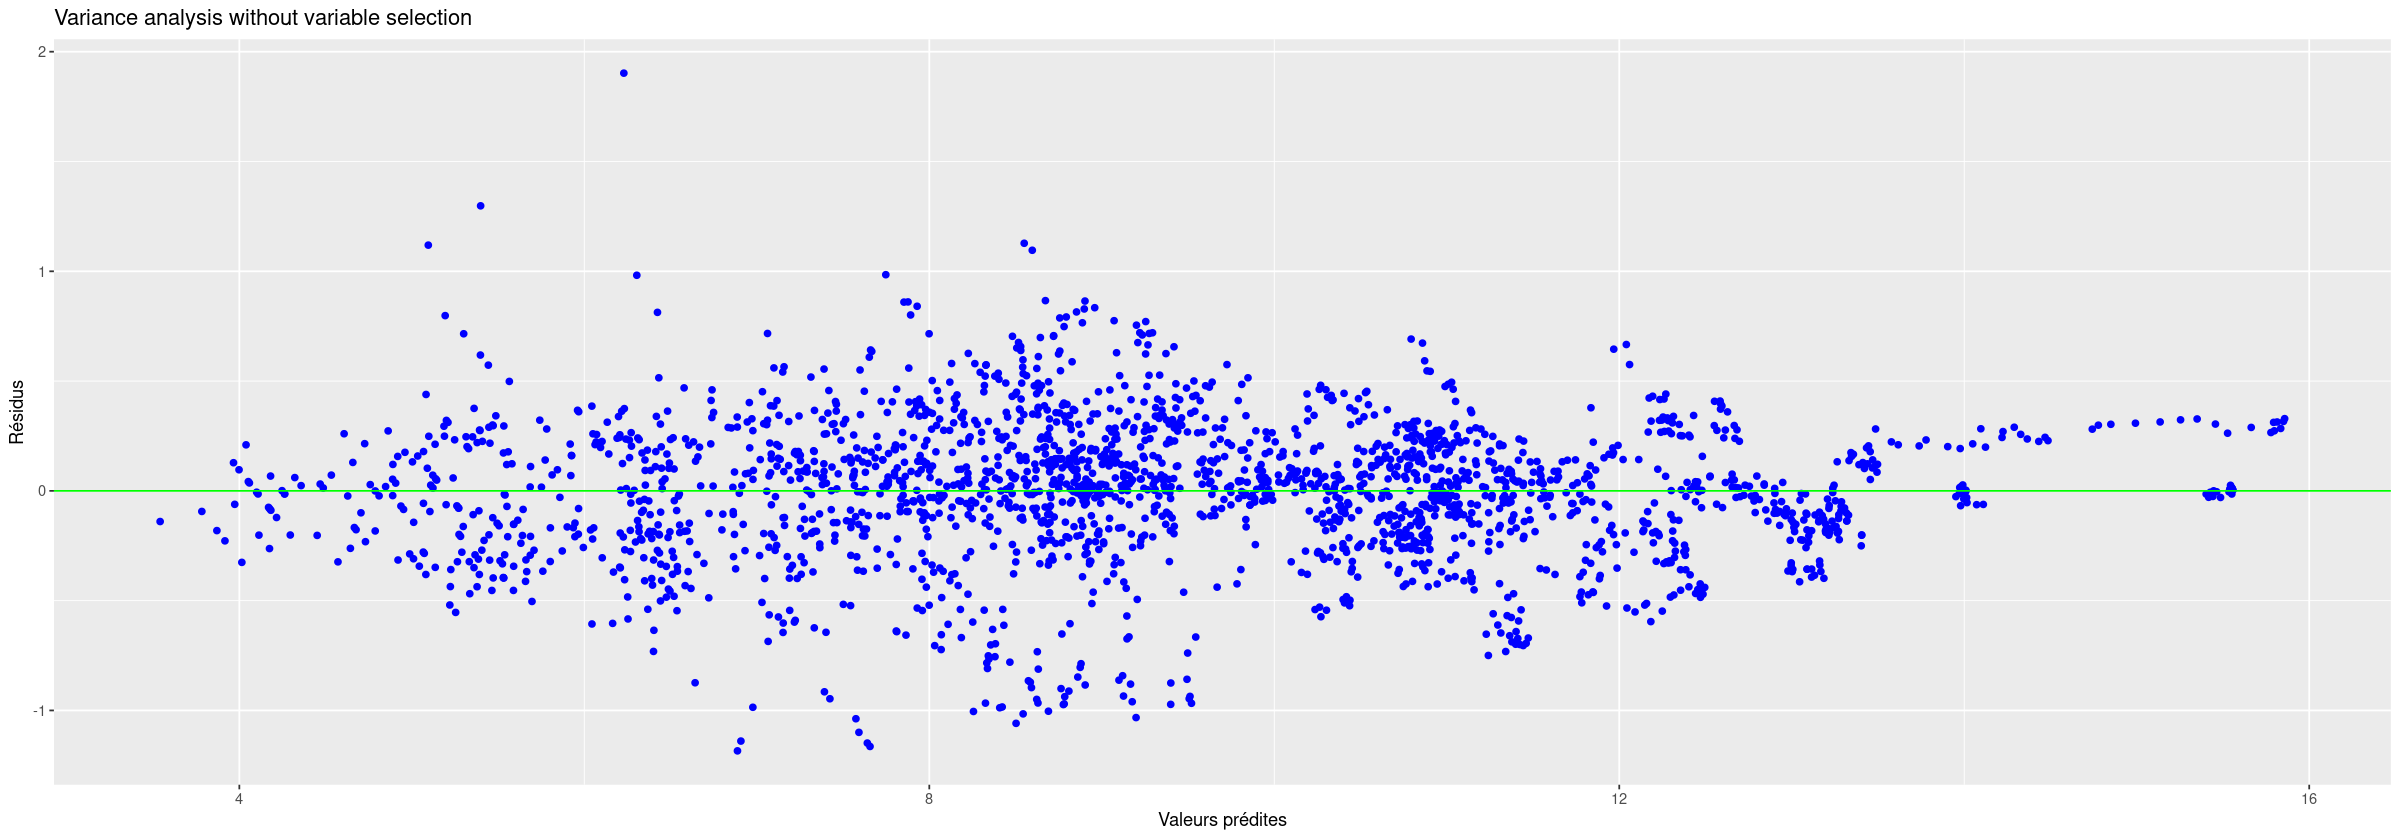

In [27]:
# Naïve liner regression
tic("Linear regression")
reg.lm <-aov(LCO2_emit ~ . , data = trainDat)   # Regression
res.lm <- reg.lm$residuals                      # Residuals
fit.lm <- reg.lm$fitted.values                  # Fitted values
t_Lin <- toc()
gplot.res(fit.lm,res.lm,'Variance analysis without variable selection')

The graph of residuals shows that the prediction is quite good, since the values are close to the green zero-line. There is some outliers. We now see how the different variables contribute.

In [28]:
summary(reg.lm)

coeffs <- coef(reg.lm)
coeffs

                  Df Sum Sq Mean Sq   F value  Pr(>F)    
Year               1   27.5    27.5   275.525 < 2e-16 ***
S.ElecAcce.        1 3116.6  3116.6 31230.515 < 2e-16 ***
S.CleFueAcce.      1  476.9   476.9  4778.495 < 2e-16 ***
S_RenewEner        1   11.3    11.3   112.853 < 2e-16 ***
L.NuclElec.        1 2499.2  2499.2 25043.708 < 2e-16 ***
L.RenewElec.       1 2127.0  2127.0 21313.753 < 2e-16 ***
S.LowCarbElec.     1 1080.7  1080.7 10829.795 < 2e-16 ***
L.EnerCons.cpt.    1  183.9   183.9  1842.857 < 2e-16 ***
L.EnerIntens.      1   97.1    97.1   972.867 < 2e-16 ***
L.GDP.cpt.         1   12.2    12.2   122.166 < 2e-16 ***
L.PopDens.         1    0.2     0.2     1.987 0.15879    
L.Area.            1 3120.5  3120.5 31269.556 < 2e-16 ***
gdp_growth         1    0.6     0.6     6.186 0.01295 *  
Latitude           1    0.9     0.9     9.211 0.00243 ** 
Longitude          1    0.6     0.6     6.011 0.01429 *  
Residuals       2280  227.5     0.1                      
---
Signif. co

(Intercept)            Year     S.ElecAcce.   S.CleFueAcce.     S_RenewEner 
  -8.2629095387   -0.0020431202    0.1330463678   -0.0069545441   -0.0811443143 
    L.NuclElec.    L.RenewElec.  S.LowCarbElec. L.EnerCons.cpt.   L.EnerIntens. 
   0.0039226110    0.0417772755   -0.0842615535    0.4463477174    0.1821522689 
     L.GDP.cpt.      L.PopDens.         L.Area.      gdp_growth        Latitude 
   0.2647992856    0.8836719121    0.9693646940   -0.0043527089    0.0009280115 
      Longitude 
   0.0002673058

We can see here that most variables, such as <em>S(ElecAcce), L(NuclElec), S_RenewEner</em> and <em>L(Area)</em> have really low p-value meaning they are significant for the variable we want to predict, <em>LCO2_emit</em>. Most of these also have among the highest correlation coefficients with <em>LCO2_emit</em>. 

### Linear regression with variable selection
We also try using linear regression with variable selection. As described above we will use the variable <em>S_RenewEner</em> as it is interesting to see how the ratio of renewable energy affects the level of CO2-emissions. This variable also had the most negative correlation coeffcient.

Liner regression variable selection: 0.005 sec elapsed


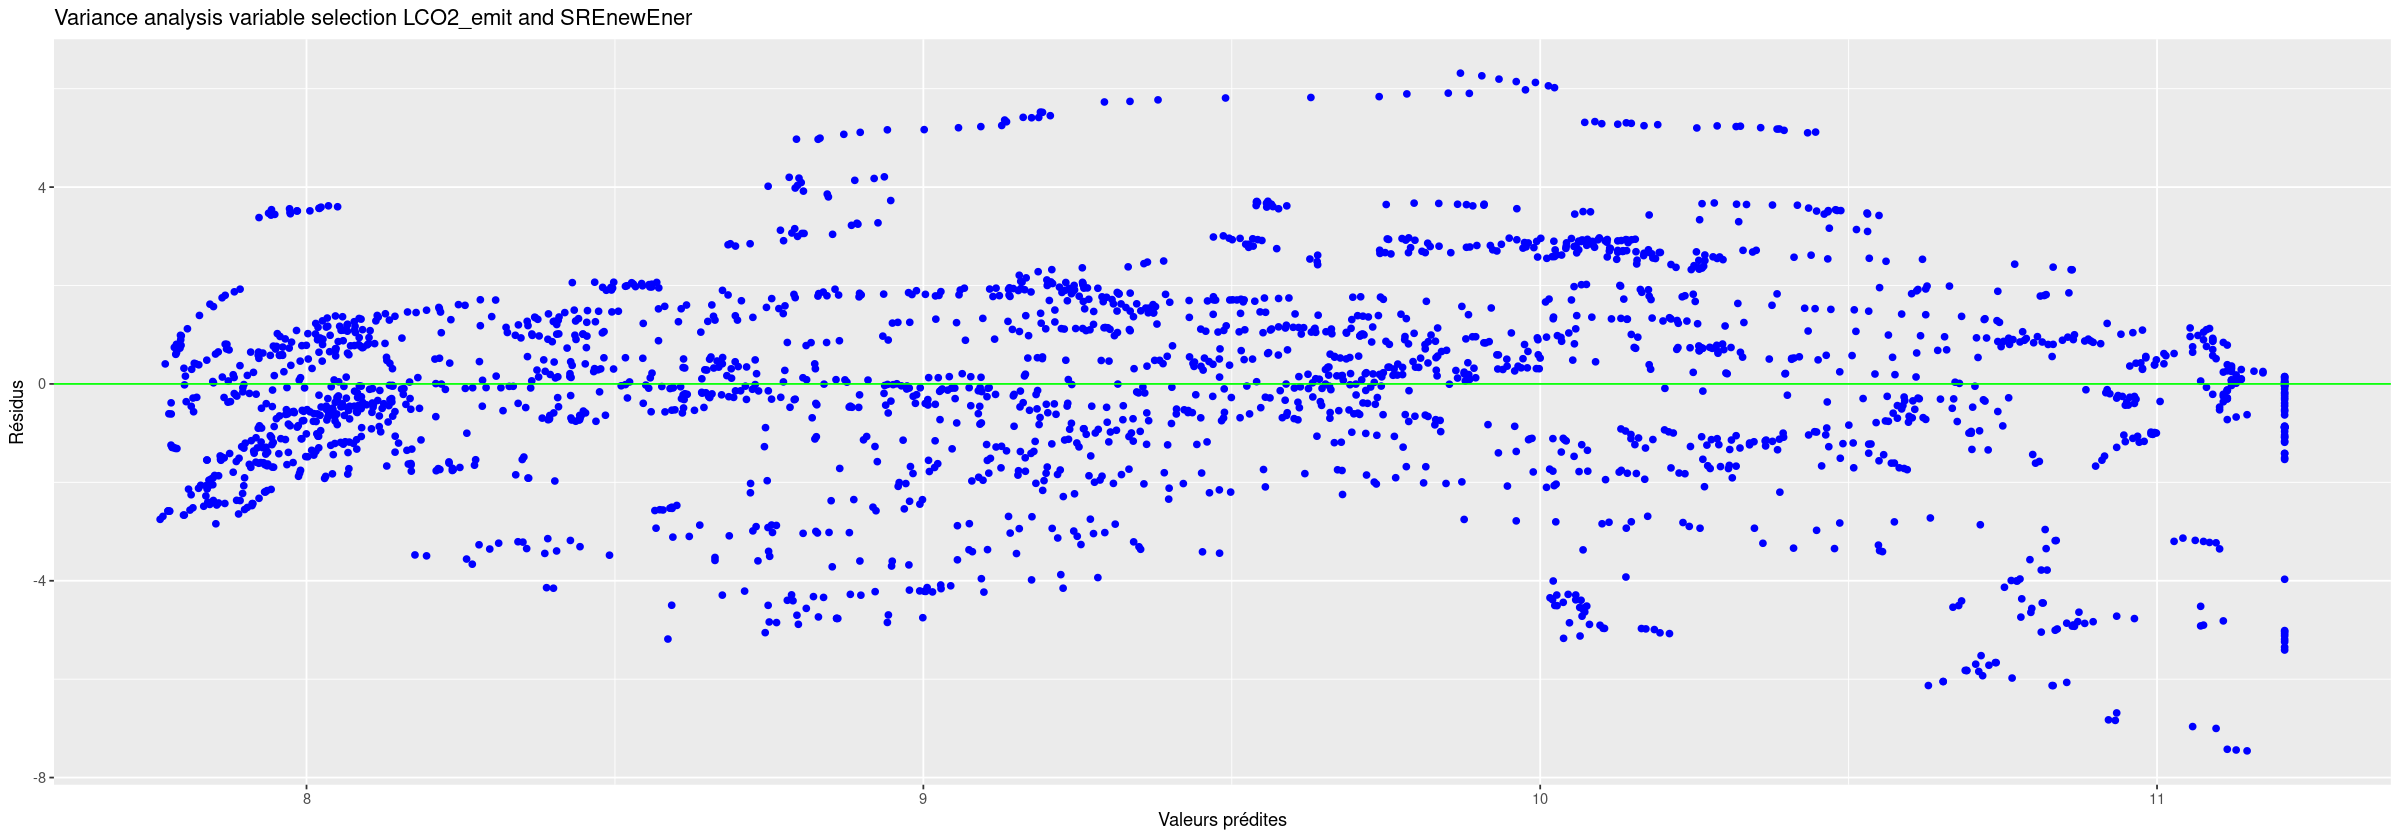

In [29]:
tic("Liner regression variable selection")
reg.lmvs <-aov(LCO2_emit ~ S_RenewEner, data = trainDat)   # Choosing S_RenewEner
res.lmvs <- reg.lmvs$residuals                             # Residuals
fit.lmvs <- reg.lmvs$fitted.values                         # Fitted values
t_LinVS <- toc()
gplot.res(fit.lmvs, res.lmvs,'Variance analysis variable selection LCO2_emit and SREnewEner')

From the residuals plot, we see that is it dense compared to the naïve linear regression. This might be in line with the correlation coefficient being of order $-0.4$, which is quite far from full negative correlation, which should have a $R$-score of $-1$. The naïve linear regression seems to be a better prediction, which is normal since it is done to minimize the error.

In [30]:
print("For variable selection: ")
summary(reg.lmvs)

coeffsvs <- coef(reg.lmvs)
coeffsvs

[1] "For variable selection: "


              Df Sum Sq Mean Sq F value Pr(>F)    
S_RenewEner    1   2287  2286.6   490.4 <2e-16 ***
Residuals   2294  10696     4.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Intercept) S_RenewEner 
 11.2068646  -0.3514986

<em>S_Renew_Ener</em> is still significant, but with amuch higher intercept and more negative regression coefficent than for the naïve implementation. We will now penalize the model, firstly witout variable selection (Ridge).

### Linear regression with penalization, without variable selection - Ridge penalty

Ridge: 0.036 sec elapsed


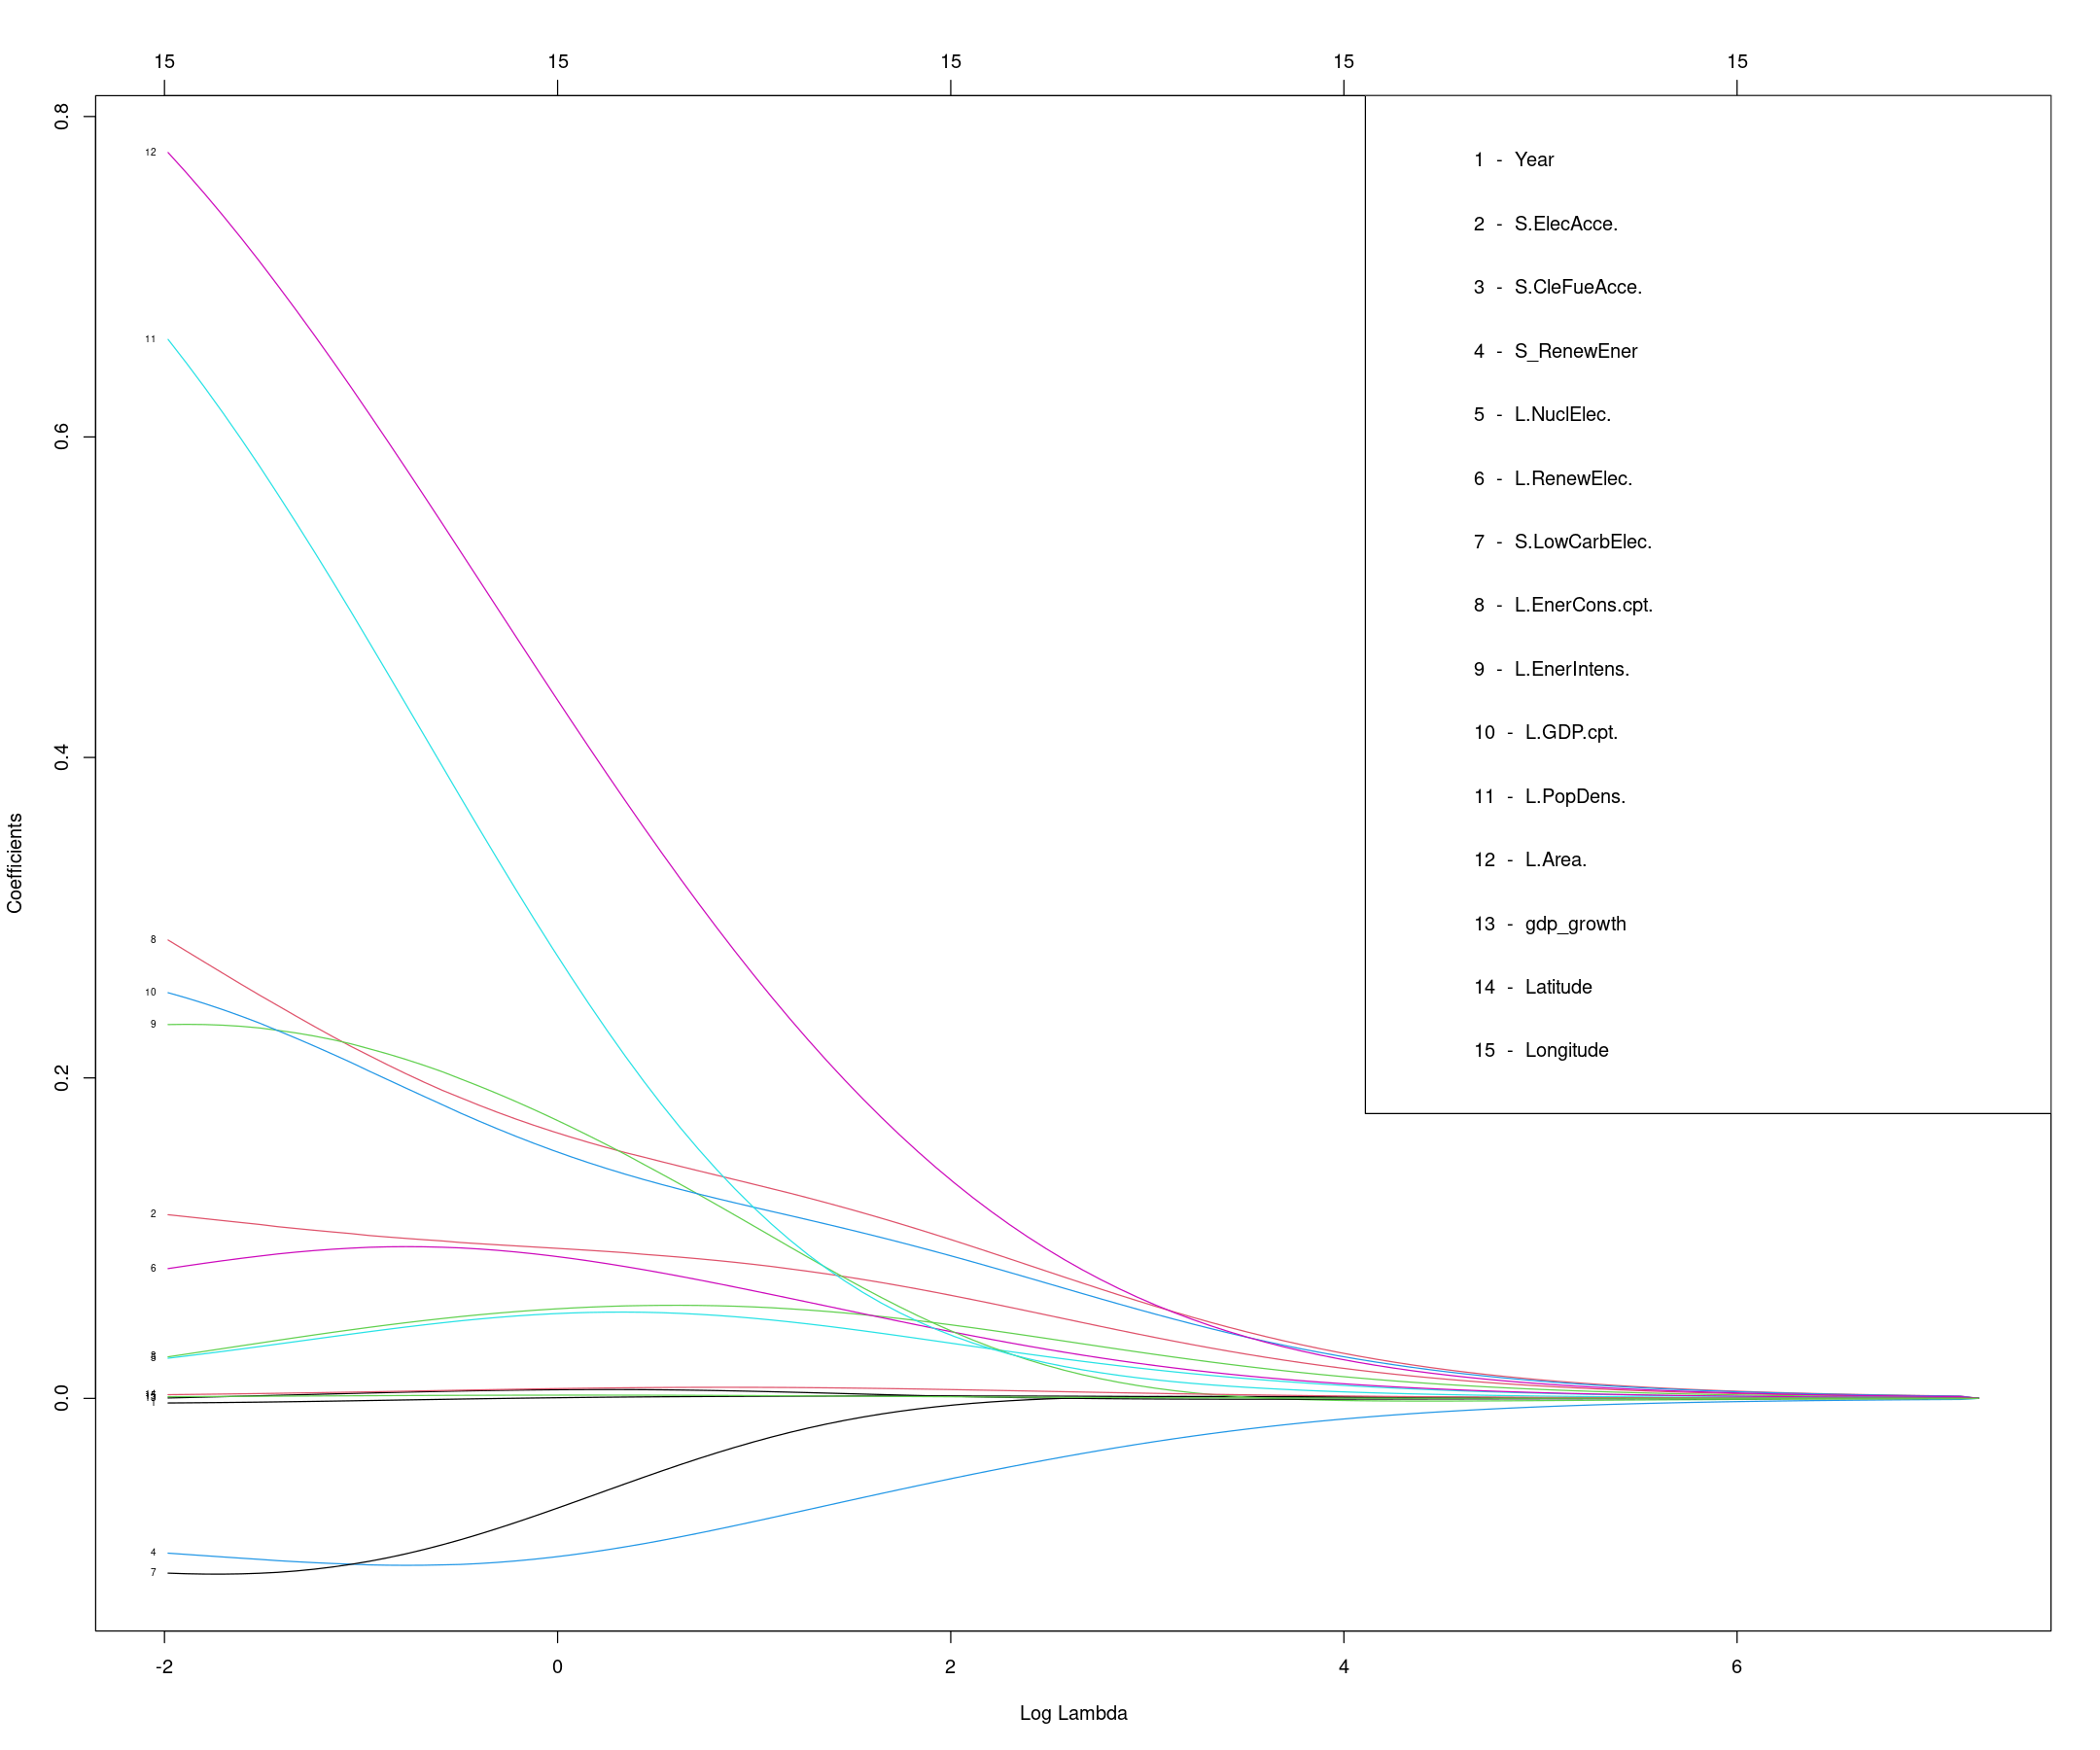

In [31]:
tic("Ridge")
reg.ridge.quanti <- glmnet(y = trainDat$LCO2_emit,
                           x = as.matrix(trainDat), alpha=0)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = trainDat)
reg.ridge <- glmnet(y = trainDat$LCO2_emit, x = x.mat, alpha=0)
t_Ridge <- toc()
options(repr.plot.width = 18, repr.plot.height = 15)

plot(reg.ridge, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

We can see that not many variables have their coefficients put close to $0$ quickly, as it is only with a high penalization that the regression coefficients are put close to zero. It means that a lot of variables are important for the prediction of <em>LCO2_emit</em>. Particularly, the variables <em>L.Area</em> and <em>L.PopDens</em> seem to be very important for the prediction since their coefficients stay quite high for high values of $\lambda$.

CV Ridge: 0.098 sec elapsed


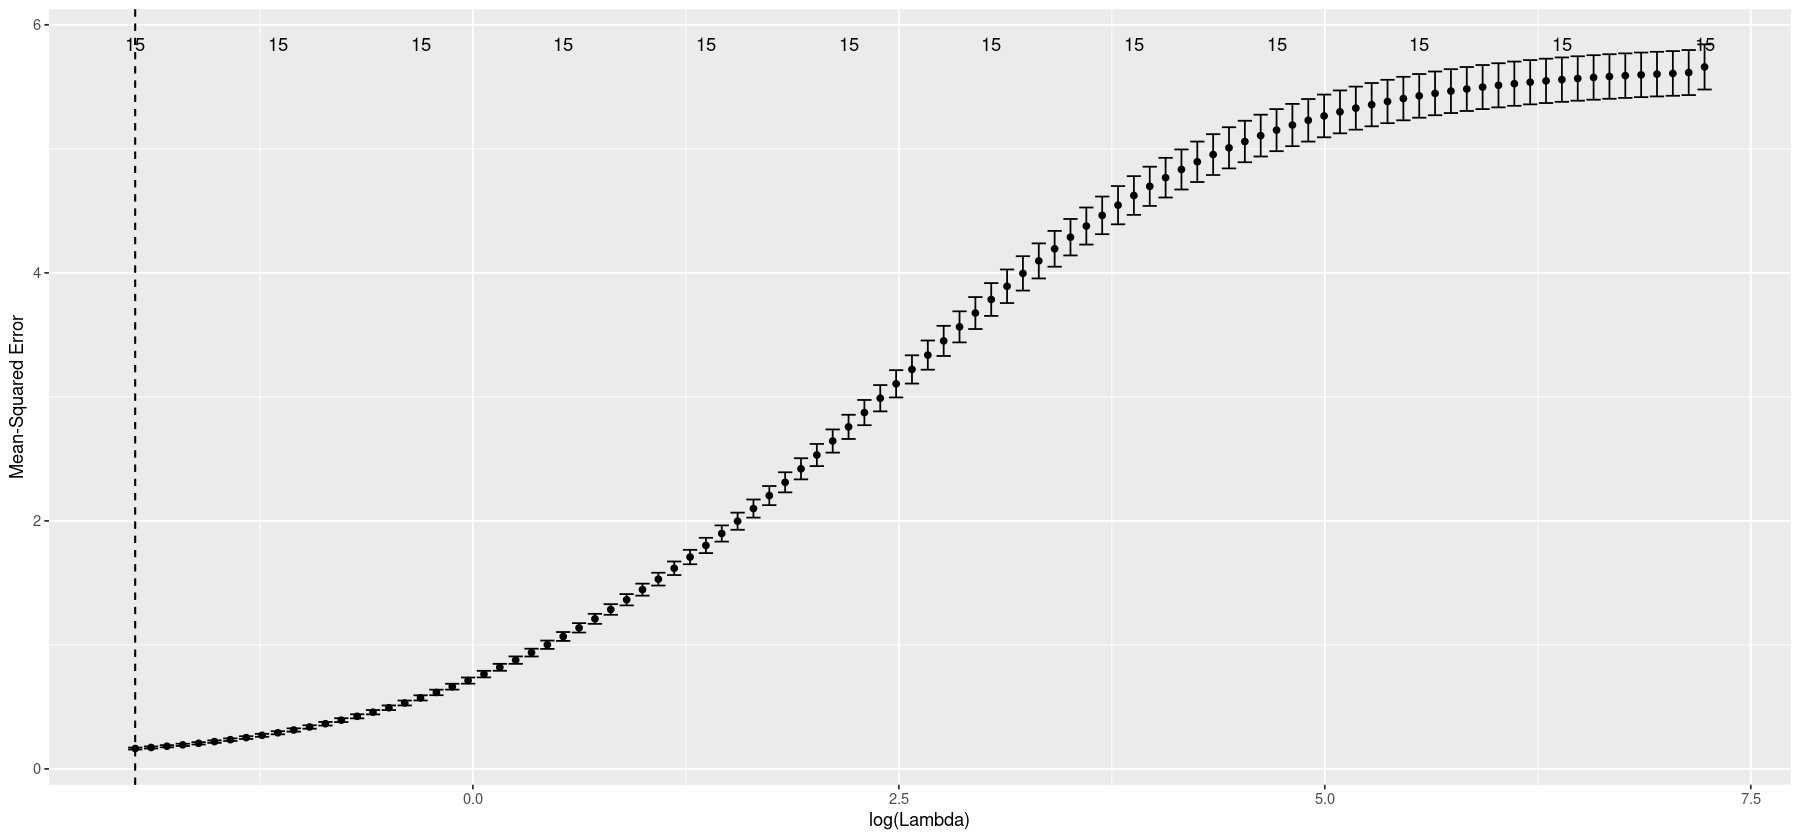

In [32]:
# Cross validation
options(repr.plot.width=15, repr.plot.height=7)
tic("CV Ridge")
reg.ridge.cv <- cv.glmnet(y = trainDat$LCO2_emit, x = x.mat, alpha=0)
t_CVRidge <- toc()
autoplot(reg.ridge.cv)

We can see that the MSE increases quite deeply with the increase of lambda. We will then choose a low value of lambda to have the lowest MSE but not to low to avoid overfitting.

In [33]:
# estimated value using "1se" (largest value of lambda such that error within 1 SE of minimum)
reg.ridge.cv

paste("CV estimate of lambda :", round(reg.ridge.cv$lambda.1se, 3), 
      " with log(Lambda): ", round(log(reg.ridge.cv$lambda.1se), 4))

#corresponding model
coef(reg.ridge.cv, s = "lambda.1se")




Call:  cv.glmnet(x = x.mat, y = trainDat$LCO2_emit, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min 0.1378   100  0.1643 0.007896      15
1se 0.1378   100  0.1643 0.007896      15

[1] "CV estimate of lambda : 0.138  with log(Lambda):  -1.9817"

16 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)     -1.5882074251
Year            -0.0028640690
S.ElecAcce.      0.1146255381
S.CleFueAcce.    0.0259466395
S_RenewEner     -0.0965866293
L.NuclElec.      0.0250735806
L.RenewElec.     0.0809989642
S.LowCarbElec.  -0.1090733098
L.EnerCons.cpt.  0.2860504884
L.EnerIntens.    0.2332961746
L.GDP.cpt.       0.2531756303
L.PopDens.       0.6608829204
L.Area.          0.7775145056
gdp_growth       0.0002668375
Latitude         0.0023266067
Longitude        0.0010847342

We can see more clearly here that there is no coefficient of variable puts to zero by the ridge penalty method. On the other hand, the $\lambda_{min}$ and the $\lambda_{1se}$ are equal which means that the linear model without penalization is the best one, a regularization is not necessary.


### Linear regression with penalization, with variable selection - LASSO penalty

LASSO: 0.009 sec elapsed


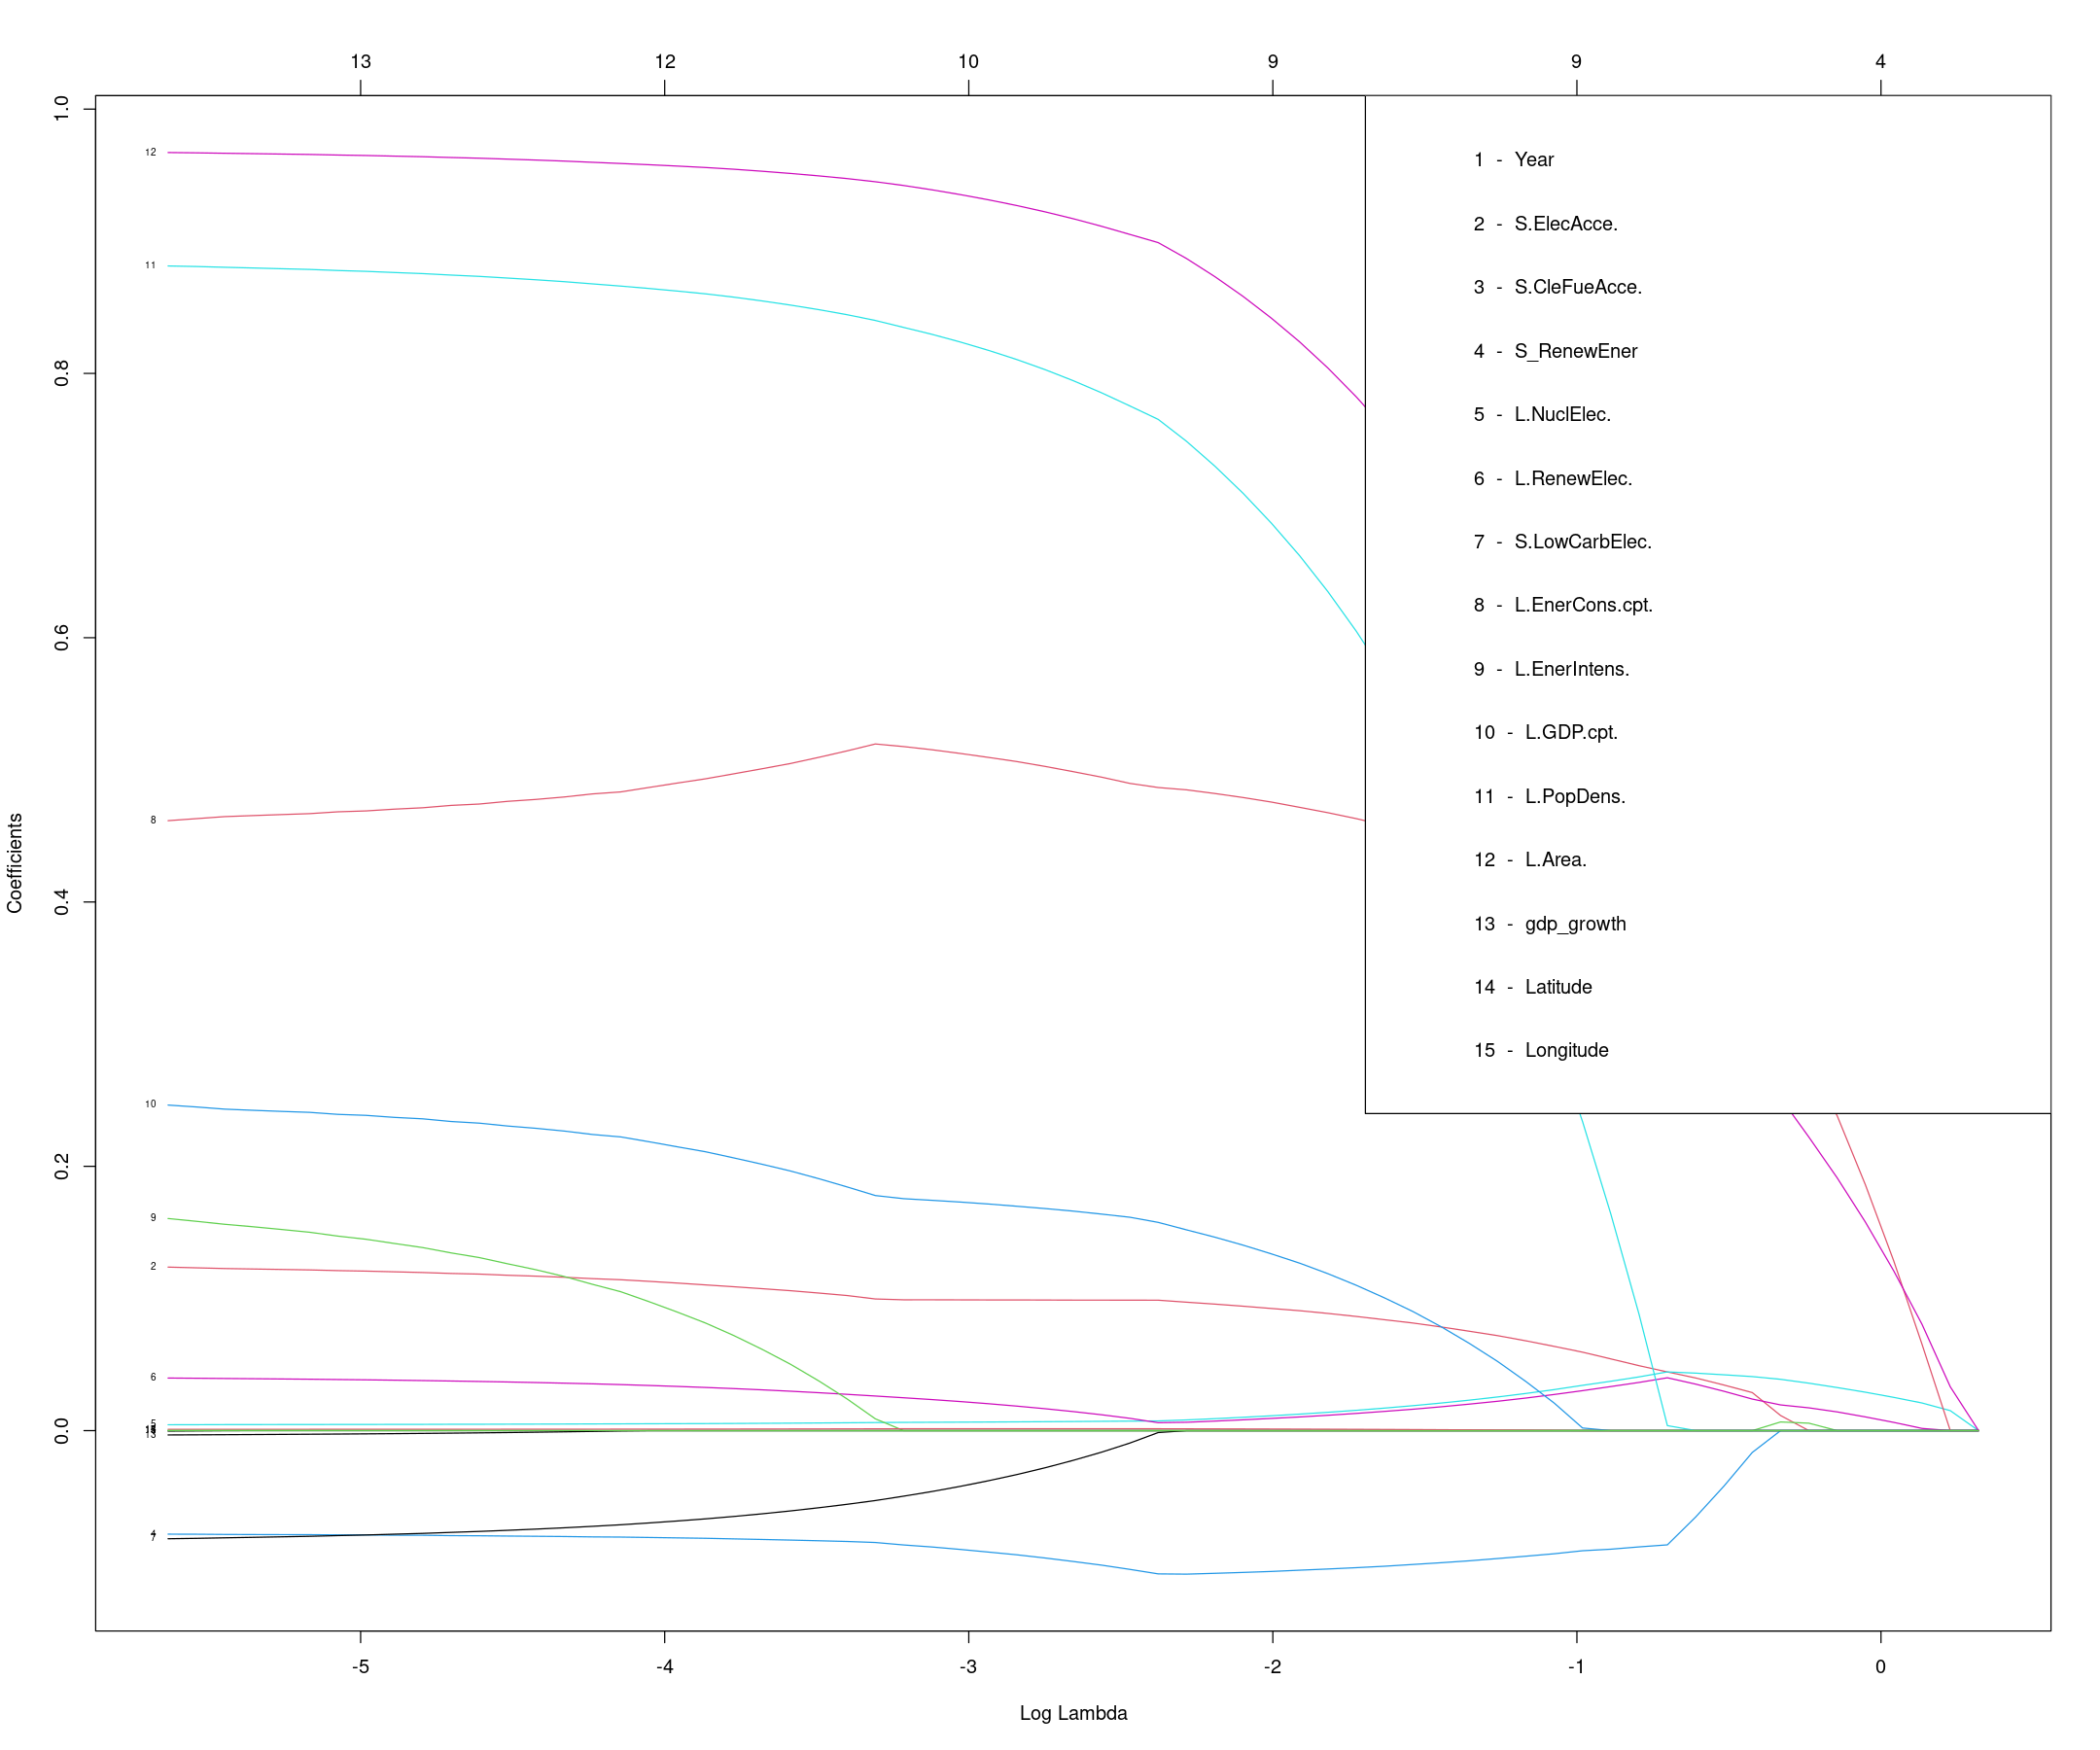

In [34]:
tic("LASSO")
reg.lasso.quanti <- glmnet(y = trainDat$LCO2_emit,
                           x = as.matrix(trainDat))

x.mat <- model.matrix(LCO2_emit ~ . -1, data = trainDat)
reg.lasso <- glmnet(y = trainDat$LCO2_emit, x = x.mat)
t_Lasso <- toc()
options(repr.plot.width = 18, repr.plot.height = 15)

plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

Unlike the Ridge penalty method, the LASSO penalty method puts some coefficient of variables to zero which means that the model will be simpler. The same two variables, i.e.<em> L(Area), L(EnerCons.cpt)</em> seems to be the most important ones. 

CV LASOO: 0.073 sec elapsed


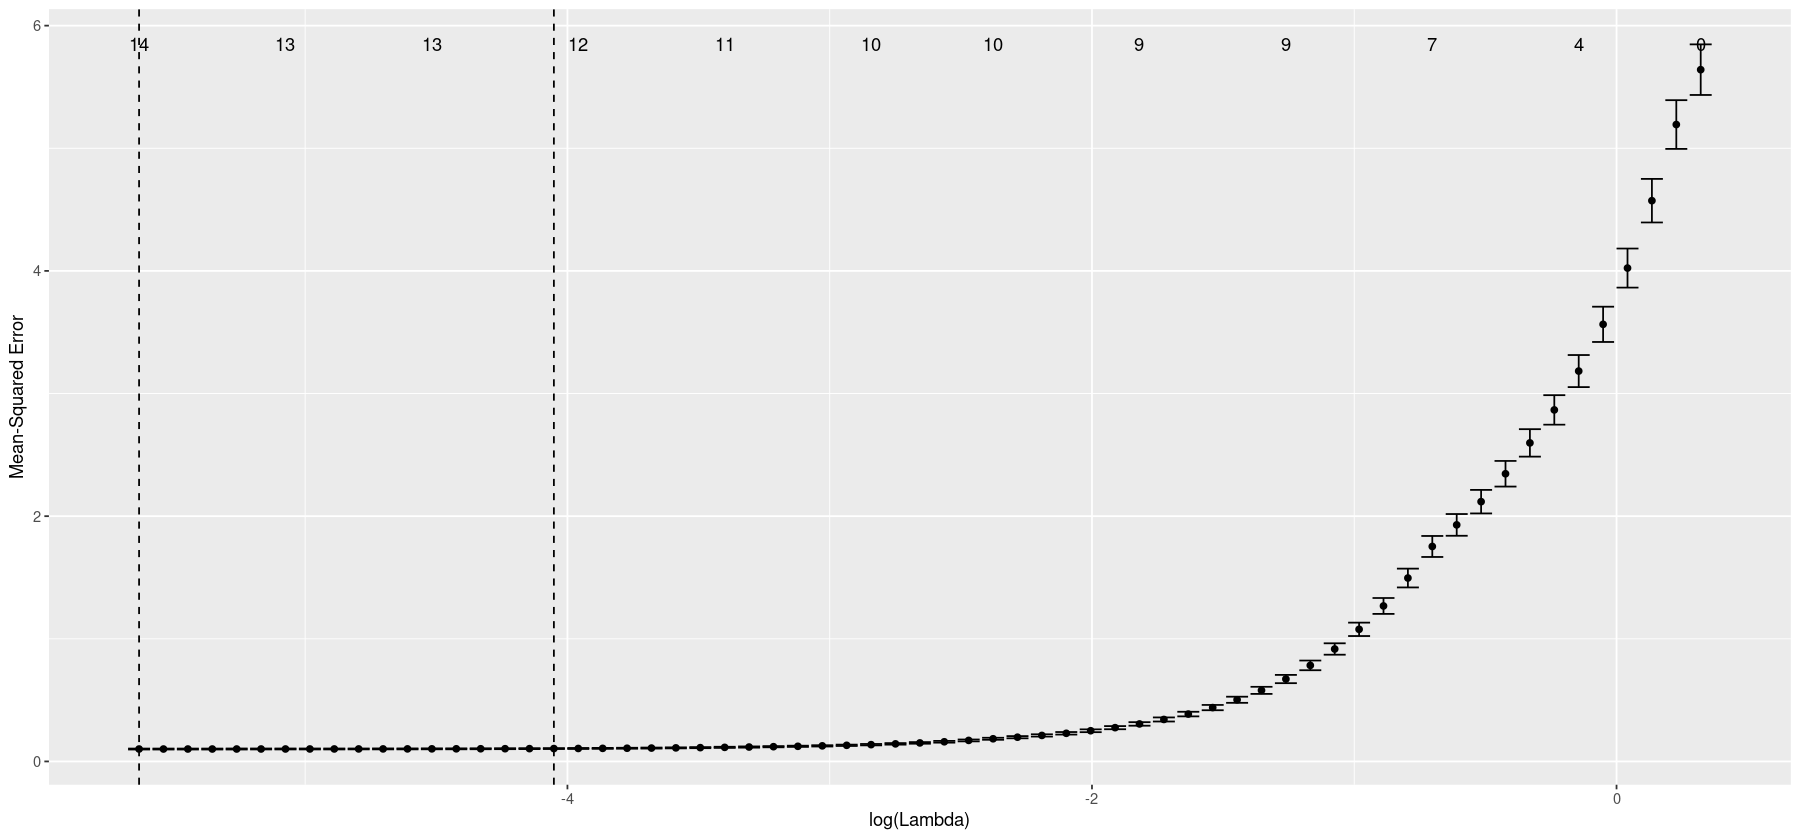

In [35]:
# Cross validation
options(repr.plot.width=15, repr.plot.height=7)
tic("CV LASOO")
reg.lasso.cv <- cv.glmnet(y = trainDat$LCO2_emit, x = x.mat)
t_CVLasso <- toc()
autoplot(reg.lasso.cv)

The MSE increases even more rapidly with lambda than with the Ridge penalty. In oppostion to the Rige, we here get to different values for the min and first standard deviation error penalties, $\lambda_{min}\approx e^{-5.6}$ and $\lambda_{1se}\approx e^{-4.1}$. Let's look further into the differences between these penalties.

In [36]:
# estimated value using "1se" (largest value of lambda such that error within 1 SE of minimum)
print("For '1se':")
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3), 
      " with log(Lambda): ", round(log(reg.lasso.cv$lambda.1se), 4))
# corresponding model
coef(reg.lasso.cv, s = "lambda.1se")

[1] "For '1se':"


[1] "CV estimate of lambda : 0.017  with log(Lambda):  -4.0517"

16 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)     -1.197662e+01
Year             .           
S.ElecAcce.      1.129651e-01
S.CleFueAcce.    .           
S_RenewEner     -8.084517e-02
L.NuclElec.      5.198881e-03
L.RenewElec.     3.417245e-02
S.LowCarbElec.  -6.985365e-02
L.EnerCons.cpt.  4.866895e-01
L.EnerIntens.    9.759162e-02
L.GDP.cpt.       2.185895e-01
L.PopDens.       8.642693e-01
L.Area.          9.579060e-01
gdp_growth       .           
Latitude         1.136029e-03
Longitude        5.118351e-05

We see here that the variables <em>Year, S.CleFueAcce.</em> and <em>gdp_growth</em> have their coefficients put to zero for $\lambda_{1se}$. 

In [37]:
# estimated value using "min" (min value of cvm)
print("For 'min':")
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3), 
      " with log(Lambda): ", round(log(reg.lasso.cv$lambda.min), 4))
coef(reg.lasso.cv, s = "lambda.min")

[1] "For 'min':"


[1] "CV estimate of lambda : 0.004  with log(Lambda):  -5.6332"

16 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)     -1.157289e+01
Year            -3.541933e-04
S.ElecAcce.      1.237417e-01
S.CleFueAcce.    .           
S_RenewEner     -7.833266e-02
L.NuclElec.      4.443119e-03
L.RenewElec.     3.979395e-02
S.LowCarbElec.  -8.181376e-02
L.EnerCons.cpt.  4.615549e-01
L.EnerIntens.    1.604947e-01
L.GDP.cpt.       2.463477e-01
L.PopDens.       8.812947e-01
L.Area.          9.671328e-01
gdp_growth      -3.264757e-03
Latitude         9.858724e-04
Longitude        2.169146e-04

For the case of $\lambda_{min}$, only the variable <em>S(CleFueAcce)</em> is put to zeros. This variable vanishes also for cross validation with "1se". Except, for both methods the coefficients are of approximately of the same order of magnitude, indicating that they are both equally effective for use in a linear regression. This we will quantify more when we compare the different methods used, by comparing their MSE and adjusted determination coefficient

### Comparison

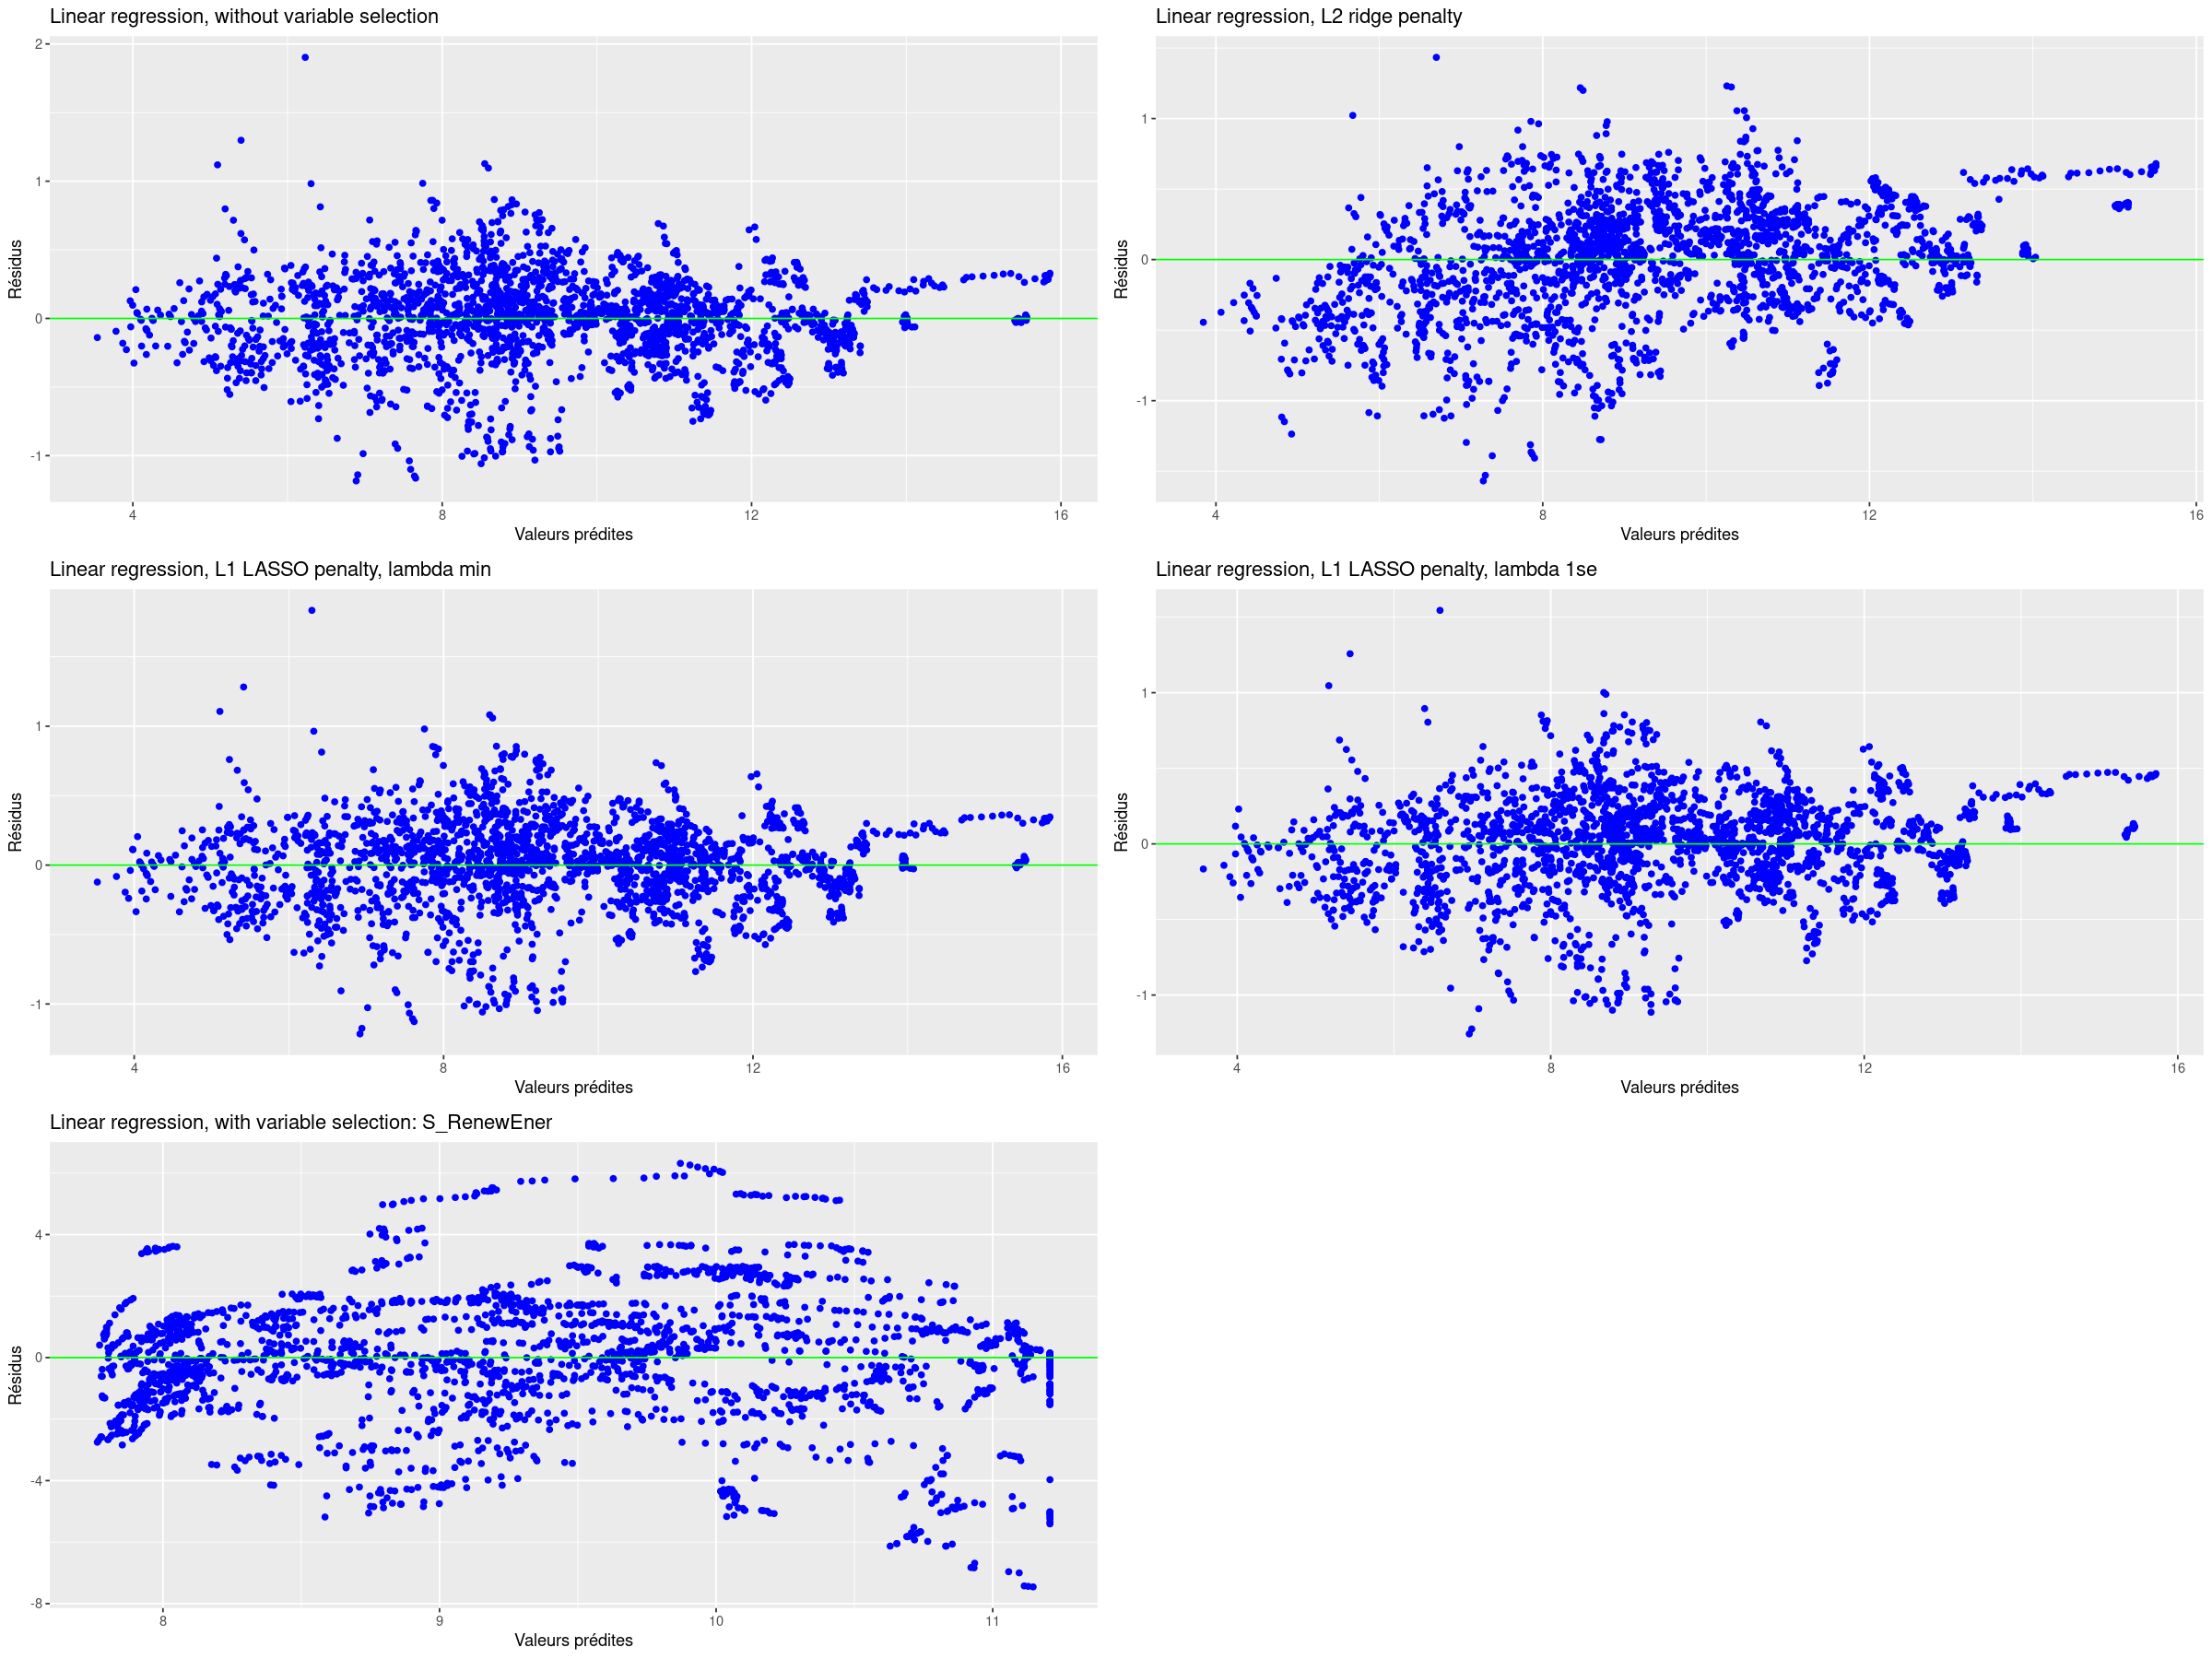

In [38]:
# Extraction of fitted values and residuals

fit.ridge <- predict(reg.ridge.cv, s = "lambda.1se", newx = x.mat)
res.ridge <- trainDat$LCO2_emit - fit.ridge 

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- trainDat$LCO2_emit - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- trainDat$LCO2_emit - fit.lasso.1se

# Graph of the residuals
options(repr.plot.width = 20, repr.plot.height = 15)
grid.arrange(
    gplot.res(fit.lm, res.lm, "Linear regression, without variable selection"),
    gplot.res(fit.ridge, res.ridge, "Linear regression, L2 ridge penalty"),
    gplot.res(fit.lasso, res.lasso, "Linear regression, L1 LASSO penalty, lambda min"),
    gplot.res(fit.lasso.1se, res.lasso.1se, "Linear regression, L1 LASSO penalty, lambda 1se"), 
    gplot.res(fit.lmvs, res.lmvs,'Linear regression, with variable selection: S_RenewEner'),
    ncol=2
    )

Except for the linear regression with the variable selection which seems to have a really bad prediction, the others linear regression, with and without variable selection and with and without penalization, seem to have a similar but good prediction. Indeed, the residuals are between -1 and 1.


In [39]:
errTrainLin = round(mean(res.lm^2),4)
errTrainLinRidge = round(mean(res.ridge^2),4)
errTrainLinLassoMin = round(mean(res.lasso^2), 4)
errTrainLinLasso1se = round(mean(res.lasso.1se^2), 4)
errTrainLinVS = round(mean(res.lmvs^2),4)

print('MSE on training sample:')
paste(" - Linear model without selection:", errTrainLin)
paste(" - Ridge without selection:", errTrainLinRidge)
paste(" - LASSO with lambda.min:", errTrainLinLassoMin)
paste(" - LASSO with lambda.1se:", errTrainLinLasso1se)
paste(" - Linear model with variable slection: S_RenewEner:", errTrainLinVS)

[1] "MSE on training sample:"


[1] " - Linear model without selection: 0.0991"

[1] " - Ridge without selection: 0.1607"

[1] " - LASSO with lambda.min: 0.0994"

[1] " - LASSO with lambda.1se: 0.1034"

[1] " - Linear model with variable slection: S_RenewEner: 4.6586"

In [40]:
# On test data

pred.glm <- predict(reg.lm, newdata = testDat)
pred.glm.vs <- predict(reg.lmvs, newdata = testDat)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDat)
pred.glm.ridge <- predict(reg.ridge.cv, newx = x.mat, s='lambda.1se')
pred.glm.1se <- predict(reg.lasso.cv, newx = x.mat, s='lambda.1se')
pred.glm.min <- predict(reg.lasso.cv, newx = x.mat, s='lambda.min')

errTestLin = MSE(pred.glm)
errTestLinRidge = MSE(pred.glm.ridge)
errTestLinLassoMin = MSE(pred.glm.min)
errTestLinLasso1se = MSE(pred.glm.1se)
errTestLinVS = MSE(pred.glm.vs)
# R-squared
RLin = R_squared(pred.glm)
RLinRidge = R_squared(pred.glm.ridge)
RLinLassoMin = R_squared(pred.glm.min)
RLinLasso1se = R_squared(pred.glm.1se)
RLinVS = R_squared(pred.glm.vs)

print("MSE on test sample:")
paste(" - Linear model without selection: ", errTestLin)
paste(" - Ridge without selection:", errTestLinRidge)
paste(" - LASSO with lambda.min: ", errTestLinLassoMin)
paste(" - LASSO with lambda.1se: ", errTestLinLasso1se)
paste(" - Linear model with variable slection: S_RenewEner: ", errTestLinVS)

print("Adjusted R-squared:")
print("MSE on test sample:")
paste(" - Linear model without selection: ", RLin)
paste(" - Ridge without selection:", RLinRidge)
paste(" - LASSO with lambda.min: ", RLinLassoMin)
paste(" - LASSO with lambda.1se: ", RLinLasso1se)
paste(" - Linear model with variable slection: S_RenewEner: ", RLinVS)

[1] "MSE on test sample:"


[1] " - Linear model without selection:  0.0998458127888146"

[1] " - Ridge without selection: 0.168269215193284"

[1] " - LASSO with lambda.min:  0.10056277581951"

[1] " - LASSO with lambda.1se:  0.106189061638763"

[1] " - Linear model with variable slection: S_RenewEner:  4.73082591215295"

[1] "Adjusted R-squared:"
[1] "MSE on test sample:"


[1] " - Linear model without selection:  0.9995"

[1] " - Ridge without selection: 0.9991"

[1] " - LASSO with lambda.min:  0.9995"

[1] " - LASSO with lambda.1se:  0.9995"

[1] " - Linear model with variable slection: S_RenewEner:  0.9755"

As we expected, the linear model without selection has the lowest error on the training sample. Its adjusted $R^2$ is though surpassed by LASSO. The variable selection is used to have more interpretable model. 

## Support Vector Model (SVM)

### Choosing kernels

From the [documentation](https://www.rdocumentation.org/packages/e1071/versions/1.7-14/topics/svm) of the <em>e1071</em>-library, we have the following choice of kernels:

- Radial/Gaussian kernel: $e^{-\gamma |u'-v|^2}$,
- Linear kernel: $u'v$,
- Polynomial kernel: $(\gamma u'v + coef0)^{degree}$,
- Sigmoidal kernel: $\tanh{(\gamma u'v + coef0)}$,

where, $u',v$ are two different entries, $\gamma$ and $coef0$ are different tuneable parameters.

Naïvly calculating regression with each kernel gived the following result.

In [41]:
# Default parameters
svm.regrad = svm(LCO2_emit ~ ., data = trainDat)
summary(svm.regrad)

svm.reglin = svm(LCO2_emit ~ ., data = trainDat, kernel = 'linear')
summary(svm.reglin)

svm.regpol= svm(LCO2_emit ~ ., data = trainDat, kernel = 'polynomial')
summary(svm.regpol)

svm.regsig = svm(LCO2_emit ~ ., data = trainDat, kernel = 'sigmoid')
summary(svm.regsig)


Call:
svm(formula = LCO2_emit ~ ., data = trainDat)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.06666667 
    epsilon:  0.1 


Number of Support Vectors:  429







Call:
svm(formula = LCO2_emit ~ ., data = trainDat, kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.06666667 
    epsilon:  0.1 


Number of Support Vectors:  869







Call:
svm(formula = LCO2_emit ~ ., data = trainDat, kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.06666667 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  944







Call:
svm(formula = LCO2_emit ~ ., data = trainDat, kernel = "sigmoid")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.06666667 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  2287






From the base outputs above, we have the following observations:  


**Polynomial kernel**  
This is too expensive due to high number of support vectors. Also we have to tune three paramers: cost, gamma, coef0, as well the degree. We therefore choose to not use the polynomial kernel.


**Sigmoidal kernel**: 
The sigmoidal kernel is too specific, as it assumes a sigmoidal relation between the variables. It also requires a large number of support vectors, though this may be lowered using tuning. 

**Linear kernel**:
This has the lowest number of SVMs. We also know that the relationship between year and LCO2_emit is almost linear. What speaks against this method is that it is unsuitable for catch comlex tendancies in the dataset, if present. We still test this kernel.

**Radial/Gaussian kernel:**  
This is the default kernel as it is performing relatively well in a wide range of situations. In our case it is also the kernel with initially the next-lowest number of SVMs. We test this kernel as well.


### Tuning the parameters

As seen in the expression for tuning above, the linear kernel does only need tuning of the cost-parameter, while the radial kernel required tuning of both the cost- and gamma-parameter.

#### Radial kernel

Tuning on parameters radial SVM: 171.467 sec elapsed


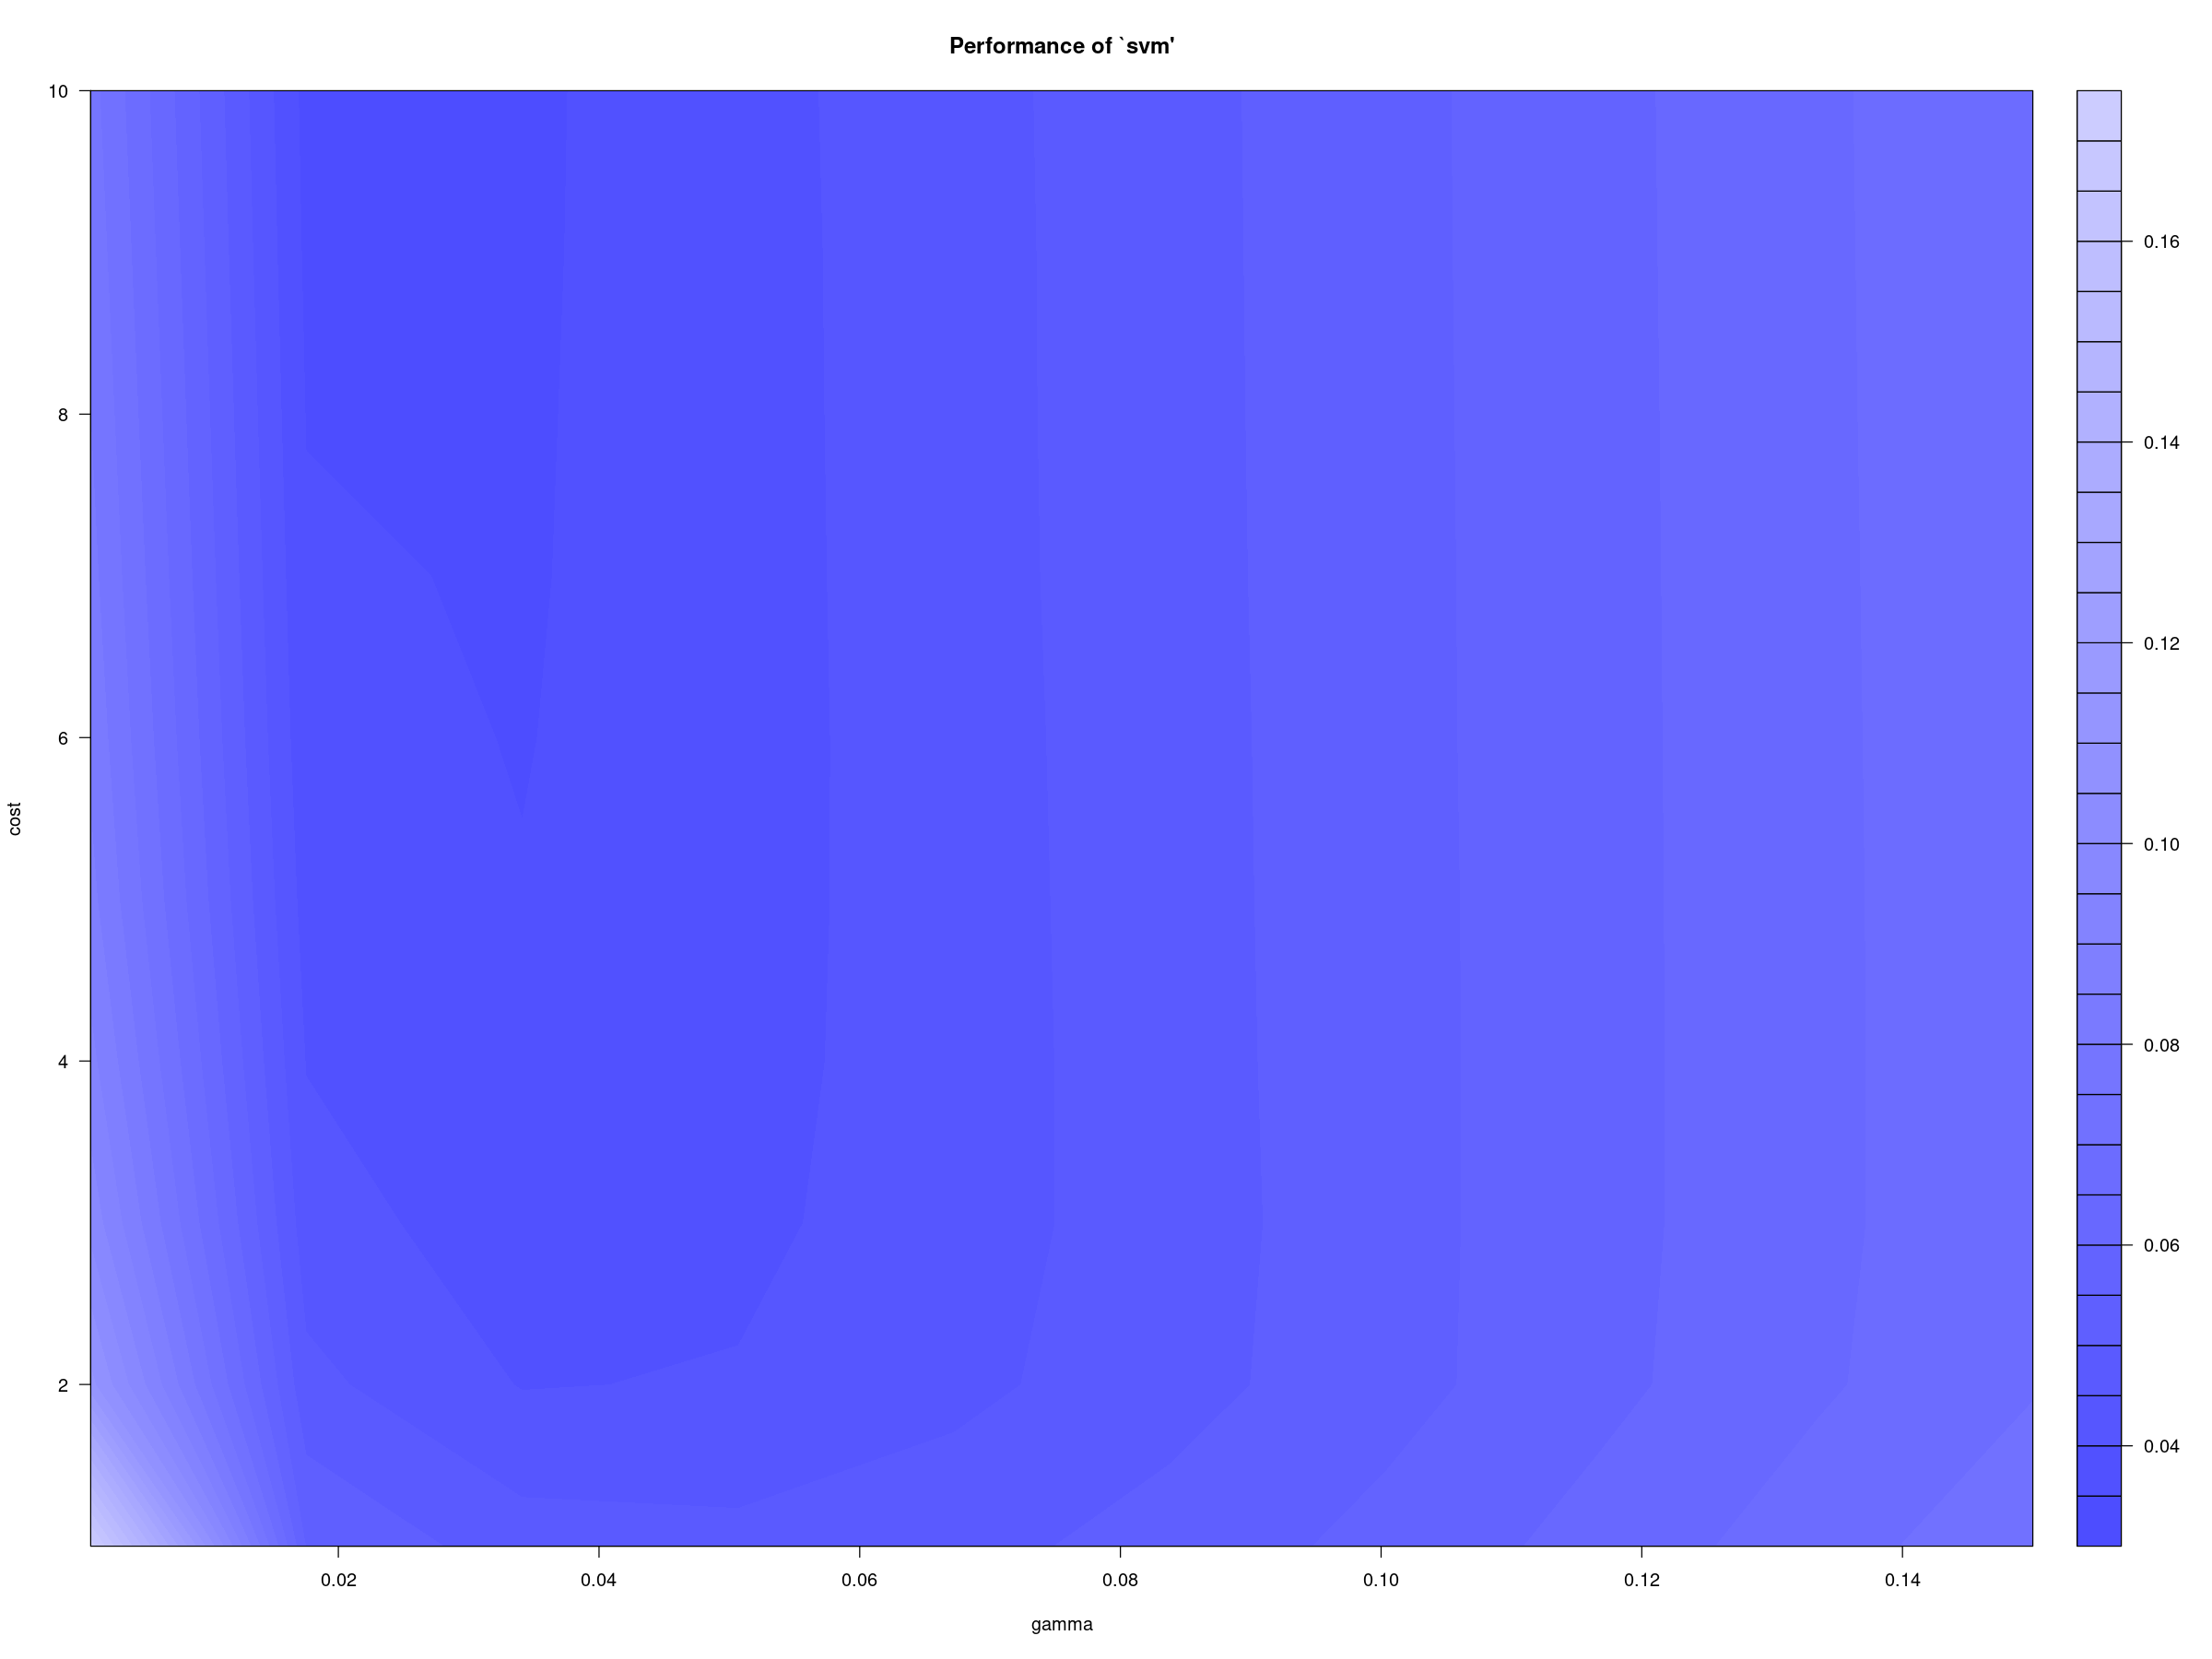

In [42]:
set.seed(1265)
tic("Tuning on parameters radial SVM")
svm.reg.tune = tune.svm(LCO2_emit ~ ., data = trainDat, cost = seq(1, 10, by=1), 
    gamma = seq(0.001, 0.15, length.out = 10), kernel='radial')
plot(svm.reg.tune)
t_RSVMTuning1 <- toc()

The highest performance is achieved with $\gamma \in [0.02, 0.04]$ with high cost. The area of highest performance is a the boundary of this tuning-table, but since we do not want the cost to be too high, we do not expand the search. Instead, we zoom in to the area with maximal value and search in the area of $\pm 25\%$ for the cost and $\pm 40\%$ for the gamma parameter, with higher resolution.


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
      gamma cost
 0.02145679   13

- best performance: 0.03137963 


Tuning on parameters radial SVM: 190.666 sec elapsed


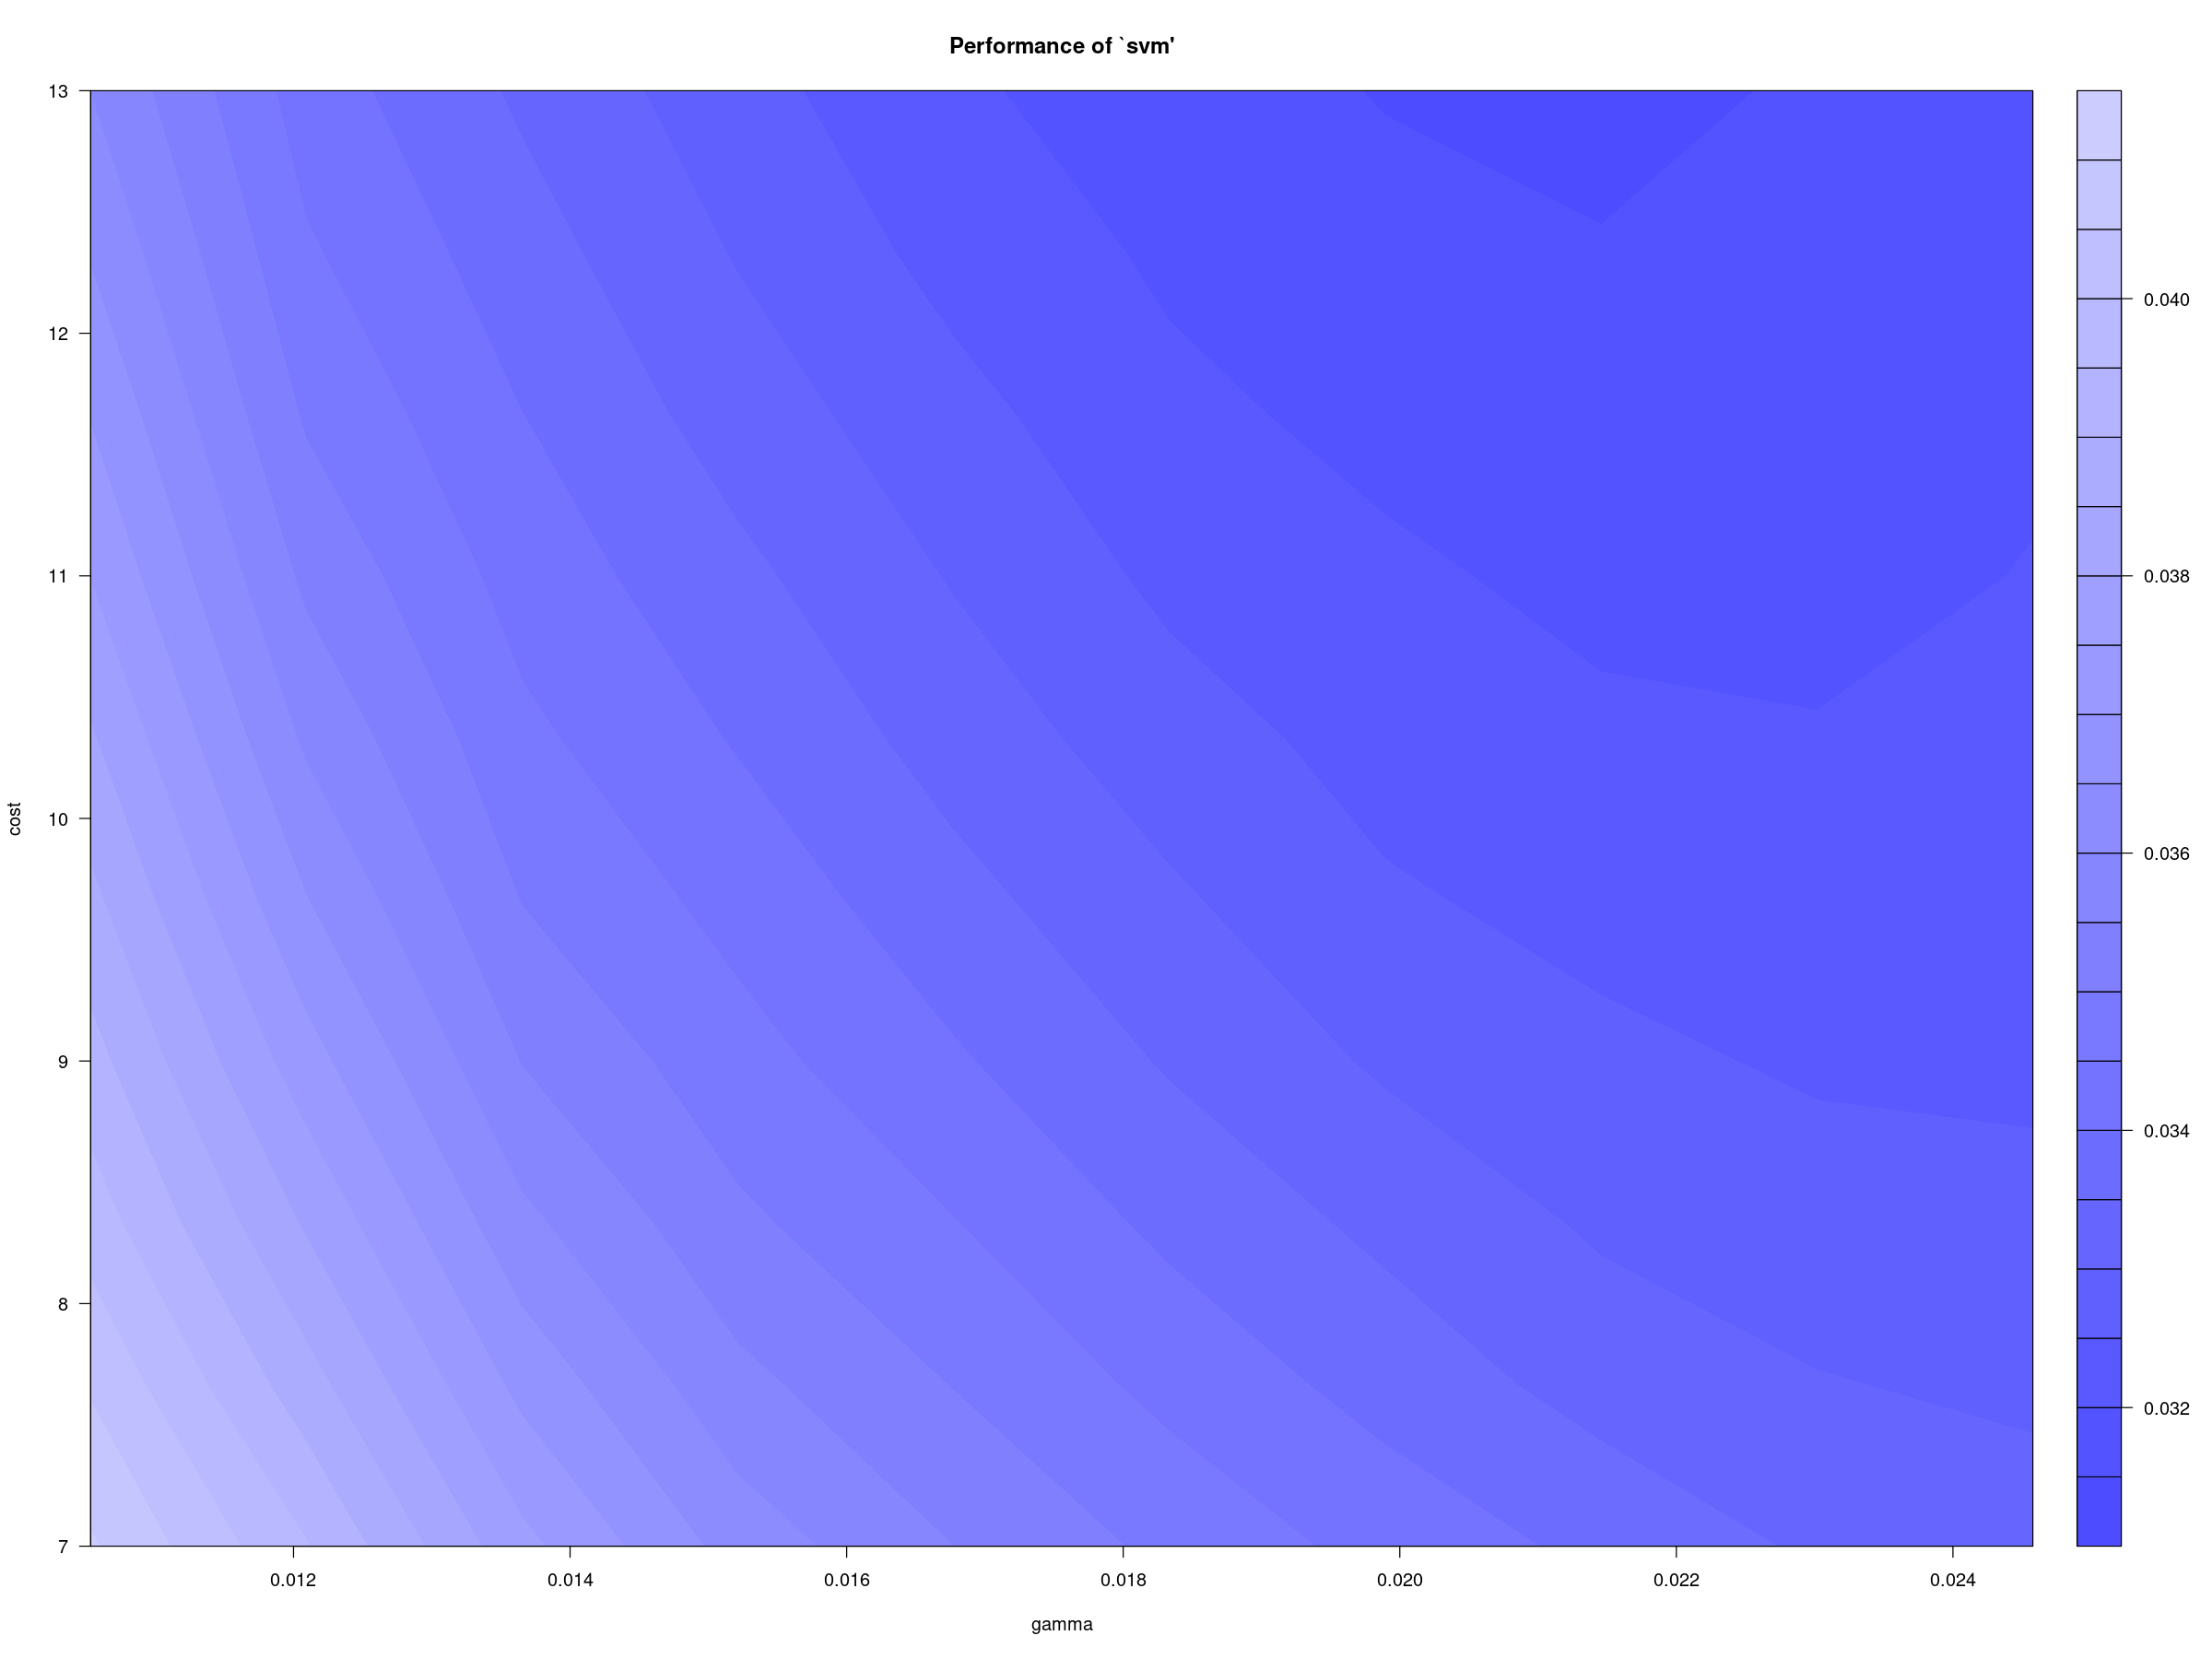

In [43]:
cost_seq = seq(floor(0.75*svm.reg.tune$best.parameters$cost), ceiling(1.25*svm.reg.tune$best.parameters$cost), length.out = 10)
gamma_seq = seq(0.6*svm.reg.tune$best.parameters$gamma, 1.4*svm.reg.tune$best.parameters$gamma, length.out = 10)
tic("Tuning on parameters radial SVM")
svm.reg.tune2 = tune.svm(LCO2_emit ~ ., data = trainDat, cost =  cost_seq, 
                        gamma = gamma_seq, kernel='radial')
svm.reg.tune2
plot(svm.reg.tune2)
t_RSVMTuning2 <- toc()

The best performance is found for $\gamma \in [0.020, 0.022]$ with cost of $13$.The performance is quite good, so we will use these parameter values. 

In [44]:
tic("Tuned Radial SVM")
svm.reg = svm(LCO2_emit ~ ., data = trainDat, cost = svm.reg.tune2$best.parameters$cost, 
    gamma = svm.reg.tune2$best.parameters$gamma)
t_RSVM <- toc()
summary(svm.reg)

Tuned Radial SVM: 0.212 sec elapsed



Call:
svm(formula = LCO2_emit ~ ., data = trainDat, cost = svm.reg.tune2$best.parameters$cost, 
    gamma = svm.reg.tune2$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  13 
      gamma:  0.02145679 
    epsilon:  0.1 


Number of Support Vectors:  290






Here the number of required support vectors has been through a moderate reduction. The cost is also quite high. We do the same procedure with the linear kernel before comparing the two.

#### Linear kernel

In [45]:
tic("Tuning of SVM with linear kernel")
svm.reglin.tune = tune.svm(LCO2_emit ~ ., data = trainDat, kernel='linear', cost = seq(1, 10, length.out=10))
svm.reglin.tune
t_LSVMTuning <- toc()


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    9

- best performance: 0.1035129 


Tuning of SVM with linear kernel: 290.37 sec elapsed


The performance is noticeably lower than for the radial kernel. The cost is quite high, so we do not want to increase that further. Therefore we wil use this value for the cost parameter in the final model.

In [46]:
tic("Tuned Linear kernel")
svm.reglin = svm(LCO2_emit ~ ., data = trainDat, cost = svm.reglin.tune$best.parameters$cost, kernel='linear')
t_LSVM <- toc()
summary(svm.reglin)

Tuned Linear kernel: 4.619 sec elapsed



Call:
svm(formula = LCO2_emit ~ ., data = trainDat, cost = svm.reglin.tune$best.parameters$cost, 
    kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  9 
      gamma:  0.06666667 
    epsilon:  0.1 


Number of Support Vectors:  873






After the tuning, the number of support vectors has slightly increased, due to the high value of the cost parameter. High cost values will increase the bias, but lower the variance. The increase in support vectors is not to high, so we keep this value for the comparison. 

### Comparison

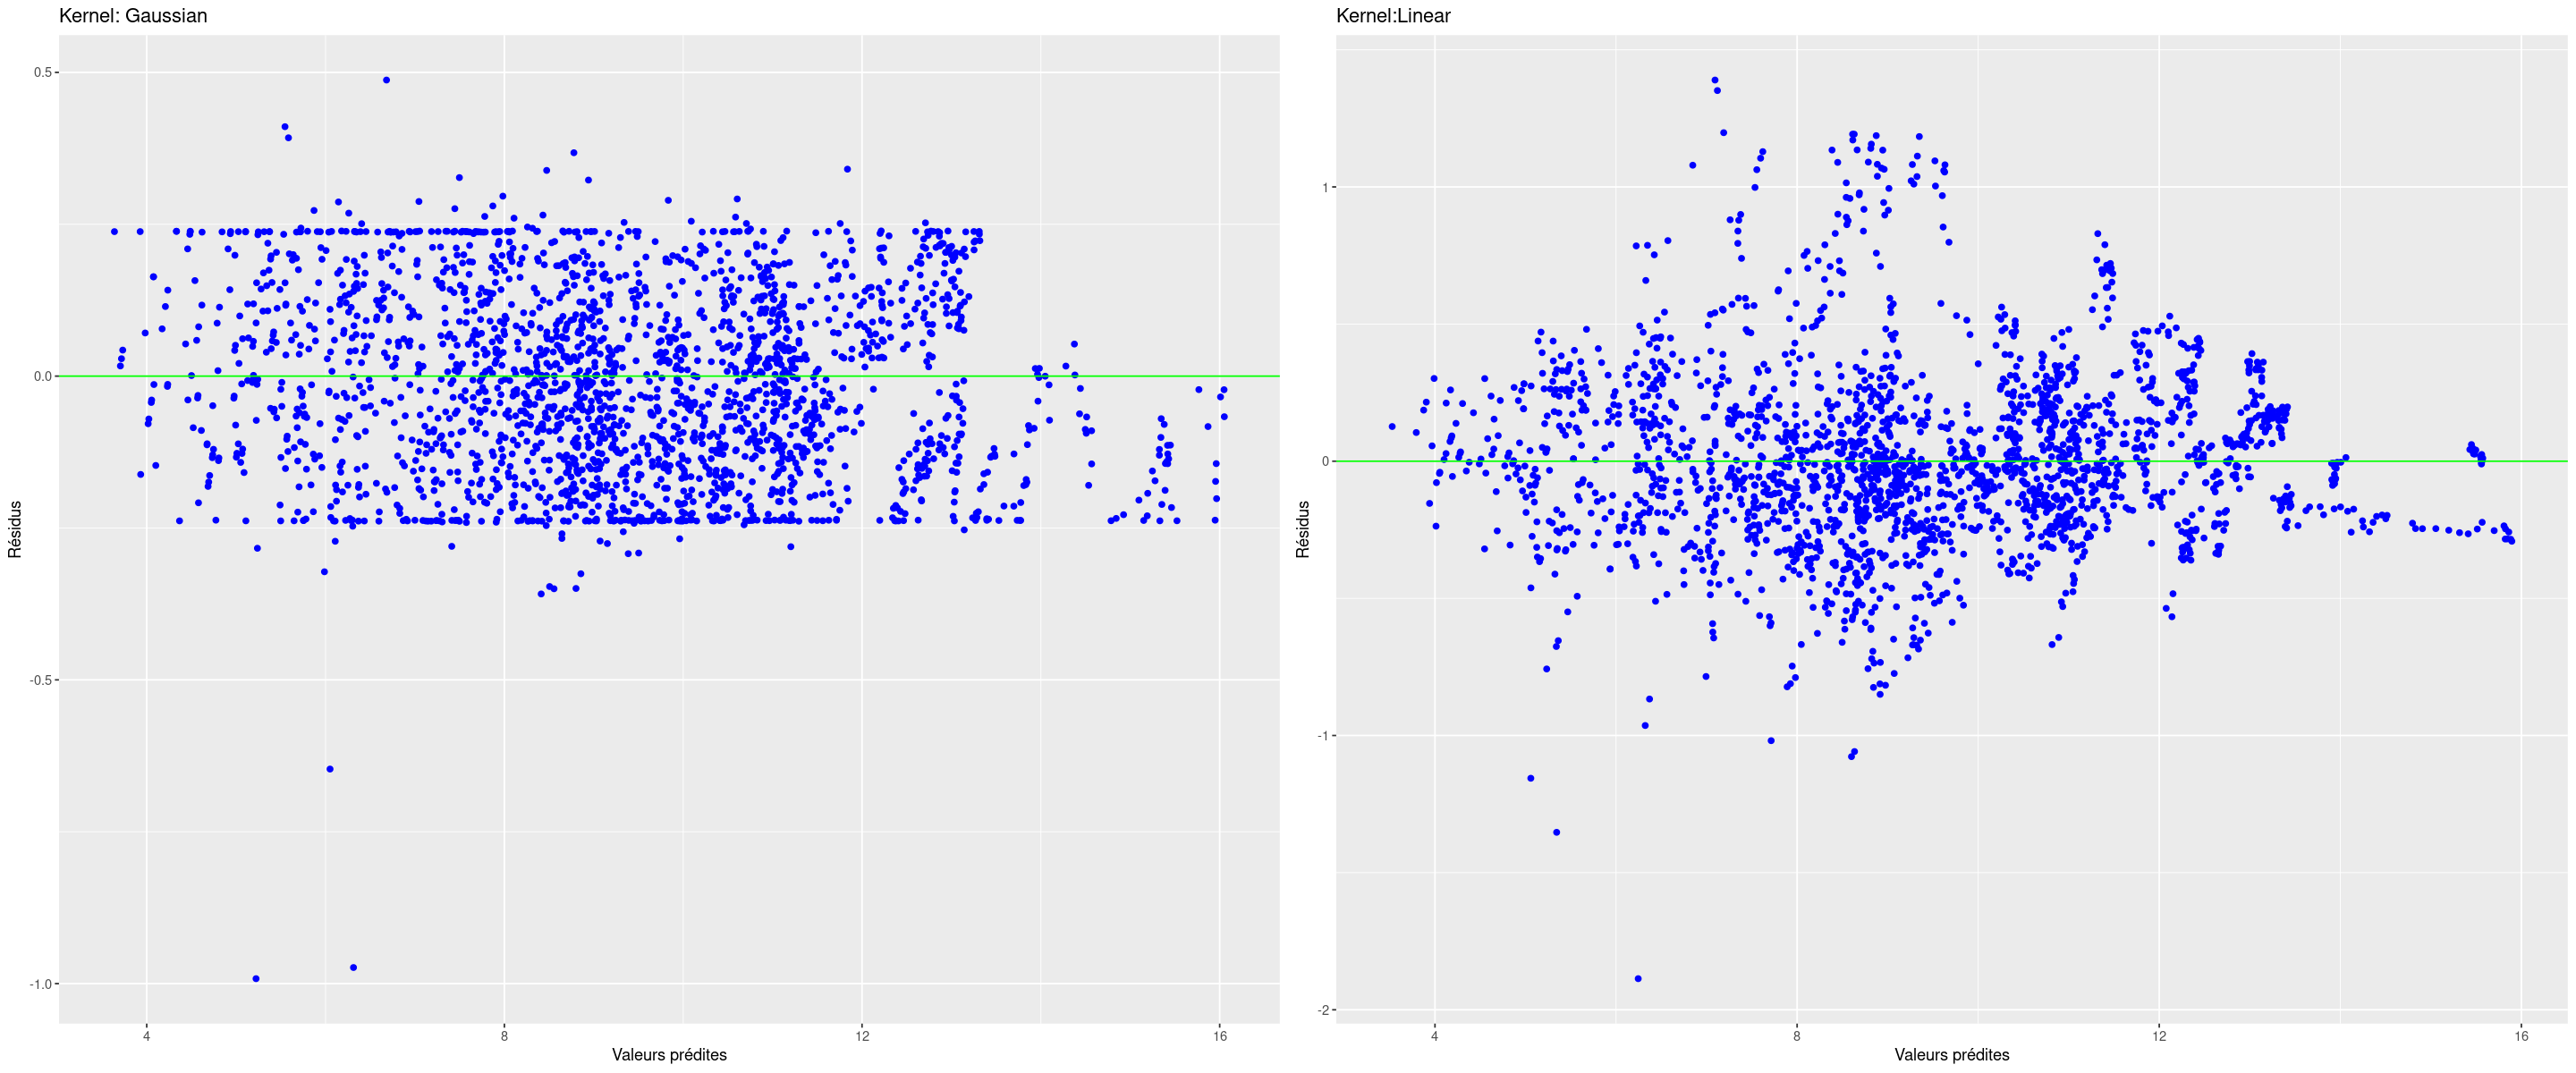

In [47]:
# computation and graph of the residuals

options(repr.plot.width = 24, repr.plot.height = 10)

fit.svmr = svm.reg$fitted
res.svmr = fit.svmr - trainDat$LCO2_emit
g1 <- gplot.res(fit.svmr,res.svmr,titre="Kernel: Gaussian")

fit.svmrlin = svm.reglin$fitted
res.svmrlin = fit.svmrlin - trainDat$LCO2_emit
g2 <- gplot.res(fit.svmrlin,res.svmrlin,titre="Kernel:Linear")

grid.arrange(g1, g2, ncol = 2)

With the graphs of the residuals, we can clearly see that the Gaussian kernel makes a better prediction than the linear one. Indeed, even if there are some outliers most of the predictions are really close from the real values (ie most of the residuals are between -0.25 et 0.25). Furthermore, the number of support vectors is lower for the Gaussian/radial kernel and the proportion is about 10%. It means that the model is simpler and does not seem to overfit so it's a good choice.

In [48]:
errTrainSVMGaussian = round(mean(res.svmr^2),4)
errTrainSVMLinear = round(mean(res.svmrlin^2),4)

print('MSE on training sample: ')
paste(" - Gaussian kernel: ", errTrainSVMGaussian)
paste(" - Linear kernel: ", errTrainSVMLinear)

[1] "MSE on training sample: "


[1] " - Gaussian kernel:  0.023"

[1] " - Linear kernel:  0.1017"

In [49]:
pred.svmr = predict(svm.reg, newdata=testDat)
pred.svmrlin = predict(svm.reglin, newdata=testDat)

errTestSVMGaussian = MSE(pred.svmr)
errTestSVMLinear = MSE(pred.svmrlin)

RSVMGaussian = R_squared(pred.svmr)
RSVMLin = R_squared(pred.svmrlin)

print("MSE on test sample") 
paste(" - Gaussian kernel: ", errTestSVMGaussian)
paste(" - Linear kernel: ", errTestSVMLinear)

print("Adjusted R-square ") 
paste(" - Gaussian kernel: ", RSVMGaussian)
paste(" - Linear kernel: ", RSVMLin)

[1] "MSE on test sample"


[1] " - Gaussian kernel:  0.0511199130624779"

[1] " - Linear kernel:  0.10437955540383"

[1] "Adjusted R-square "


[1] " - Gaussian kernel:  0.9997"

[1] " - Linear kernel:  0.9995"

As we thought looking at the residuals graphs, the mean squared error of prediction on the test sample is lower for the Gaussian kernel. It seems to be a really good prediction method for this dataset, in agreement with the high value for the adjusted determination coefficient.

## Classification and Regression Trees (CART)

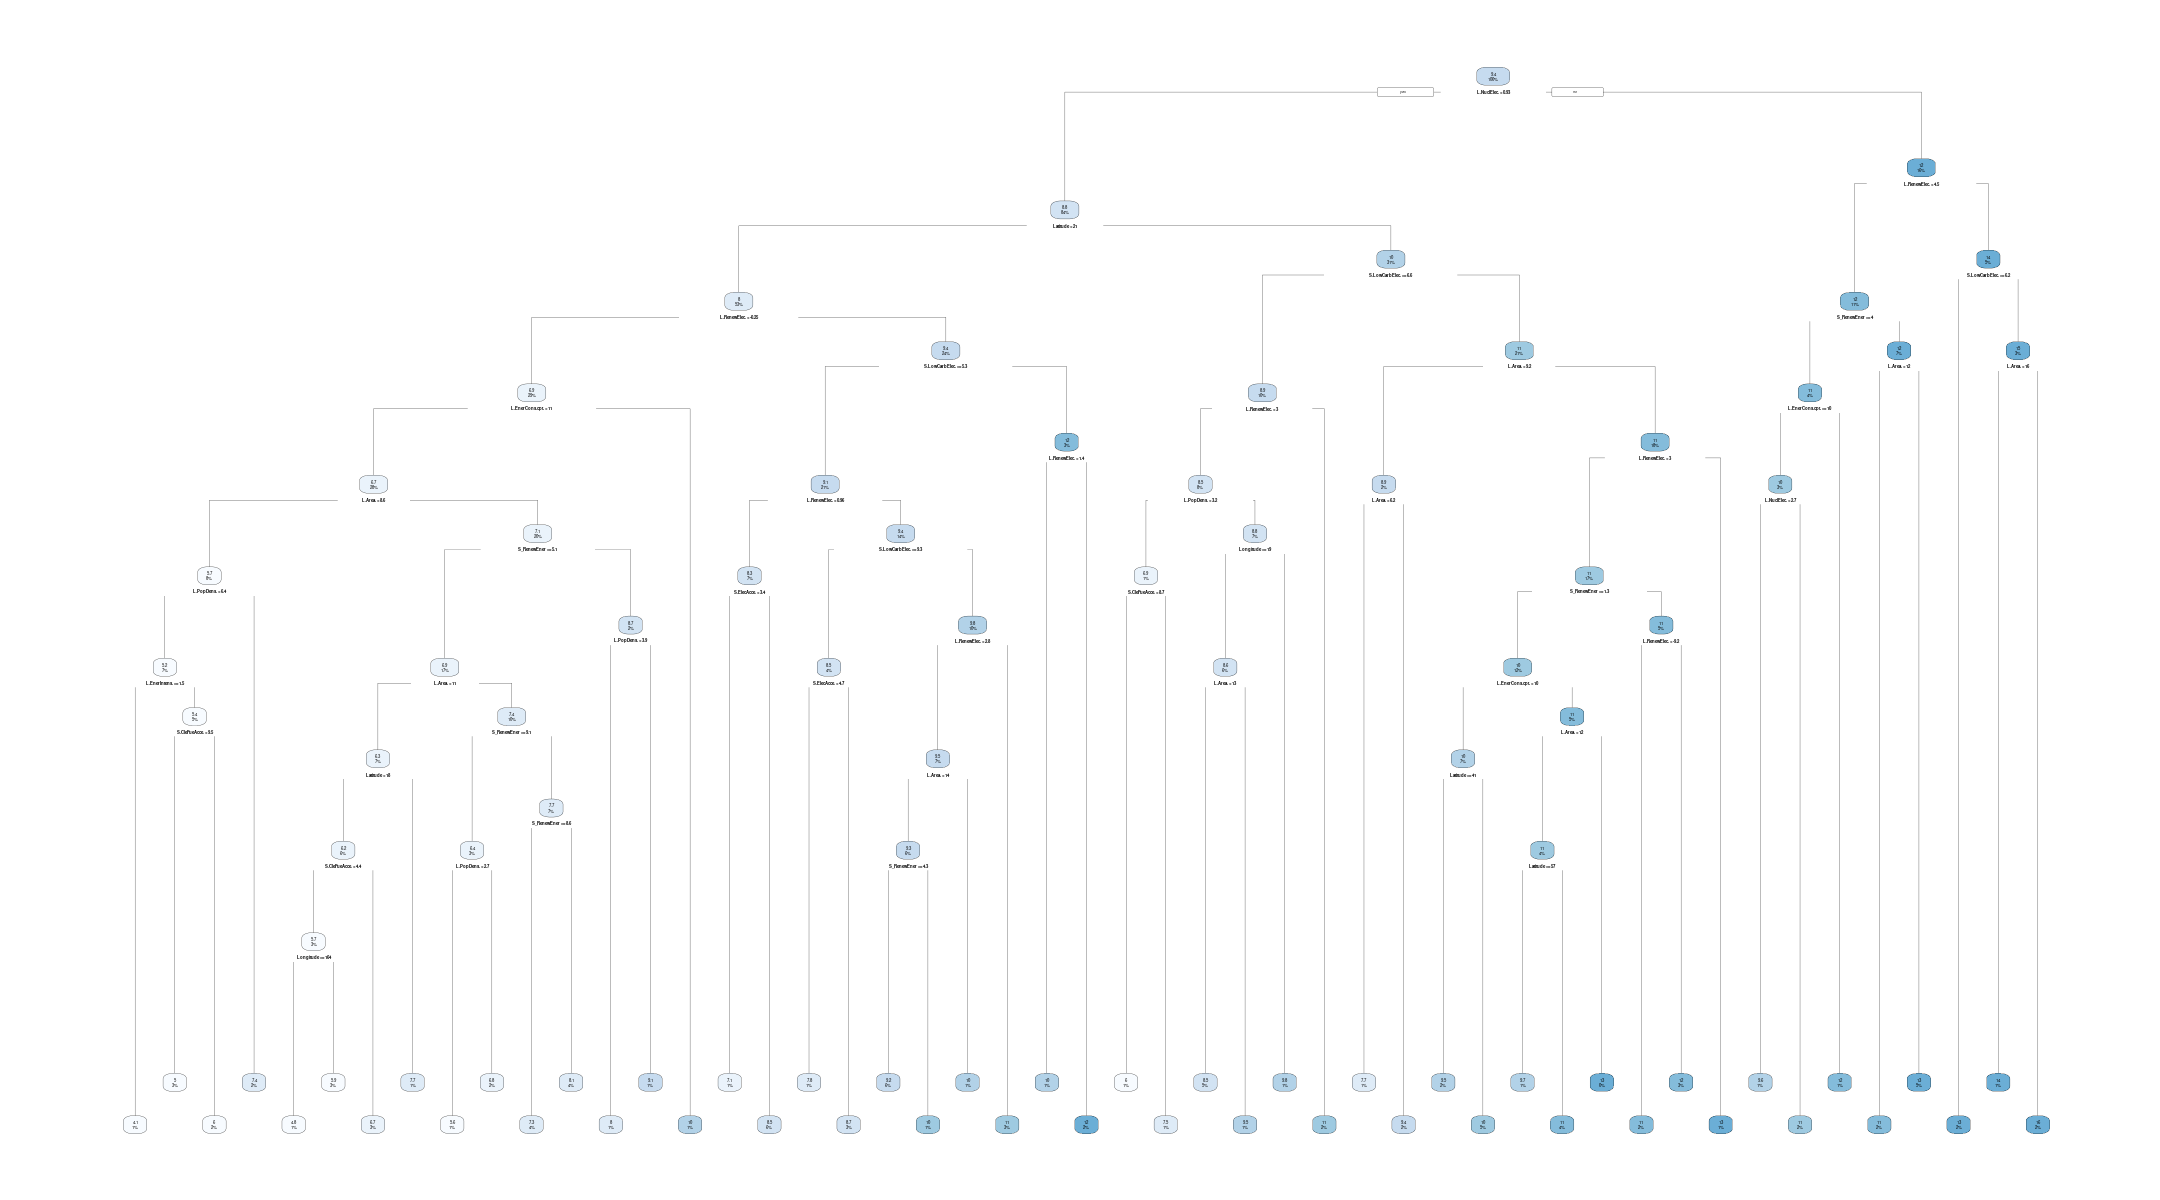

In [50]:
tree.reg = rpart(LCO2_emit~.,data=trainDat, control = rpart.control(cp=0.001))

options(repr.plot.width = 18, repr.plot.height = 10)
rpart.plot(tree.reg)

Naïvly computing the regression tree with low cost results in a large tree which is difficult to interpret. Therefore we use cross-validation to tune the control-parameter.

### Choosing the optimal tree

Tuning CART: 0.003 sec elapsed


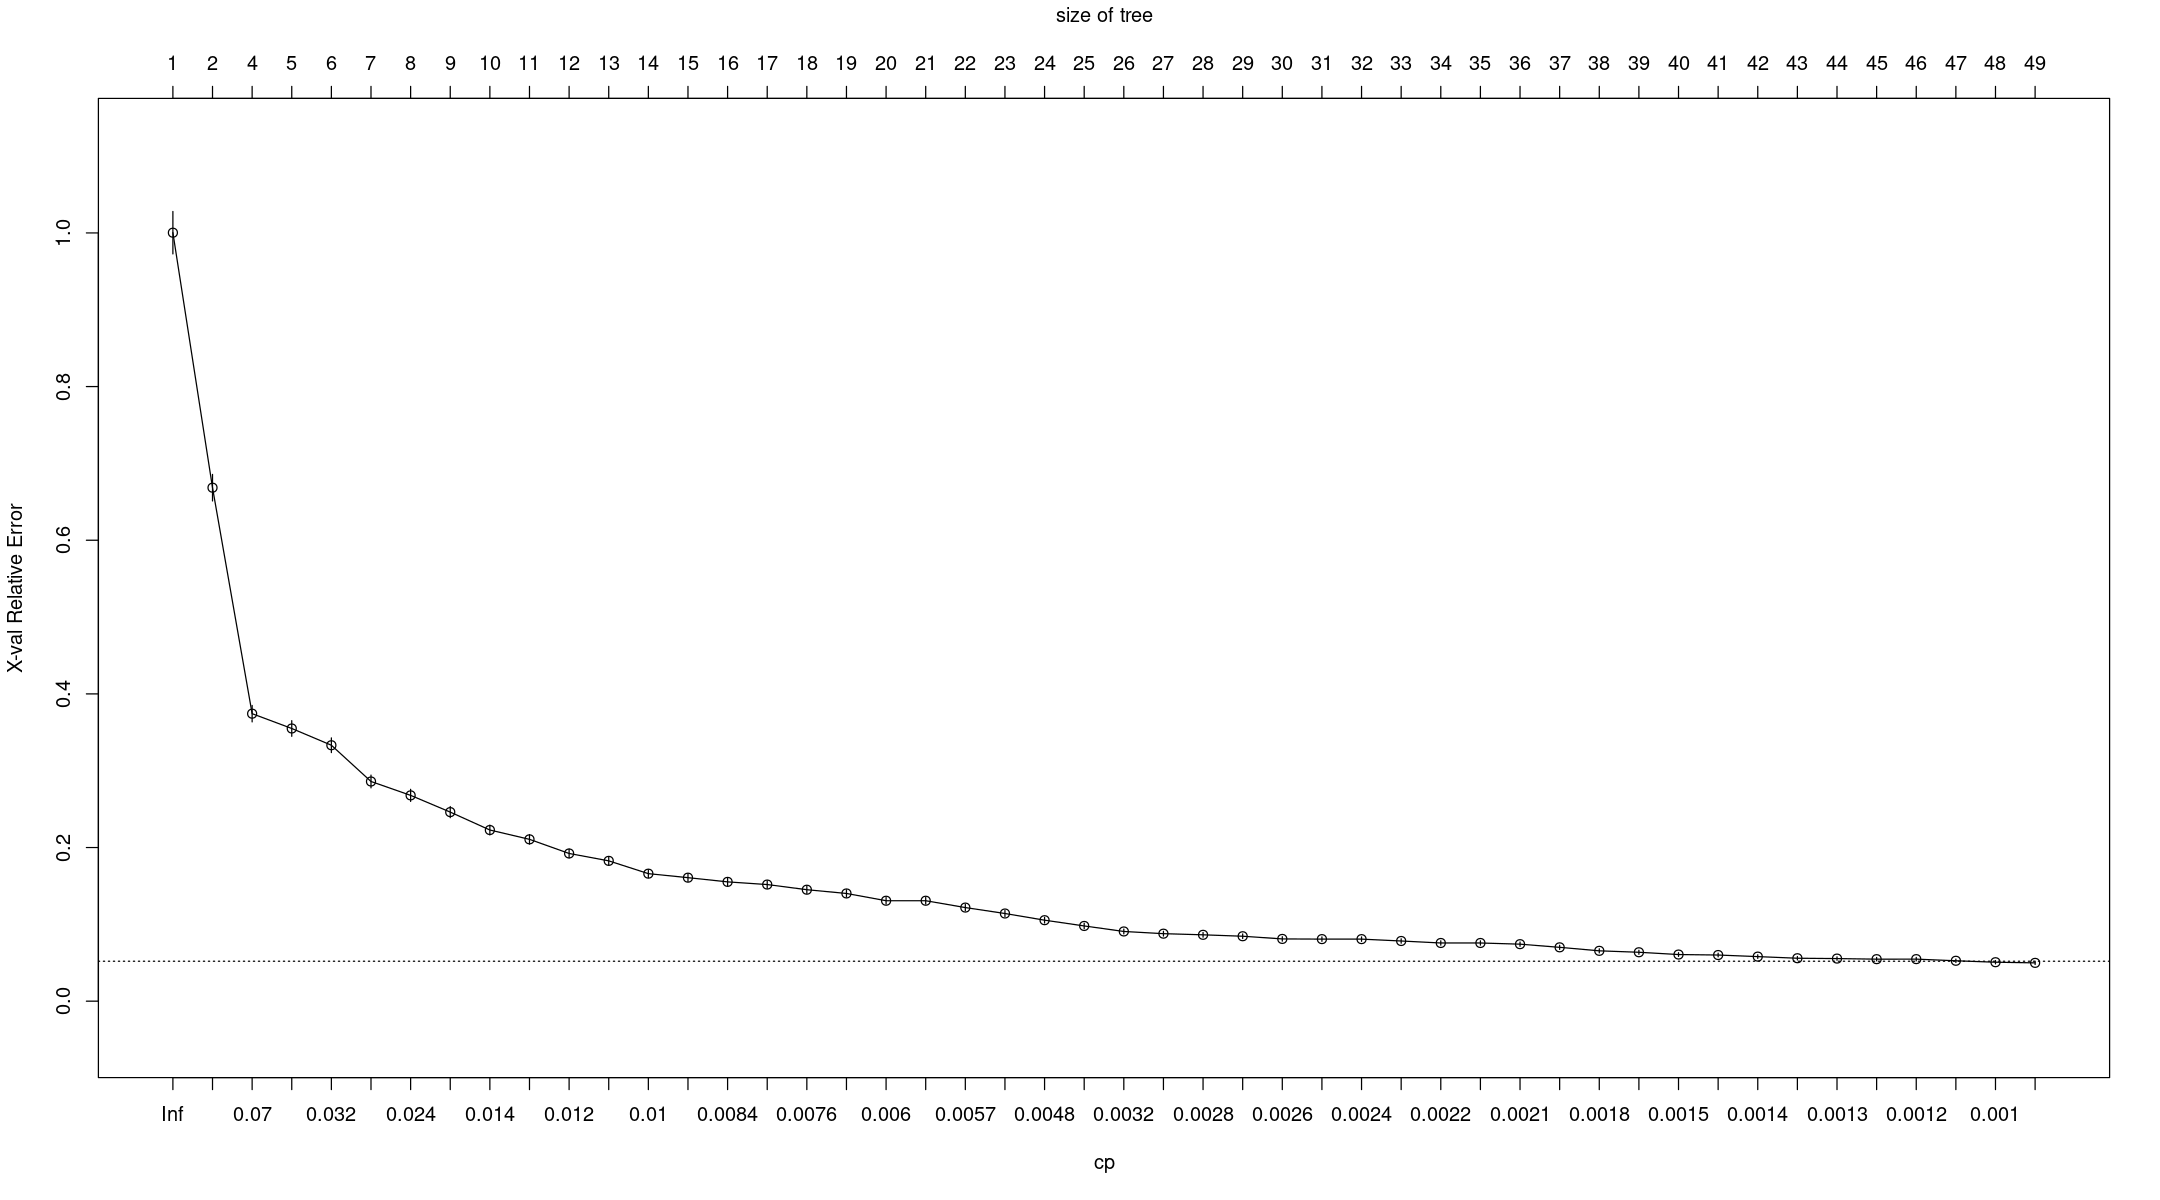

In [51]:
#Cross valiation, 10 folds
xmat <- xpred.rpart(tree.reg, xval=5) 

# Cross-validation error by CP value
tic("Tuning CART")
CVerr <- apply((xmat - trainDat$LCO2_emit)^2, 2, sum)
t_CVCART <- toc()
plotcp(tree.reg)

In [52]:
cp_opt <- as.numeric(attributes(which.min(CVerr))$names)
cat('Optimal cp: ', round(cp_opt, 5),"\n")

tic("CART")

t_CART <- toc()

Optimal cp:  0.00101 
CART: 0.001 sec elapsed


The output for the controlparameter, cp, is almost as small as the original input for the cost, of $0.001$. That the optimal parameter is so close to the original, means that the rpart library indicates that the tree should not be pruned. However, for the sake of interpretation, we need a reduced tree. Lookin at the cp-plot plot above, we see that the <em>X-val relative error</em> stabilizes at around a cost of $0.0032$, which results in a tree of size $26$.

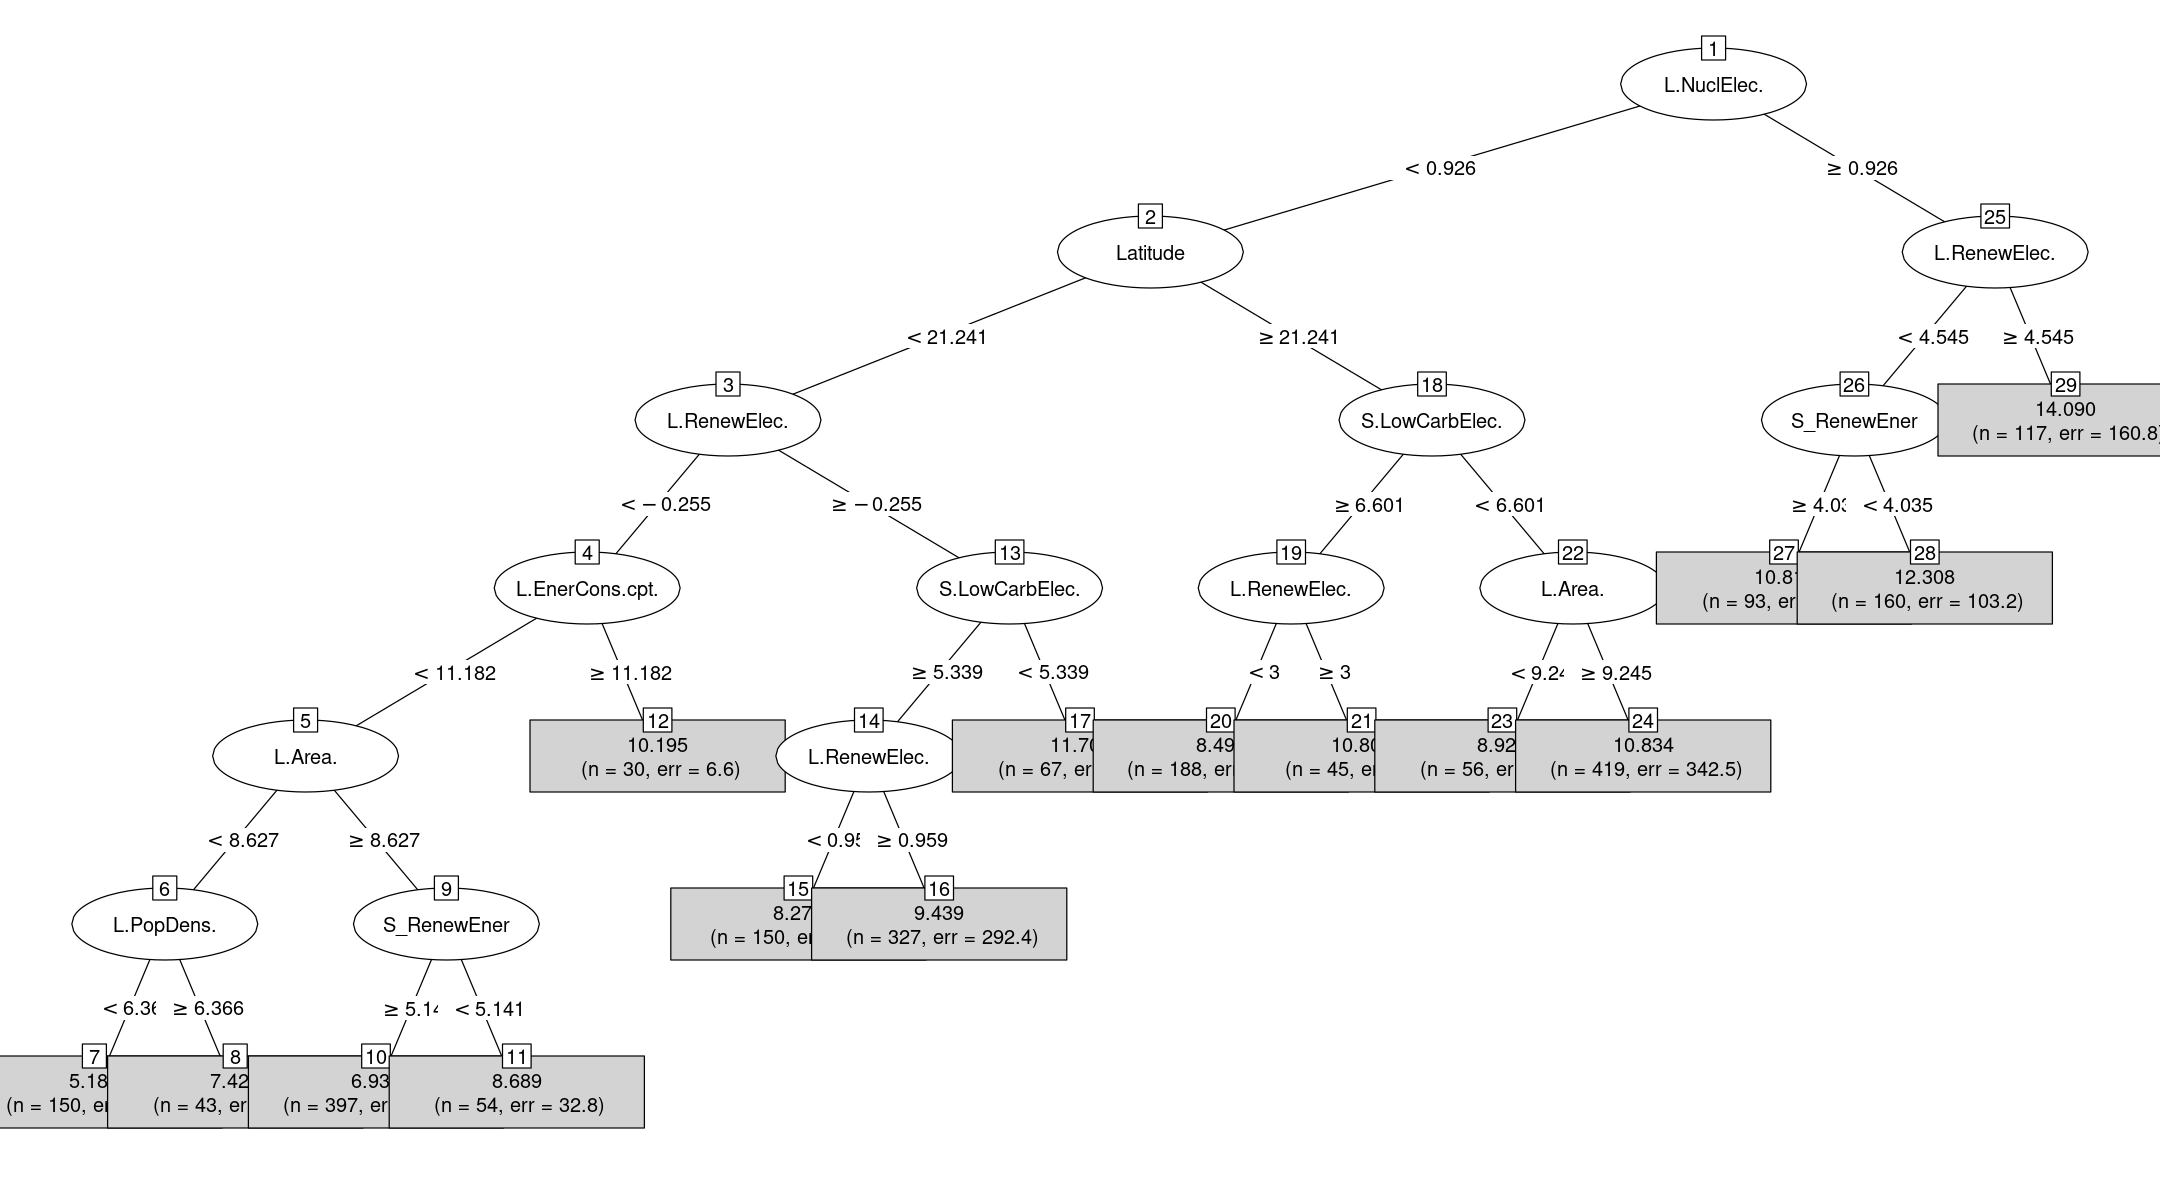

In [53]:
tree.reg=rpart(LCO2_emit~.,data=trainDat,control=0.0032)
plot(as.party(tree.reg), type="simple")

The tree isemore interpretable now. We can clearly see that the variable <em>LNuclElec</em> is really important for the prediction of the <em>LCO2_emit</em> variable, as it is the first variable to be divided. If we look back at the correlation plot, we can see that those variables are strongly positively correlated so that is not surprising. Furthermore the variables <em>L(RenewElec), S(LowCarbElec)</em> and <em>L(Area)</em> are also important to the decision tree. Suprisingly, the importance of the variable <em>S_RenewEner</em> is not that important if <em>LNuclElec</em> is low, whereas if it is high, the <em>S_RenewEner</em> is one of the msot important ones. Mayby that has something to do with the fact that countries having high high levels nuclear enery also has resources to invest in renewable energy. It si still suprising though, as  <em>S_RenewEner</em> was one of the more prominent on from the correlation analysis.

We will now look at its residuals to see how they are distributed.

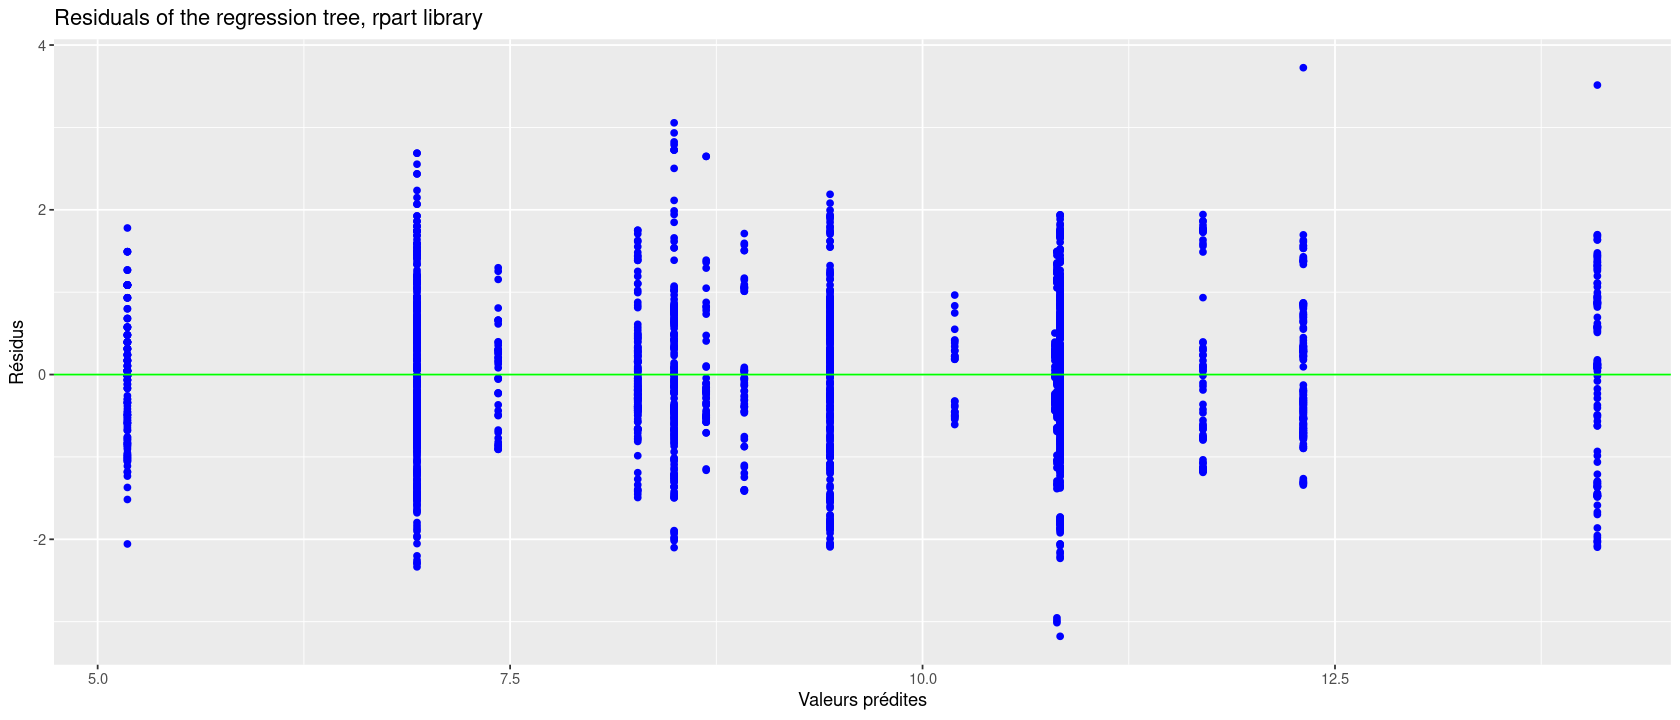

In [54]:
fit.tree.rpart=predict(tree.reg,newdata=trainDat)
res.tree.rpart=fit.tree.rpart-trainDat$LCO2_emit
options(repr.plot.width = 14, repr.plot.height = 6)
gplot.res(fit.tree.rpart,res.tree.rpart,"Residuals of the regression tree, rpart library")

On the graphs of residuals, we can see the differents leaves of the tree represented as vertical lines. Because of its large vertical spatiality, it should have high MSE and therefore it should not bee the best predictions we had for the now.

We repeat this procedure for the `caret` package as we saw in the TP that this differed much from the `rpart` library.

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


[1] "Valeur de cp retenue = 0.00598423001806843"

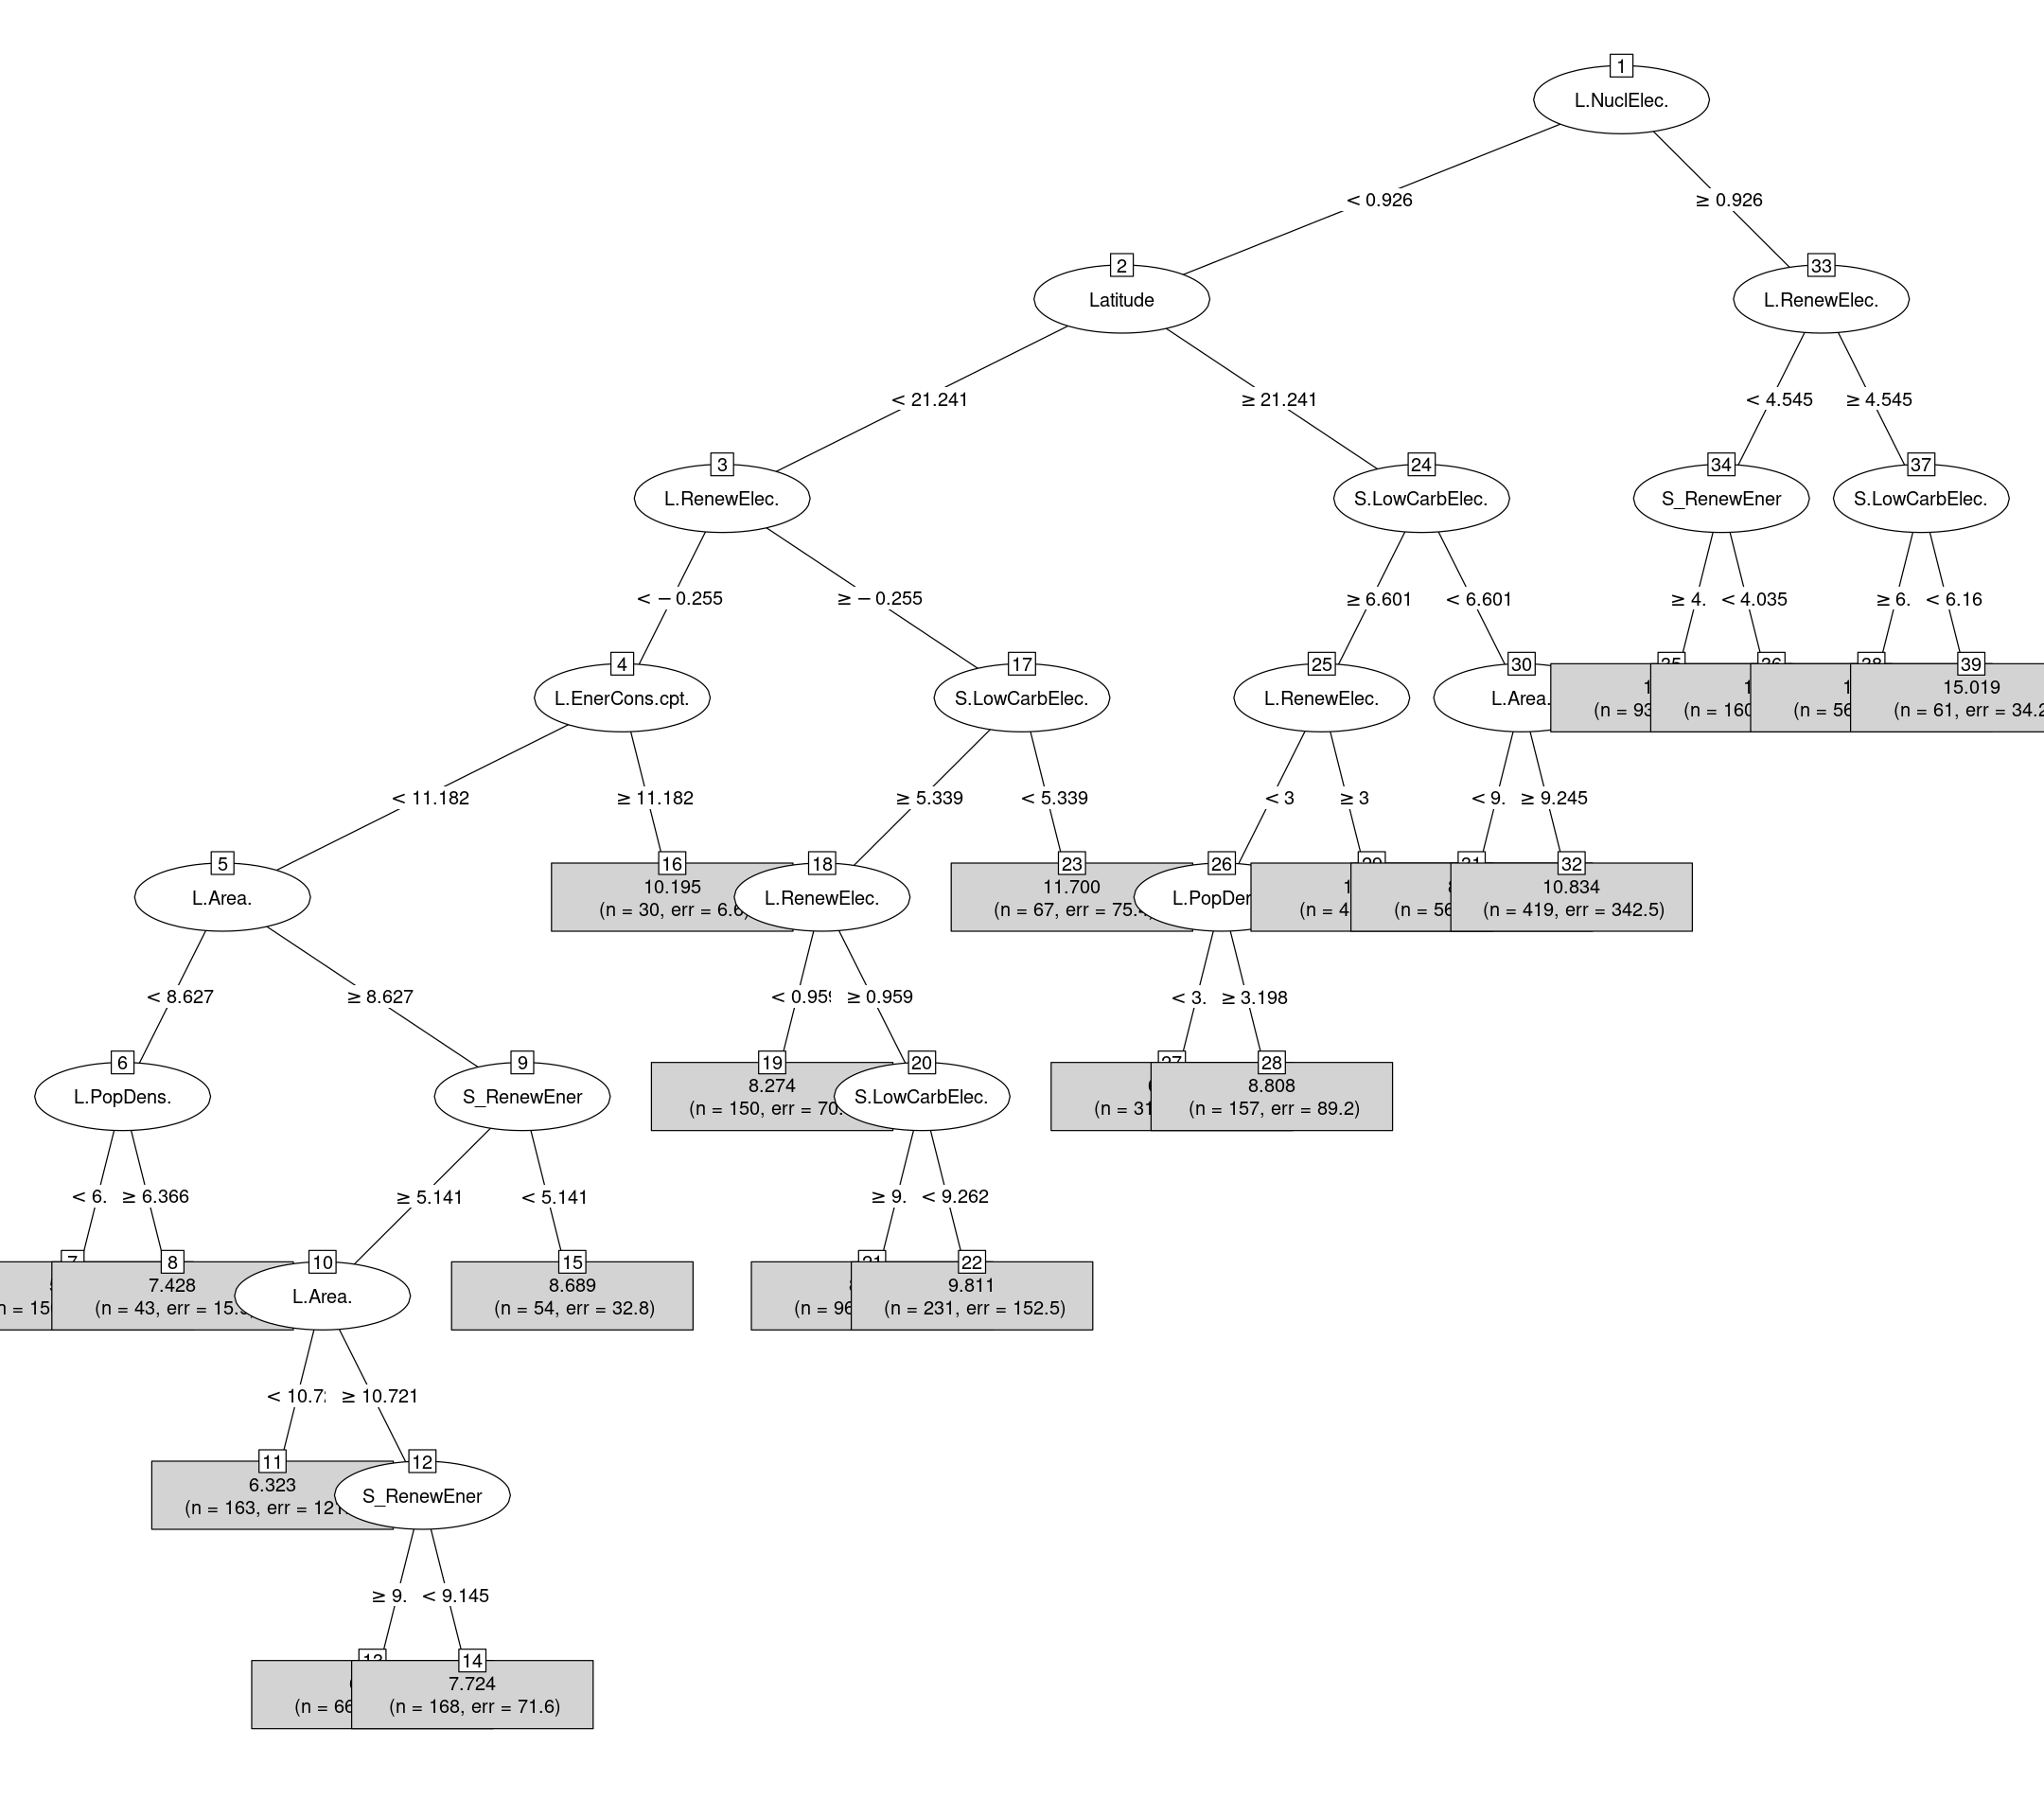

In [55]:
options(repr.plot.width = 18, repr.plot.height = 16)

ctrl <- trainControl(method = "cv", number = 10)
treecaret <- train(LCO2_emit~., data=trainDat, method = "rpart", trControl = ctrl, tuneLength = 20)

paste("Valeur de cp retenue = ", treecaret$bestTune,sep="")

plot(as.party(treecaret$finalModel), type="simple")

The tree is larger than what we used in with the `rpart` library, eventhough the cost is higher. Except for the new leaf added in the caret tree, the trees are almost identical. 

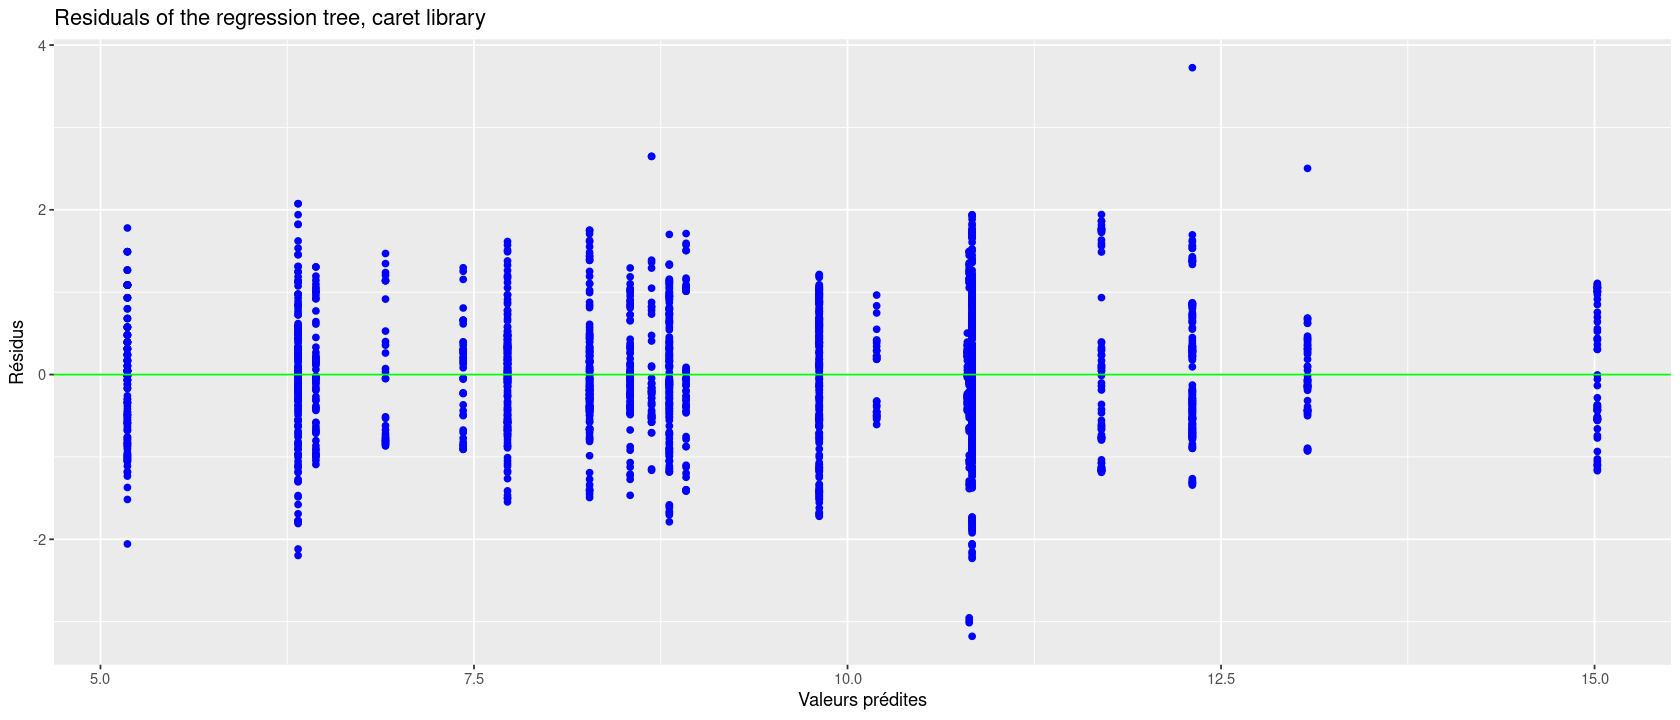

In [56]:
fit.tree.caret=predict(treecaret, newdata=trainDat)
res.tree.caret=fit.tree.caret-trainDat$LCO2_emit
options(repr.plot.width = 14, repr.plot.height = 6)
gplot.res(fit.tree.caret,res.tree.caret,"Residuals of the regression tree, caret library")

The residuals follow the vertical pattern from the residuals of the rpart tree. Here more lines are added due to more leaves being present. This method is not belived to be the best for the prediction either.

### Error and prediction

In [57]:
errTrainCARTrpart = round(mean(res.tree.rpart^2), 4)
errTrainCARTcaret = round(mean(res.tree.caret^2), 4)
sprintf('Error on training sample using rpart: %s', errTrainCARTrpart)
sprintf('Error on training sample using caret: %s', errTrainCARTcaret)


[1] "Error on training sample using rpart: 0.8346"

[1] "Error on training sample using caret: 0.6195"

The MSE on the training set is enourmously large, with the rpart one being worst. Looking at the adjusted $R^2$ on the test set.

In [58]:
# Computation of the prediction
pred.treer.rpart.test = predict(tree.reg, newdata=testDat)
pred.treer.caret.test = predict(treecaret, newdata=testDat)
# Mean squared error in regression
errTestCARTrpart = MSE(pred.treer.rpart.test)
errTestCARTcaret = MSE(pred.treer.caret.test)

 
RCARTrpart = R_squared(pred.treer.rpart.test)
RCARTcaret = R_squared(pred.treer.caret.test)

sprintf('Error on test sample rpart: %s', errTestCARTrpart)
sprintf('Error on test sample caret: %s', errTestCARTcaret)

sprintf('R-sauared on test sample rpart: %s', RCARTrpart)
sprintf('R-squared on test sample caret: %s', RCARTcaret)

[1] "Error on test sample rpart: 1.02027588635248"

[1] "Error on test sample caret: 0.726780572625469"

[1] "R-sauared on test sample rpart: 0.9947"

[1] "R-squared on test sample caret: 0.9962"

Also from the test set, we see that the optimal trees are not good for predicting the <em> LCo2_emit</em>. They do however give good interpretation of variable importance, for the <em> LCO2_emit</em> variable properly. To better predict the <em> LCO2_emit</em> variable through regression trees, we can use the random forest algorithm.

## Random Forest

By adding bagging through a randomization of the variables, where `mtry` of the predictors are used to divide the tree, the CART can be turned into one of the leading methods for prediction accuracy.  We therefore expect this method to perform well. We start off with a naïve implementation before tuning it. 

### Naïve implementation

In [59]:
rf.reg=randomForest(LCO2_emit~., data = trainDat, xtest = testDat[,-c(10)], ytest=testDat$LCO2_emit,
   ntree=500, do.trace=50,importance=TRUE)

cat("Number of values sampled as candidates in each split: ", rf.reg$mtry)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02505     0.44 |  0.02218     0.38 |
 100 |  0.02132     0.38 |  0.02032     0.35 |
 150 |  0.02006     0.35 |  0.01981     0.34 |
 200 |  0.01932     0.34 |  0.01925     0.33 |
 250 |  0.01915     0.34 |  0.01956     0.34 |
 300 |  0.01877     0.33 |  0.01954     0.34 |
 350 |  0.01866     0.33 |  0.01932     0.33 |
 400 |   0.0187     0.33 |  0.01928     0.33 |
 450 |  0.01861     0.33 |   0.0192     0.33 |
 500 |  0.01822     0.32 |  0.01925     0.33 |
Number of values sampled as candidates in each split:  5

The Out-of-bag error is really low, already with 50 trees, which means that the Random Forest algorithm is a good method to predict LCO2_emit with this dataset. We can see that the mean squared error stays low for the test sample which is good. We will try to further improve this method by tuning the parameter `mtry`.

### Tuning

mtry = 2  OOB error = 0.04968493 
Searching left ...
Searching right ...
mtry = 3 	OOB error = 0.03136872 
0.3686473 1e-04 
mtry = 4 	OOB error = 0.02643143 
0.1573952 1e-04 
mtry = 6 	OOB error = 0.02232559 
0.1553393 1e-04 
mtry = 9 	OOB error = 0.02342194 
-0.04910741 1e-04 
Tuning randomForest: 2.667 sec elapsed


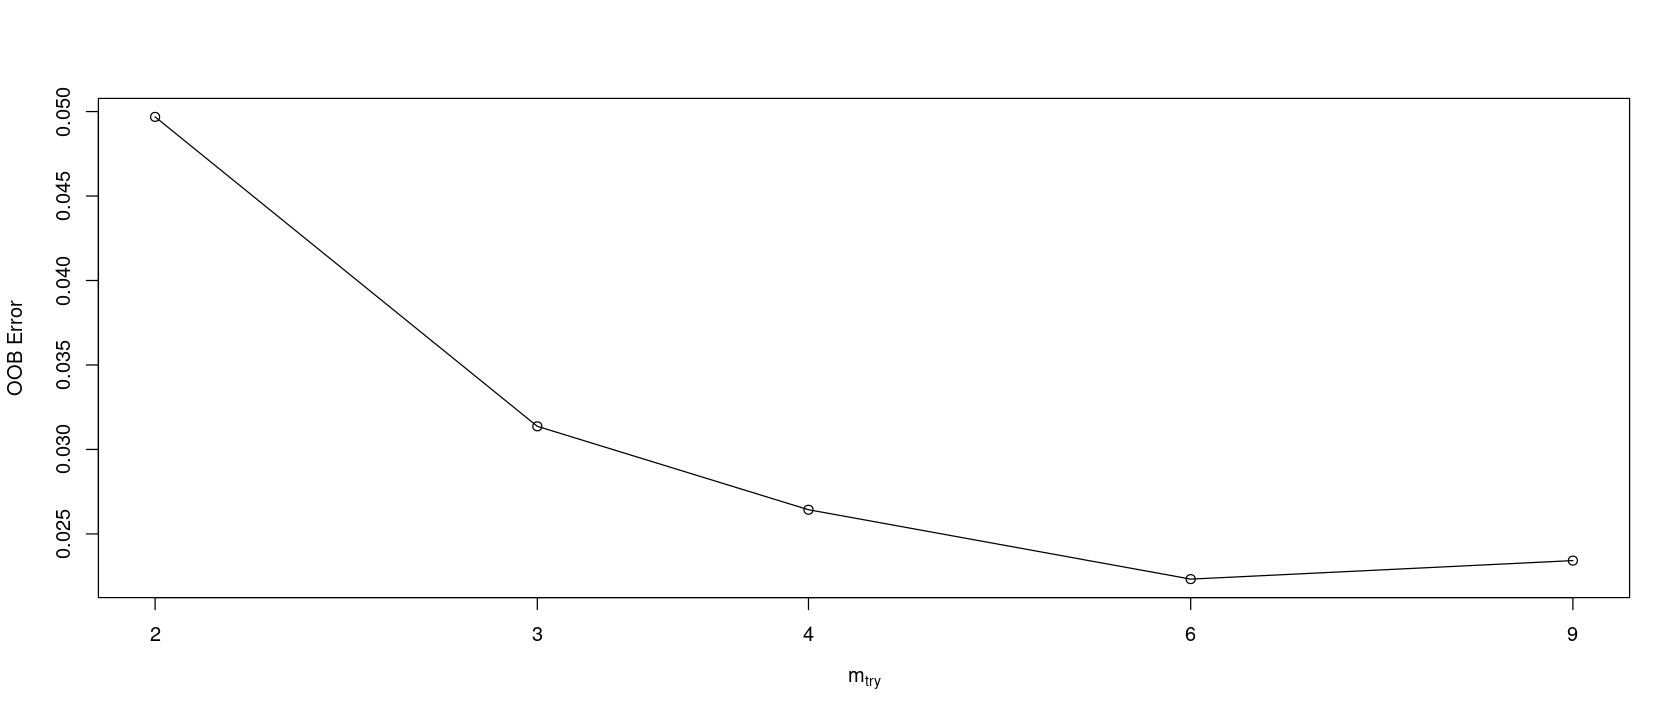

In [60]:
tic("Tuning randomForest")
mtry_mat= tuneRF(trainDat[,-c(10)], trainDat$LCO2_emit, nTreeTry = 500, mtryStart = 2,
                     stepFactor = 1.5, improve = 0.0001, trace=TRUE, plot=TRUE)
t_RFTuning <- toc()

The value of `mtry` giving the lowest out-of-bag error is $mtry=6$. We will therefore us this in the tuned version of the random forest.

In [61]:
mtry_best = mtry_mat[mtry_mat[,2] == min(mtry_mat[,2]), 1] # Finding best value for mtry

tic("Random forest of tuned parameters")
rf.reg.tuned = randomForest(LCO2_emit~., data = trainDat, mtry = mtry_best, xtest = testDat[,-c(10)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)
t_RF <- toc()

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.0236     0.42 |  0.01884     0.32 |
 100 |   0.0196     0.35 |  0.01796     0.31 |
 150 |  0.01864     0.33 |  0.01797     0.31 |
 200 |  0.01845     0.33 |   0.0178     0.31 |
 250 |  0.01799     0.32 |  0.01784     0.31 |
 300 |  0.01786     0.32 |   0.0181     0.31 |
 350 |  0.01788     0.32 |  0.01841     0.32 |
 400 |  0.01762     0.31 |  0.01801     0.31 |
 450 |  0.01764     0.31 |  0.01777     0.31 |
 500 |  0.01743     0.31 |  0.01775     0.31 |
Random forest of tuned parameters: 8.068 sec elapsed


Both the out-of-bag error and the MSE on the test set is slightly lower than for the naïve implementation. Neither the MSE on the out-of-bag or on the test set reduces drastically from $ntree=400$, so it could have reduced usthenumber of trees to $400$. Now we will look at the residuals.

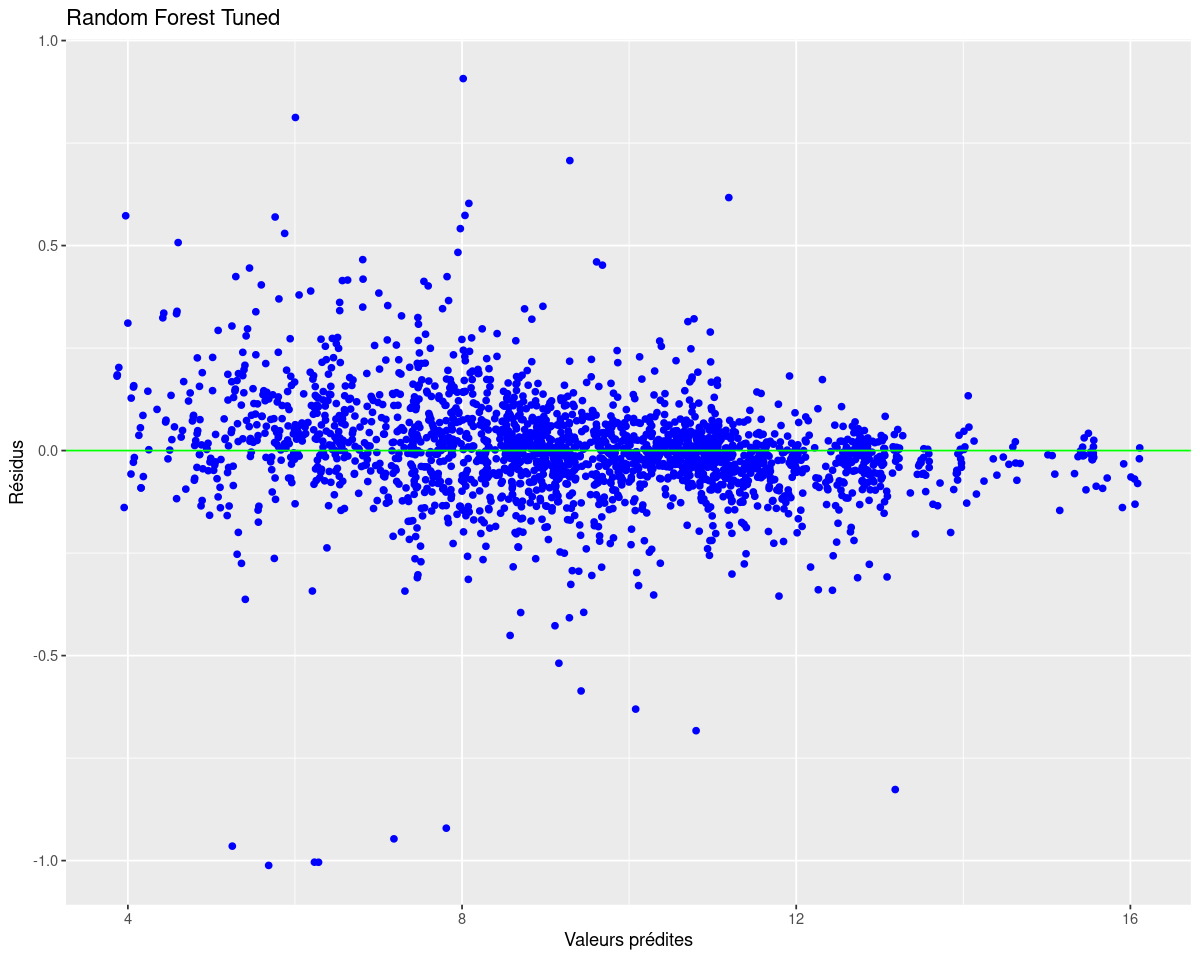

In [62]:
options(repr.plot.width = 10, repr.plot.height = 8)

fit.rfr = rf.reg.tuned$predicted
res.rfr = fit.rfr - trainDat$LCO2_emit

 
gplot.res(fit.rfr,res.rfr,titre="Random Forest Tuned")

We can see with the graph that most of the residuals are between -0.5 and 0.5 which means that the random forest model seems to be a good prediction model for our dataset.

### Variable importance

L.Area.      L.PopDens.    L.RenewElec.  S.LowCarbElec.            Year 
          44.92           43.51           41.36           37.70           35.85 
       Latitude     S_RenewEner   L.EnerIntens.       Longitude L.EnerCons.cpt. 
          35.29           29.73           29.21           28.98           27.12 
    L.NuclElec.      L.GDP.cpt.   S.CleFueAcce.     S.ElecAcce.      gdp_growth 
          24.12           21.52           19.17           17.26            9.00

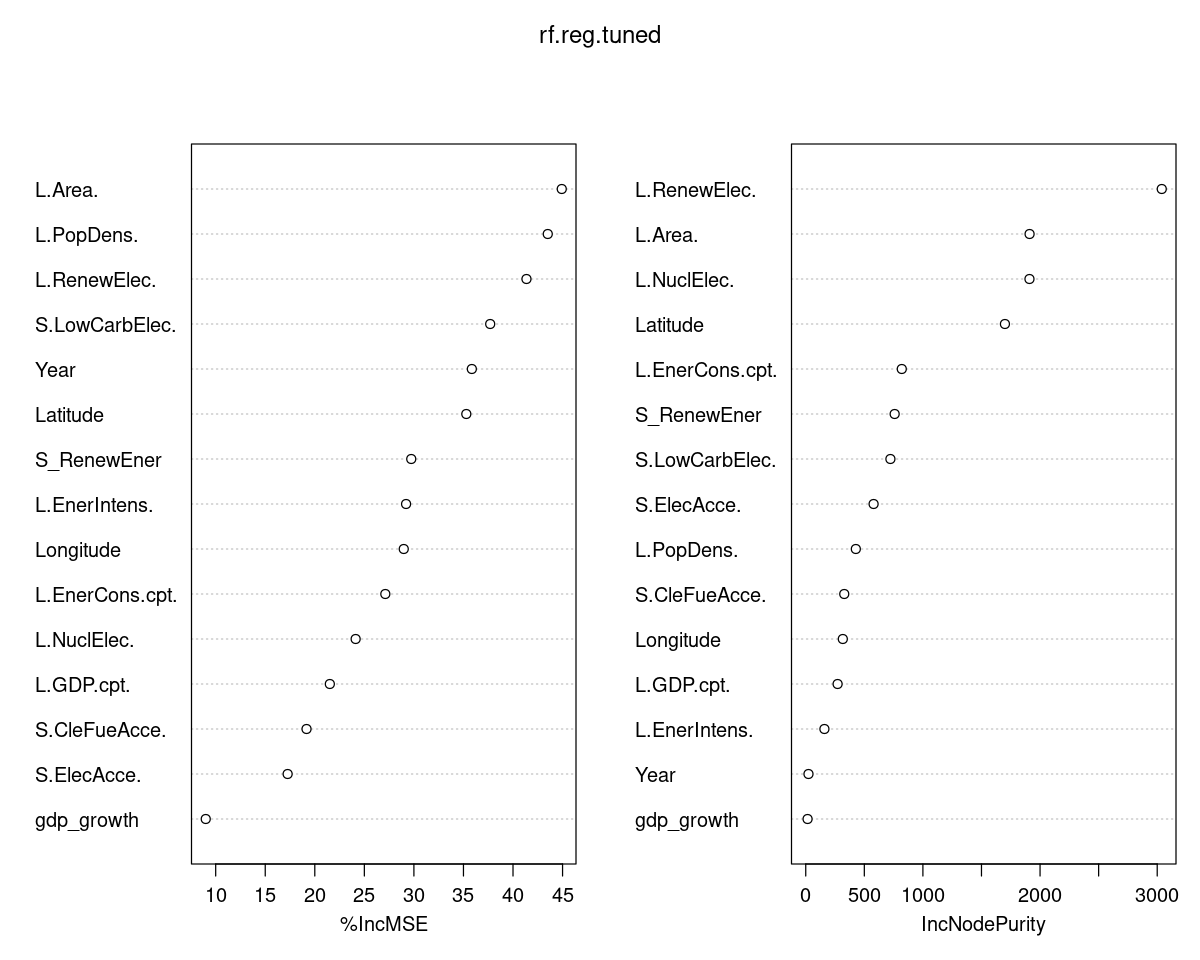

In [63]:
sort(round(importance(rf.reg.tuned), 2)[,1], decreasing=TRUE)
varImpPlot(rf.reg.tuned)

This graphs measure the importance of the different variables for the model. The one on the left evaluates the prediction error increase when the values of the variable are permutated. We can see here that a lot of variable are important with this criteria for the prediction of <em>LCO2_emit</em>, especially <em>L(Area), L(PopDens)</em> and <em>L(RenewElec)</em>. However, when we look back at the correlation plot, we can see they do not completely correespond to the ones most correlated with LCO2_emit variables. Indeed <em>L(PopDens)</em> has a correlation coefficient of around zero, while increases of more than $40\%$ the MSE in case of permutation of its values.
  
The plot to the right evaluates the increase of purity of the nodes. Here, <em>L.RenewElec</em> has the biggest increase of purity of nodes so it means that it is the most important variable according to this criteria for the prediction. This is consistent with this variable being one of the top variables of the optimal trees from CART. The variable <em>S_RenewEner</em> is ranked just above the average in both cases, even tough it has quite negative correalaton coefficient.

### Error and prediction

In [64]:
errTrainRF = round(mean(res.rfr^2),4)
cat('Error on train sample: ', errTrainRF)

Error on train sample:  0.0174

In [65]:
pred.rfr = rf.reg.tuned$test$predicted
# Mean squared error

errTestRF = MSE(pred.rfr)
RRF = R_squared(pred.rfr)
sprintf('Error on test sample: %s', errTestRF)
sprintf('R-squared on test sample: %s', RRF)

[1] "Error on test sample: 0.0177525948912764"

[1] "R-squared on test sample: 0.9999"

The MSE of the training set is the lower than for all the others modelisation methods we saw until now. The adjusted a R-squared is almost perfect, but still just below that of the Gaussian SVM. Still really good for use on this dataset.

## Boosting

In [66]:
tic("Boosting")
boost.reg = gbm(LCO2_emit ~ ., data = trainDat, distribution = "gaussian", n.trees = 6000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.1, verbose = FALSE, n.cores=1)
t_Boost <- toc()

CV: 1 
CV: 2 
CV: 3 
CV: 4 
CV: 5 
CV: 6 
CV: 7 
CV: 8 
CV: 9 
CV: 10 
Boosting: 29.491 sec elapsed


Tuning Boosting: 0.013 sec elapsed


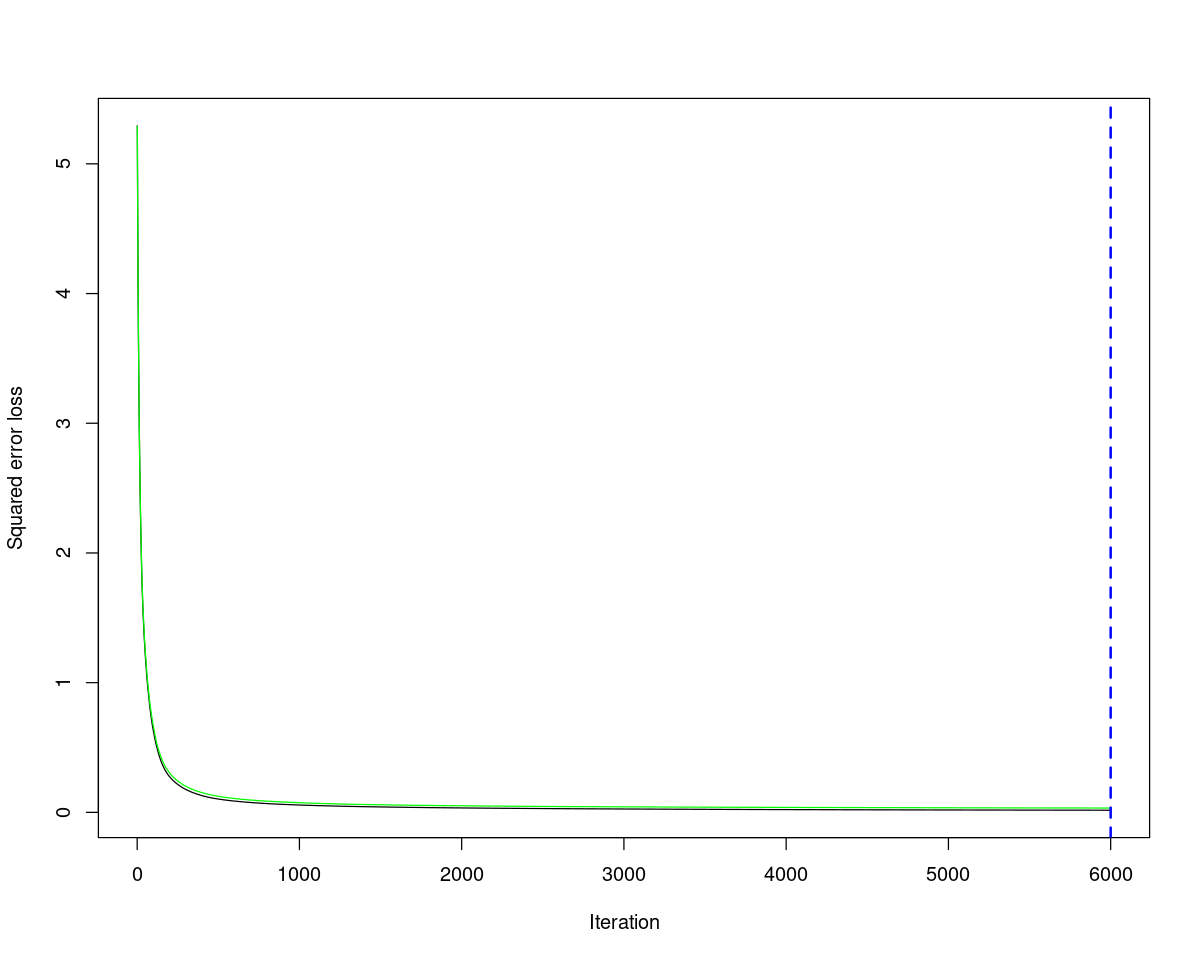

In [67]:
# Optimal number of iterations by cross-validation
tic("Tuning Boosting")
best.iter=gbm.perf(boost.reg, method="cv")
t_BoostTuning <- toc()

In retrospective , we could have observed that the squared error stabilizes at approximately $400$ iteration, so we could have used that, instead of the chosen value by the algorithm which is the maximal number of iterations, $6000$. However, we have chosen to run in the upper region of `ntree`, between $4000$ and $6000$. Let's look at the error on the test set.

[1] "Lowest MSE: 0.0312, with 5942 number of trees"

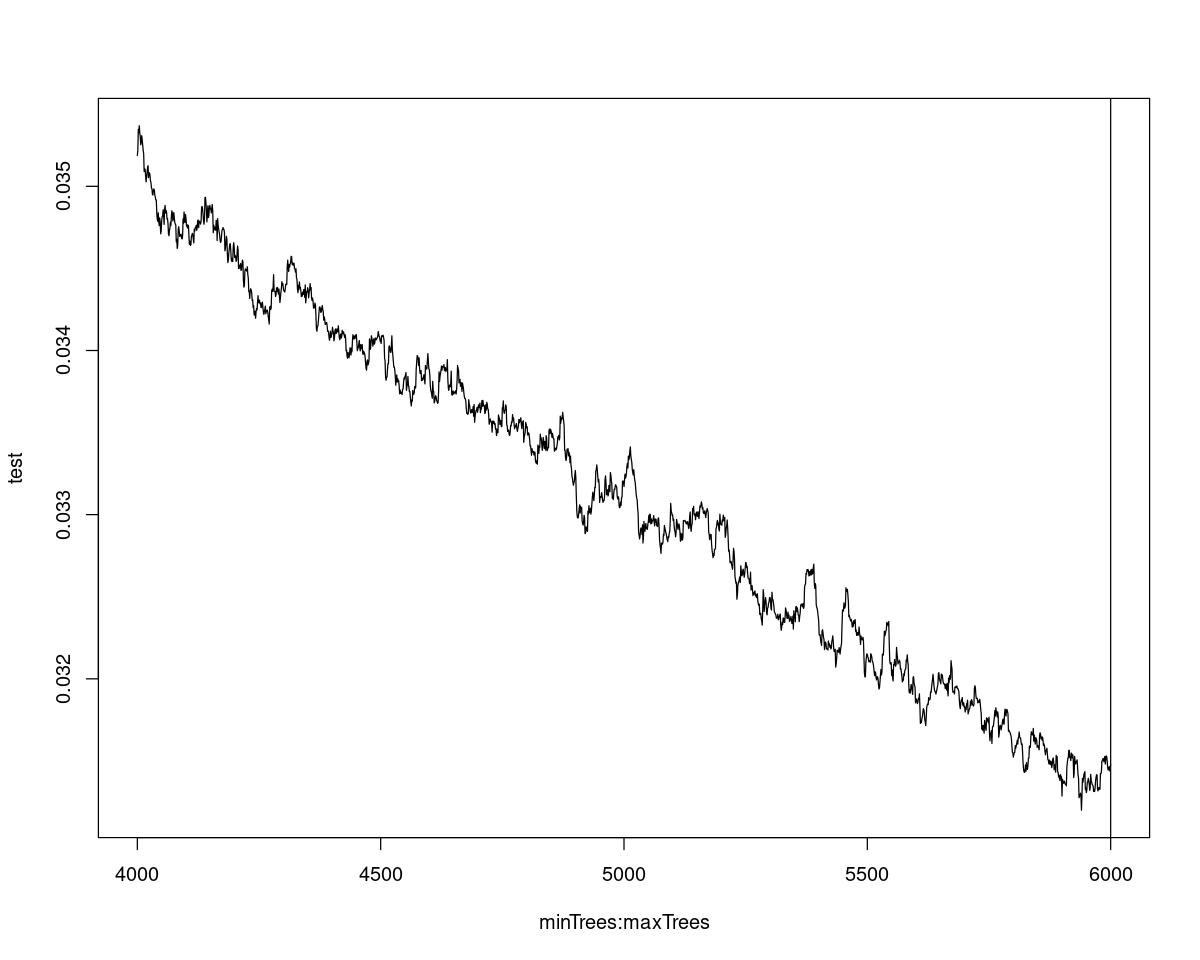

In [68]:
test=numeric()
minTrees = 4000
maxTrees = 6000
for (i in minTrees:maxTrees){
    pred.test = predict(boost.reg, newdata = testDat, n.trees=i)
    err = sum((pred.test-testDat$LCO2_emit)^2)/nrow(testDat)
    test = c(test,err)
    }
plot(minTrees:maxTrees,test,type="l")
abline(v=best.iter)
sprintf('Lowest MSE: %s, with %s number of trees', round(min(test),4), (which.min(test) + minTrees + 1))

It is the maximl number of trees which gives the best result on the test data, and is the MSE is linearly decreasing between $4000-6000$, the decrease is only $0.003$, meaning that a smaller number of trees would not have given so much worse results.

### Error and prediction

In [69]:
errTrainBoost = round(boost.reg$train.error[best.iter], 4)
sprintf('Error on the training sample. %s', errTrainBoost)

[1] "Error on the training sample. 0.0166"

Quite low error on the training sample, comparing to previous methods.

In [70]:
pred.boostr=predict(boost.reg, newdata = testDat, n.trees = best.iter)
#Mean squared error of prediction

errTestBoost = MSE(pred.boostr)
RBoost = R_squared(pred.boostr)
sprintf('Error on test sample: %s', errTestBoost)
sprintf('R-squared on test sample: %s', RBoost)

[1] "Error on test sample: 0.0314763576807754"

[1] "R-squared on test sample: 0.9998"

The test error has more than twice the error on the training set. Is is not the best in this project, but far from the worse. The adjusted $R^2$ is almost equal to one.

## Neural Networks
### Naïve implementation

The library NNET only allows for a single hidden layer, making the "neural networks" implemented in this project, only a single perceptron. Therefore, we do not get as good results as in the Python notebook, where we have used the sklearn library to build a multilayer perceptron, obtaining quite much better results. Here we must have had a large number neurons in the hidden layer to gain the same effect, which would take enormous amonts of computational time. Therefore we for the sake of comprehension, use only a moderate amount of neurons in the variable label `size`.

In [71]:
trainDatNN = as.data.frame(scale(trainDat)) # scaling data
testDatNN = as.data.frame(scale(testDat))

In [72]:
nnet.reg = nnet(LCO2_emit~.,data=trainDatNN, size=5, decay=1, linout=TRUE, maxit=1000) 

summary(nnet.reg)

# weights:  86
initial  value 3415.081368 
iter  10 value 317.302993
iter  20 value 163.713992
iter  30 value 146.133719
iter  40 value 129.670172
iter  50 value 108.819124
iter  60 value 95.329333
iter  70 value 85.827233
iter  80 value 77.520591
iter  90 value 72.016626
iter 100 value 62.872149
iter 110 value 55.765046
iter 120 value 52.171507
iter 130 value 50.607059
iter 140 value 49.586612
iter 150 value 48.800446
iter 160 value 48.070381
iter 170 value 47.342526
iter 180 value 46.606007
iter 190 value 45.677319
iter 200 value 43.649903
iter 210 value 43.115718
iter 220 value 42.595994
iter 230 value 42.166513
iter 240 value 41.888973
iter 250 value 41.745514
iter 260 value 41.641049
iter 270 value 41.606014
iter 280 value 41.550791
iter 290 value 41.528987
iter 300 value 41.519220
iter 310 value 41.518893
iter 320 value 41.518864
final  value 41.518862 
converged


a 15-5-1 network with 86 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.18    0.01    0.03    0.42    0.05   -0.25   -0.18    0.12   -0.07    0.30 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 
  -0.32   -0.64   -0.32   -0.01   -0.69    0.15 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.65   -0.10    0.03    0.29   -0.43   -0.28    0.13   -0.28    0.18    0.00 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 
   0.27    0.38    0.65    0.01   -0.21    0.02 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -0.68    0.06   -0.07    0.15   -0.42   -0.04   -0.21   -0.91   -0.84   -0.19 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 
   0.06    0.05   -0.27   -0.10    0.14   -0.08 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
  -0.07    0.17    0.34   -0.06    0.02   -0.17    0.11   -0.5

Firstly the implementation converged fast, using only a third of the iterations allocated. The decrase in the value parameter, which is the sum of the fitting criterion and the decay term is not too great. We therefore tune the neural network. We implement tune tree times, whereas we take values in an interval around the best parameter of the parameters `size` and `decay`. Tuning the NNet is difficult, as the optimal parameters seems to be random each time.

### Tuning

Tuning Neural Networks - 1: 228.435 sec elapsed


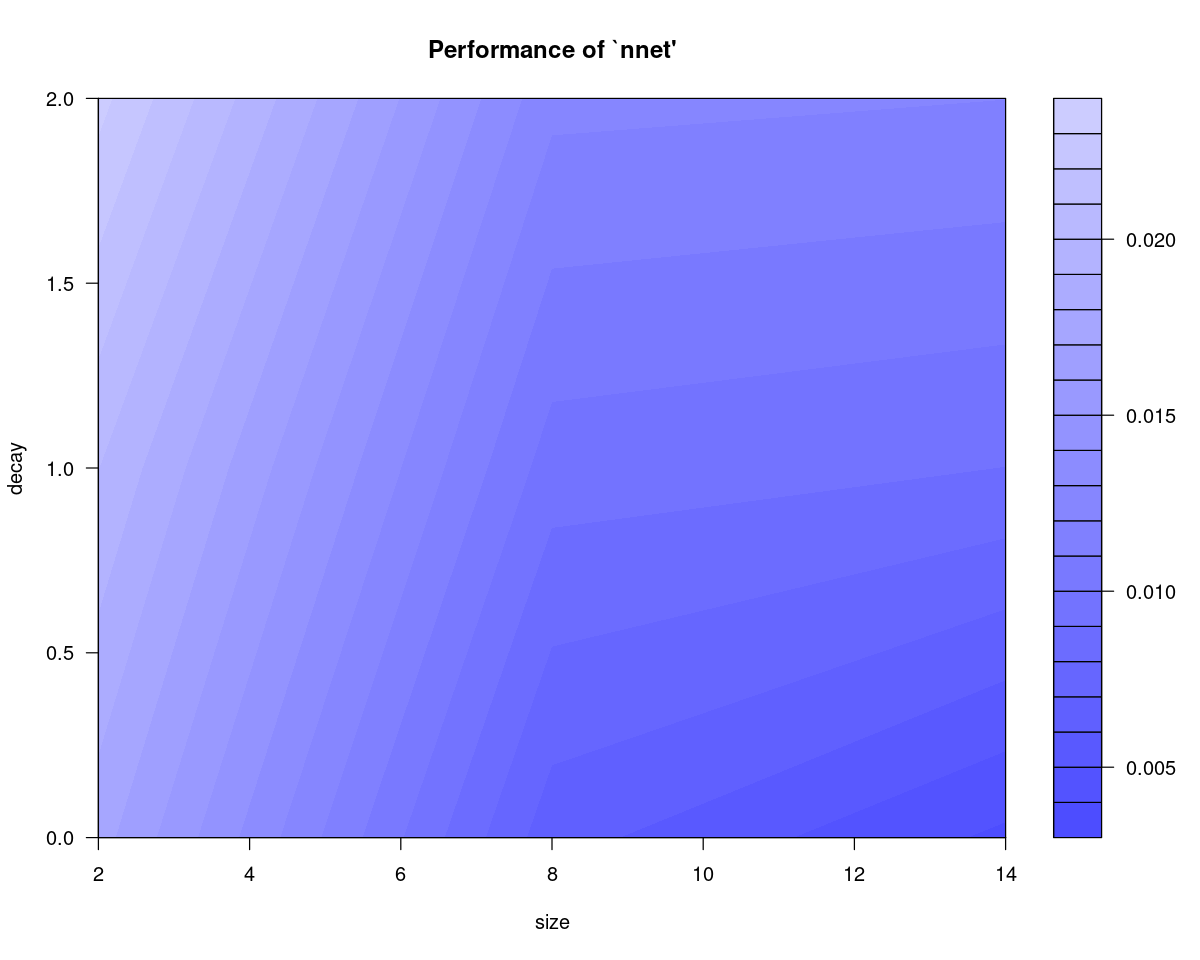

In [73]:
tic("Tuning Neural Networks - 1")
nnet.reg.tune <- tune.nnet(LCO2_emit~.,data=trainDatNN, size = seq(2,14, by=6), decay=c(0,1,2), maxit=200,linout=TRUE)
t_NNTuning1 <- toc()
plot(nnet.reg.tune)

In [74]:
s = nnet.reg.tune$best.parameters$size   # size
d = nnet.reg.tune$best.parameters$decay   # decay
paste(s, d)

[1] "14 0"

Tuning Neural Networks - 2: 457.834 sec elapsed


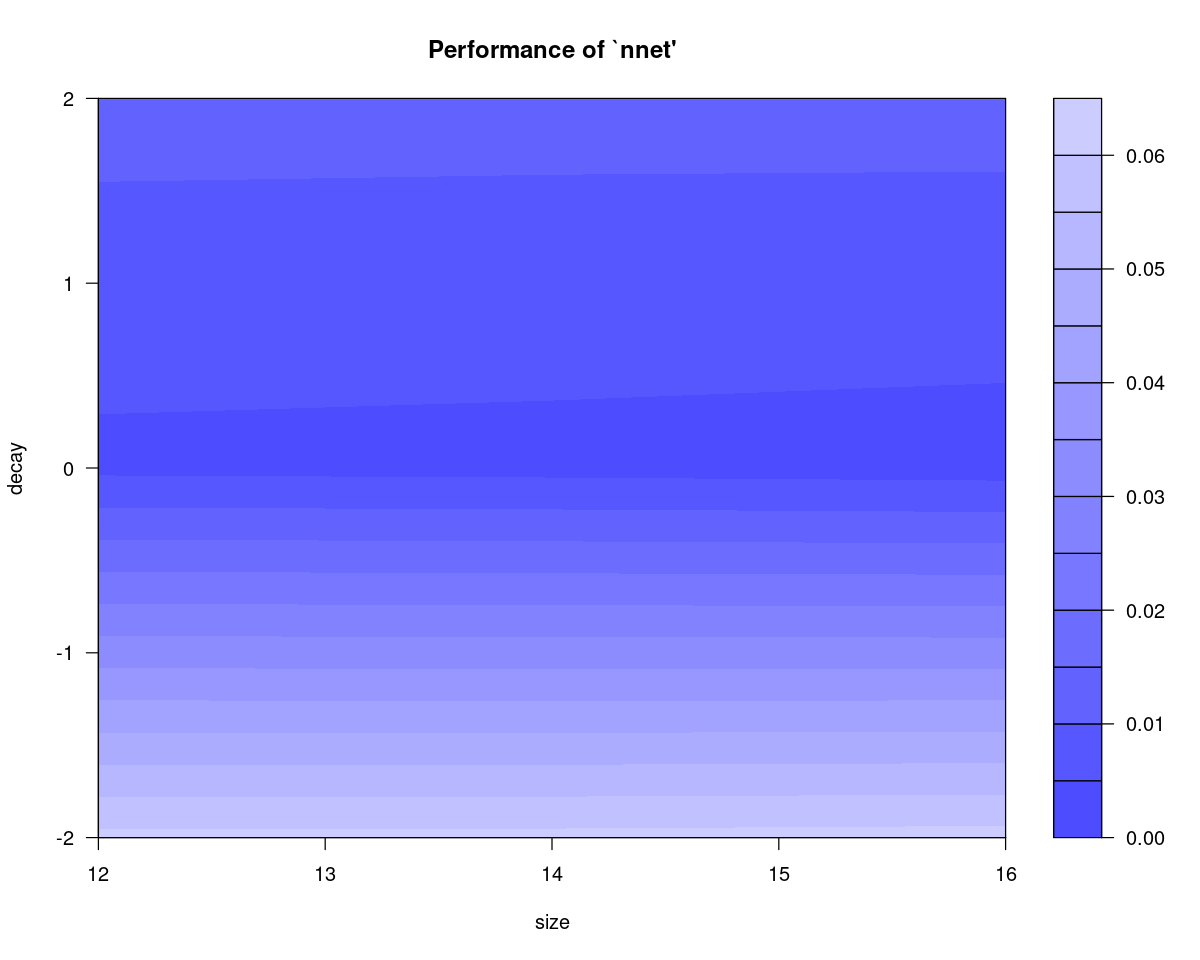

In [75]:
s = seq(nnet.reg.tune$best.parameters$size-2, nnet.reg.tune$best.parameters$size + 2, length.out=3)  
d = seq(nnet.reg.tune$best.parameters$decay-2, nnet.reg.tune$best.parameters$decay + 2, length.out=3)  
tic("Tuning Neural Networks - 2")
nnet.reg.tune2 <- tune.nnet(LCO2_emit~.,data=trainDatNN, size=s, decay=d, maxit=400,linout=TRUE)
t_NNTuning2 <- toc()
plot(nnet.reg.tune2)

Tuning Neural Networks - 3: 743.893 sec elapsed


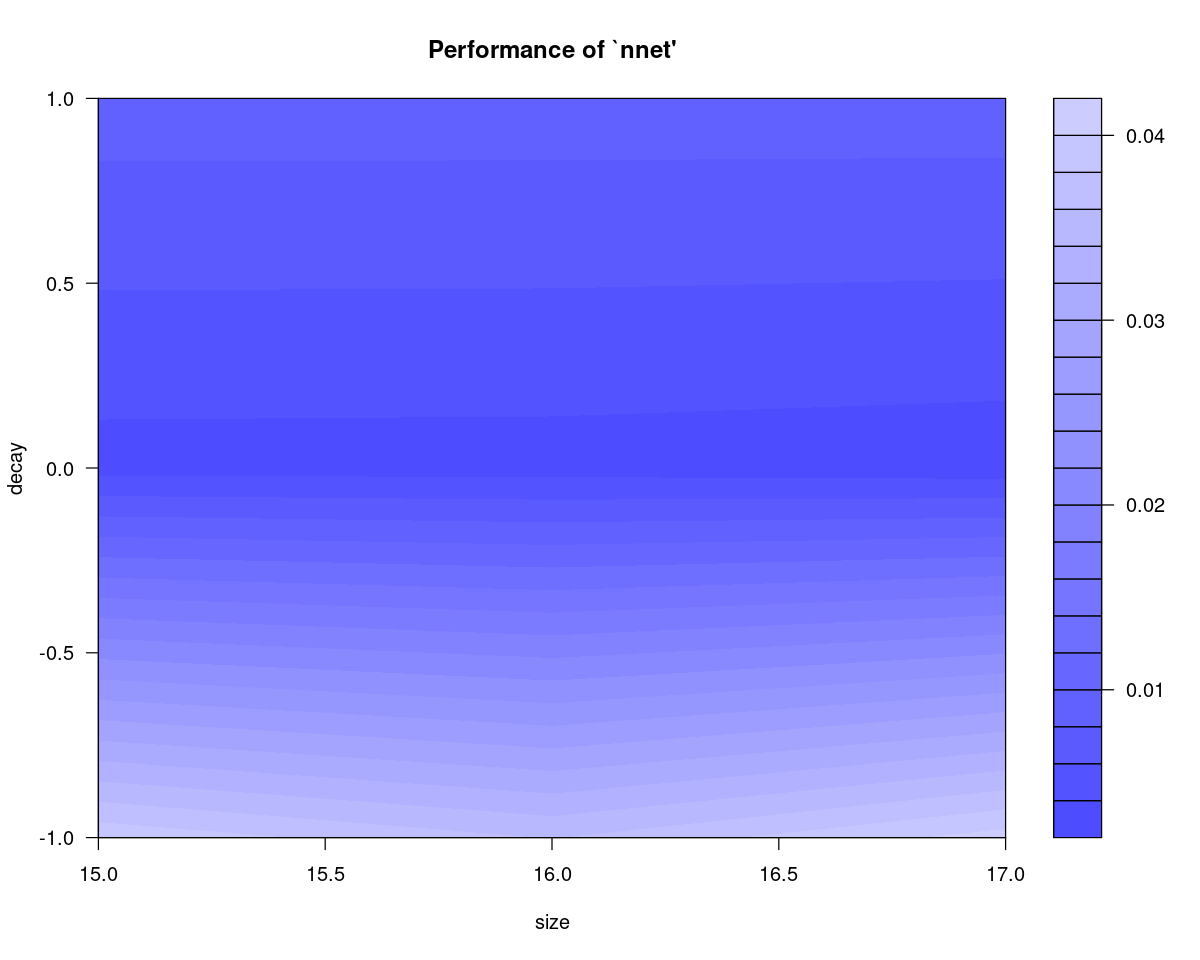

In [76]:
s = seq(nnet.reg.tune2$best.parameters$size-1, nnet.reg.tune2$best.parameters$size + 1, length.out=3)  
d = seq(nnet.reg.tune2$best.parameters$decay-1, nnet.reg.tune2$best.parameters$decay + 1, length.out=3)  
tic("Tuning Neural Networks - 3")
nnet.reg.tune3 <- tune.nnet(LCO2_emit~.,data=trainDatNN, size = s, decay=d, maxit=600,linout=TRUE)
t_NNTuning3 <- toc()
plot(nnet.reg.tune3)

In [77]:
err1 = round(nnet.reg.tune$best.performance,4)
err2 = round(nnet.reg.tune2$best.performance,4)
err3 = round(nnet.reg.tune3$best.performance,4)
paste('Best preformance from tuning:', '1:', err1, '2:', err2, '3:', err3)

[1] "Best preformance from tuning: 1: 0.0038 2: 0.003 3: 0.0029"

We see that the third tuning gives the best performance, making sense since it is the most specified one, as it rely on tuning one and two.

# weights:  290
initial  value 3994.797055 
final  value 2295.000000 
converged
Neural Netowrks tuned: 0.016 sec elapsed


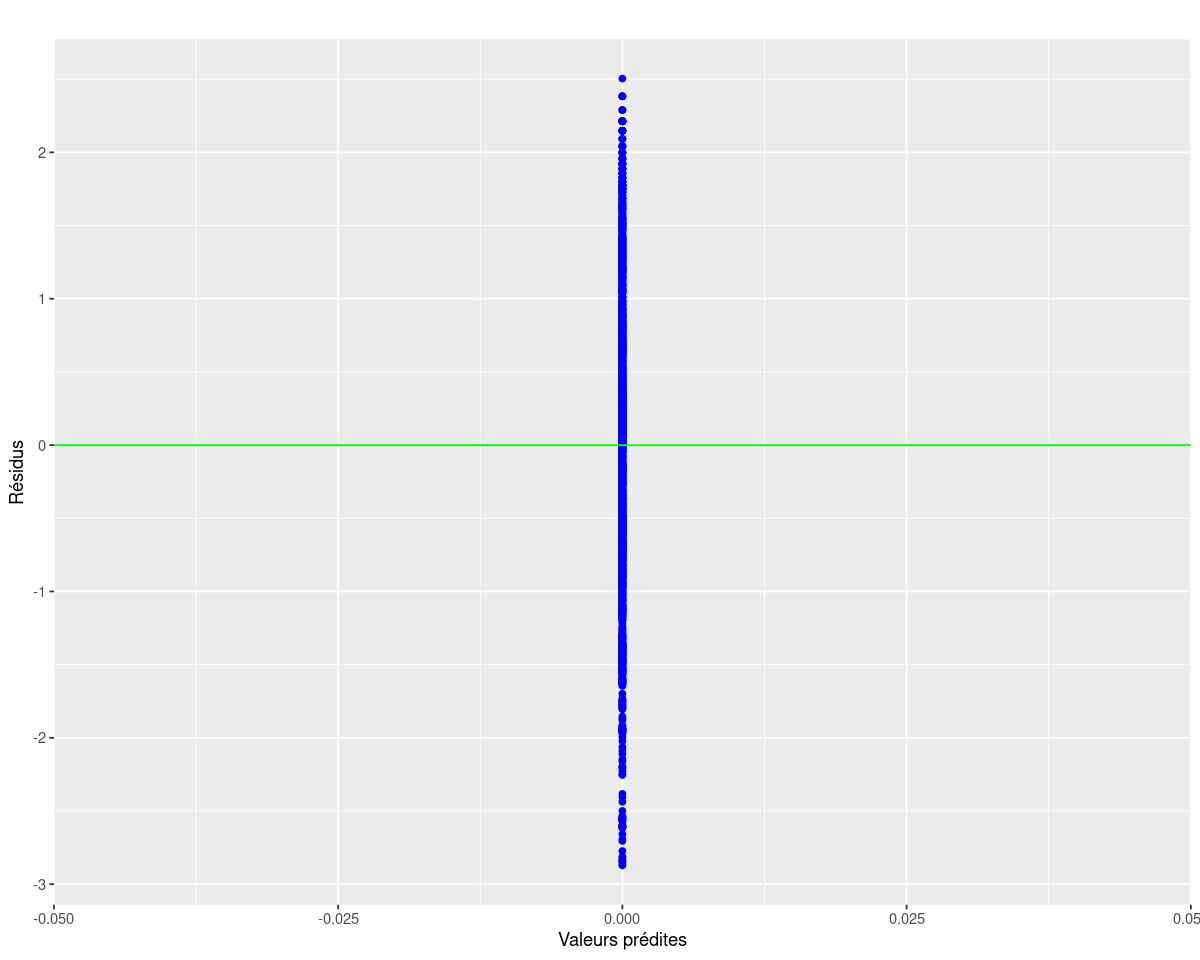

In [78]:
s = nnet.reg.tune3$best.parameters$size   # size
d = nnet.reg.tune3$best.parameters$decay   # decay
numIt =  600 # maxit
tic("Neural Netowrks tuned")
nnet.reg = nnet(LCO2_emit~., data = trainDatNN, size = s, decay = d, linout = FALSE, maxit = numIt)
t_NN <- toc()
# computation and graph of the residuals

fit.nnetr = predict(nnet.reg, data=trainDatNN)
res.nnetr = fit.nnetr - trainDatNN$LCO2_emit

gplot.res(fit.nnetr,res.nnetr,titre="")

The residuals are horrible distributed, only representing the hidden layer. Therefore the results are not bound to be good.

In [79]:
paste(s, d)

[1] "17 0"

### Error and prediction

In [80]:
errTrainNN = round(mean(res.nnetr^2),4)
sprintf('Error on training sample: %s', errTrainNN)

[1] "Error on training sample: 0.9996"

In [81]:
pred.nnetr = predict(nnet.reg, newdata = testDatNN, linout=TRUE)
#  Mean squared error
#errTestNN = round(sum((pred.nnetr-testDat$LCO2_emit)^2)/nrow(testDat), 4)
errTestNN = MSE(pred.nnetr)
RNN = R_squared(pred.nnetr)
sprintf('Error on test sample: %s', errTestNN)
sprintf('R-squared on test sample: %s', RNN)

[1] "Error on test sample: 90.8401629706734"

[1] "R-squared on test sample: 0.5304"

Both the error on the training sample and the test sample are the worst in this report. The same goes for the adjusted $R^2$. A higher number of neurons in the hidden layer should have given a better results.

## Comparisson of methods
### Error on the training sample

In [82]:
print("Error on learning sample:")
print("Linear regression: ")
paste(" - Linear model without selection:", errTrainLin)
paste(" - Ridge without selection:", errTrainLinRidge)
paste(" - LASSO with lambda.min:", errTrainLinLassoMin)
paste(" - LASSO with lambda.1se:", errTrainLinLasso1se)
paste(" - Linear model with variable slection: S_RenewEner:", errTrainLinVS)

print("SVM: ")
paste(" - Gaussian kernel: ", errTrainSVMGaussian)
paste(" - Linear kernel: ", errTrainSVMLinear)

print("CART: ")
paste("Tuned model - rpart: ", errTrainCARTrpart)
paste("Tuned model - caret: ", errTrainCARTcaret)

print("Random Forest")
paste("Tuned model: ", errTrainRF)

print("Boosting")
paste("Tuned model: ", errTrainBoost)

print("Neural Network")
paste("Tuned mode: ", errTrainNN)

[1] "Error on learning sample:"
[1] "Linear regression: "


[1] " - Linear model without selection: 0.0991"

[1] " - Ridge without selection: 0.1607"

[1] " - LASSO with lambda.min: 0.0994"

[1] " - LASSO with lambda.1se: 0.1034"

[1] " - Linear model with variable slection: S_RenewEner: 4.6586"

[1] "SVM: "


[1] " - Gaussian kernel:  0.023"

[1] " - Linear kernel:  0.1017"

[1] "CART: "


[1] "Tuned model - rpart:  0.8346"

[1] "Tuned model - caret:  0.6195"

[1] "Random Forest"


[1] "Tuned model:  0.0174"

[1] "Boosting"


[1] "Tuned model:  0.0166"

[1] "Neural Network"


[1] "Tuned mode:  0.9996"

Looking at the training sample, we would say that the CART modelisation using caret library have the best prediction but let's look at the test sample.

### Error on the test sample

In [104]:
print("Error on test sample:")
print("Linear regression: ")
paste(" - Linear model without selection:", round(errTestLin,4))
paste(" - Ridge without selection:", round(errTestLinRidge,4))
paste(" - LASSO with lambda.min:", round(errTestLinLassoMin ,4))
paste(" - LASSO with lambda.1se:", round(errTestLinLasso1se, 4))
paste(" - Linear model with variable slection: S_RenewEner:", round(errTestLinVS,4))

print("SVM: ")
paste(" - Gaussian kernel: ", round(errTestSVMGaussian,4))
paste(" - Linear kernel: ", round(errTestSVMLinear,4))

print("CART: ")
paste("Tuned model - rpart: ", round(errTestCARTrpart,4))
paste("Tuned model - caret: ", round(errTestCARTcaret,4))

print("Random Forest")
paste("Tuned model: ", round(errTestRF,4))

print("Boosting")
paste("Tuned model: ", round(errTestBoost,4))

print("Neural Network")
paste("Tuned mode: ", round(errTestNN,4))

[1] "Error on test sample:"
[1] "Linear regression: "


[1] " - Linear model without selection: 0.0998"

[1] " - Ridge without selection: 0.1683"

[1] " - LASSO with lambda.min: 0.1006"

[1] " - LASSO with lambda.1se: 0.1062"

[1] " - Linear model with variable slection: S_RenewEner: 4.7308"

[1] "SVM: "


[1] " - Gaussian kernel:  0.0511"

[1] " - Linear kernel:  0.1044"

[1] "CART: "


[1] "Tuned model - rpart:  1.0203"

[1] "Tuned model - caret:  0.7268"

[1] "Random Forest"


[1] "Tuned model:  0.0178"

[1] "Boosting"


[1] "Tuned model:  0.0315"

[1] "Neural Network"


[1] "Tuned mode:  90.8402"

In [84]:
print("R-squared on test sample:")
print("Linear regression: ")
paste(" - Linear model without selection:", RLin)
paste(" - Ridge without selection:", RLinRidge)
paste(" - LASSO with lambda.min:", RLinLassoMin)
paste(" - LASSO with lambda.1se:", RLinLasso1se)
paste(" - Linear model with variable slection: S_RenewEner:", RLinVS)

print("SVM: ")
paste(" - Gaussian kernel: ", RSVMGaussian)
paste(" - Linear kernel: ", RSVMLin)

print("CART: ")
paste("Tuned model - rpart: ",RCARTrpart)
paste("Tuned model - caret: ", RCARTcaret)

print("Random Forest")
paste("Tuned model: ", RRF)

print("Boosting")
paste("Tuned model: ", RBoost)

print("Neural Network")
paste("Tuned mode: ", RNN)

[1] "R-squared on test sample:"
[1] "Linear regression: "


[1] " - Linear model without selection: 0.9995"

[1] " - Ridge without selection: 0.9991"

[1] " - LASSO with lambda.min: 0.9995"

[1] " - LASSO with lambda.1se: 0.9995"

[1] " - Linear model with variable slection: S_RenewEner: 0.9755"

[1] "SVM: "


[1] " - Gaussian kernel:  0.9997"

[1] " - Linear kernel:  0.9995"

[1] "CART: "


[1] "Tuned model - rpart:  0.9947"

[1] "Tuned model - caret:  0.9962"

[1] "Random Forest"


[1] "Tuned model:  0.9999"

[1] "Boosting"


[1] "Tuned model:  0.9998"

[1] "Neural Network"


[1] "Tuned mode:  0.5304"

For the prediction of the variable CO2 emission, the most effective method seems to be the Random Forest. On the other hand, we can see that the previous chosen model (CART with caret library) is one of the less effective one. Indeed, this method is not robust. Since we deleted the variable "L(FossElec)" ,strongly correlated with the one we wanted to predict, it is not surprising that the linear regression is less effective than the Random Forest algorithm. If we would have kept it, a simple linear regression would have be sufficient.

### Time consumption
To proper measure the time consumption of the methods, we should have benchmarked them, running them a high number of times and taking the mean. As this is timeconsuming and demanding, we restricted us to only one time per run through the notebook. This does therefore not cover the randomness of the calculation time, but it does point to which method are capable of using prominently less time than others. It also seems to be an error in this last run, as all times seem to be approximately $10$ times what they have for other runs. 

In [85]:
print("Runtime for each method, with tuning")
print("Linear regression: ")
paste(" - Linear model without selection:", t_Lin$toc, "s")
paste(" - Ridge without selection:", t_Ridge$toc + t_CVRidge$toc, "s")
paste(" - LASSO with lambda.min:", t_Lasso$toc + t_CVLasso$toc, "s")
paste(" - LASSO with lambda.1se:", t_Lasso$toc + t_CVLasso$toc, "s")
paste(" - Linear model with variable slection: S_RenewEner:", t_LinVS$toc, "s")

print("SVM: ")
paste(" - Gaussian kernel: ", t_RSVMTuning1$toc + t_RSVMTuning2$toc + t_RSVM$toc, "s")
paste(" - Linear kernel: ", t_LSVMTuning$toc + t_LSVM$toc, "s")

print("CART: ")
paste("Tuned model: ", t_CVCART$toc + t_CART$toc, "s")

print("Random Forest")
paste("Tuned model: ", t_RFTuning$toc + t_RF$toc, "s")

print("Boosting")
paste("Tuned model: ", t_Boost$toc + t_BoostTuning$toc, "s")

print("Neural Network")
paste("Tuned mode: ", t_NNTuning1$toc + t_NNTuning2$toc + t_NNTuning3$toc + t_NN$toc, "s")

[1] "Runtime for each method, with tuning"
[1] "Linear regression: "


[1] " - Linear model without selection: 595.481 s"

[1] " - Ridge without selection: 1193.009 s"

[1] " - LASSO with lambda.min: 1194.377 s"

[1] " - LASSO with lambda.1se: 1194.377 s"

[1] " - Linear model with variable slection: S_RenewEner: 595.856 s"

[1] "SVM: "


[1] " - Gaussian kernel:  2701.282 s"

[1] " - Linear kernel:  2514.291 s"

[1] "CART: "


[1] "Tuned model:  2526.332 s"

[1] "Random Forest"


[1] "Tuned model:  2559.898 s"

[1] "Boosting"


[1] "Tuned model:  2628.147 s"

[1] "Neural Network"


[1] "Tuned mode:  9319.634 s"

We can see that even if the prediction using random forest is the best, it is not the one which has the highest time consumption, which is a good news for our prediction. The random forest is therefore the one performin the best overall on our dataset. We will therefore use in the next session, where we will try alternative methods for handling the missing values.

## Different handling of missing data
### Preparing the dataset and first insights into it

Start by transforming the variables as for the data with the missing values removed.

In [86]:
globDatNa[, 'LCO2_emit'] <- log(globDatNa[, 'Value_co2_emissions_kt_by_country'])

globDatNa[, 'S_RenewEner'] <- sqrt(globDatNa[, 'Renewable.energy.share.in.the.total.final.energy.consumption....'])

globDatNa[, 'S(ElecAcce)'] <- sqrt(globDatNa[, 'Access.to.electricity....of.population.'])

globDatNa[, 'S(CleFueAcce)'] <- sqrt(globDatNa[, 'Access.to.clean.fuels.for.cooking'])

globDatNa[, 'S_RenewEner'] <- sqrt(globDatNa[, 'Renewable.energy.share.in.the.total.final.energy.consumption....'])

globDatNa[, 'L(FossElec)'] <- log(globDatNa[, 'Electricity.from.fossil.fuels..TWh.']+1e-6)

globDatNa[, 'L(NuclElec)'] <- log(globDatNa[, 'Electricity.from.nuclear..TWh.']+1e-6)

globDatNa[, 'L(RenewElec)'] <- log(globDatNa[, 'Electricity.from.renewables..TWh.']+1e-6)

globDatNa[, 'S(LowCarbElec)'] <- sqrt(globDatNa[, 'Low.carbon.electricity....electricity.'])

globDatNa[, 'L(EnerCons/cpt)'] <- log(globDatNa[, 'Primary.energy.consumption.per.capita..kWh.person.'])

globDatNa[, 'L(EnerIntens)'] <- log(globDatNa[, 'Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.'])

globDatNa[, 'LCO2_emit'] <- log(globDatNa[, 'Value_co2_emissions_kt_by_country'])

globDatNa[, 'gdp_growth'] <- globDatNa[, 'gdp_growth']

globDatNa[, 'L(GDP/cpt)'] <- log(globDatNa[, 'gdp_per_capita'])

globDatNa[, 'L(PopDens)'] <- log(globDatNa[, 'Density.n.P.Km2.'])

globDatNa[, 'L(Area)'] <- log(globDatNa[, 'Land.Area.Km2.'])

globDatNa[, 'Latitude'] <- globDatNa[, 'Latitude']

globDatNa[, 'Longitude'] <- globDatNa[, 'Longitude']

colnames(globDatNa)


globDatNa <- globDatNa[, c(1,2,19:31,13,17:18)]

colnames(globDatNa) <- make.names(colnames(globDatNa))

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Primary.energy.consumption.per.capita..kWh.person."              
[11] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[12] "Value_co2_emissions_kt_by_country"                               
[13] "gdp_growth"                                                      
[14] "gdp_per_capita"                                                  
[15] "Density.n.P.Km2."                                                
[16] "Land.Area.Km2."                                                  
[17] "Latitude"                                                        
[18] "Longitude"                                                       
[19] "LCO2_emit"                                                       
[20] "S_RenewEner"                                                     
[21] "S(ElecAcce)"                                                     
[22] "S(CleFueAcce)"                                                   
[23] "L(FossElec)"                                                     
[24] "L(NuclElec)"                                                     
[25] "L(RenewElec)"                                                    
[26] "S(LowCarbElec)"                                                  
[27] "L(EnerCons/cpt)"                                                 
[28] "L(EnerIntens)"                                                   
[29] "L(GDP/cpt)"                                                      
[30] "L(PopDens)"                                                      
[31] "L(Area)"

In [87]:
globDatNa[globDatNa == "NaN"] = NA              # removing NaNs as they may have been made by log or sqrt
globDatNa[sapply(globDatNa, is.infinite)] = NA  # removing infs as they may have been made by log or sqrt

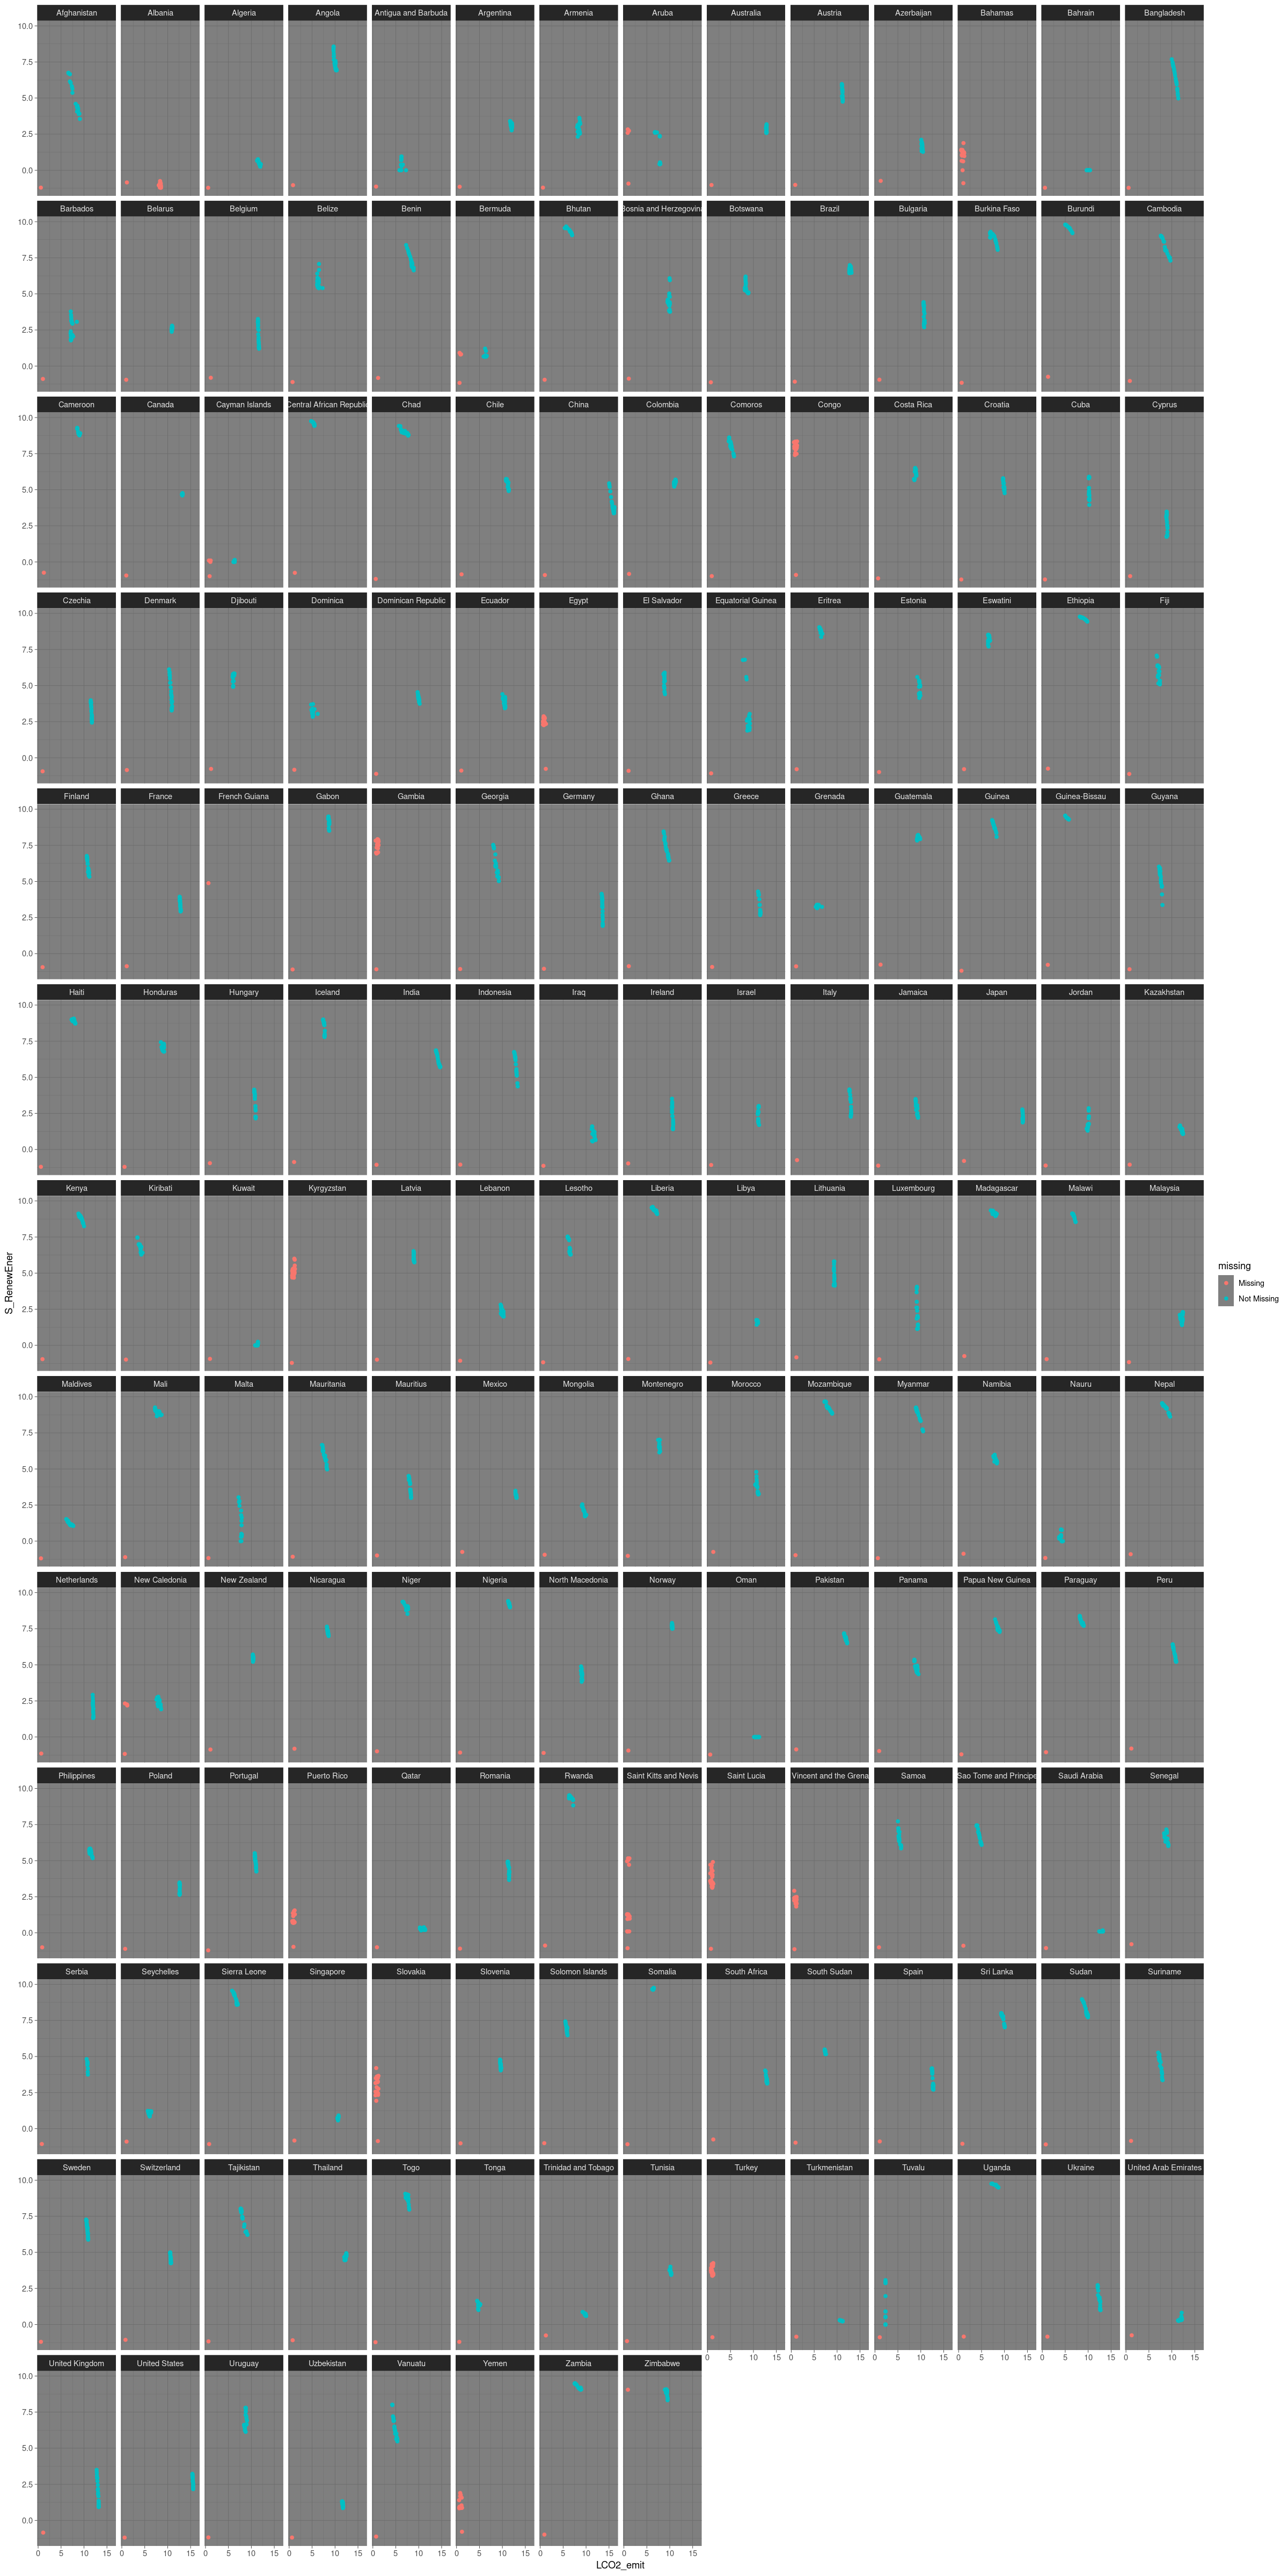

In [88]:
# Types of missing data
options(repr.plot.width = 20, repr.plot.height = 40)
ggplot(globDatNa, 
       aes(x = LCO2_emit, 
           y = S_RenewEner)) + 
  geom_miss_point() + 
  facet_wrap(~Entity)+ 
  theme_dark()

As seen in the figure above, the missing data regarding "LCO2_emit" and "S_renew_ener" is not equally distributed between the countries. For some countries the number of missing data is somtetimes larger that the amount of data available. This points to missing data being MAR or MNAR, making the use of Amelia II possible. 

[1] 3649   18

[1] "Year"            "LCO2_emit"       "S_RenewEner"     "S.ElecAcce."    
 [5] "S.CleFueAcce."   "L.FossElec."     "L.NuclElec."     "L.RenewElec."   
 [9] "S.LowCarbElec."  "L.EnerCons.cpt." "L.EnerIntens."   "L.GDP.cpt."     
[13] "L.PopDens."      "L.Area."         "gdp_growth"      "Latitude"       
[17] "Longitude"

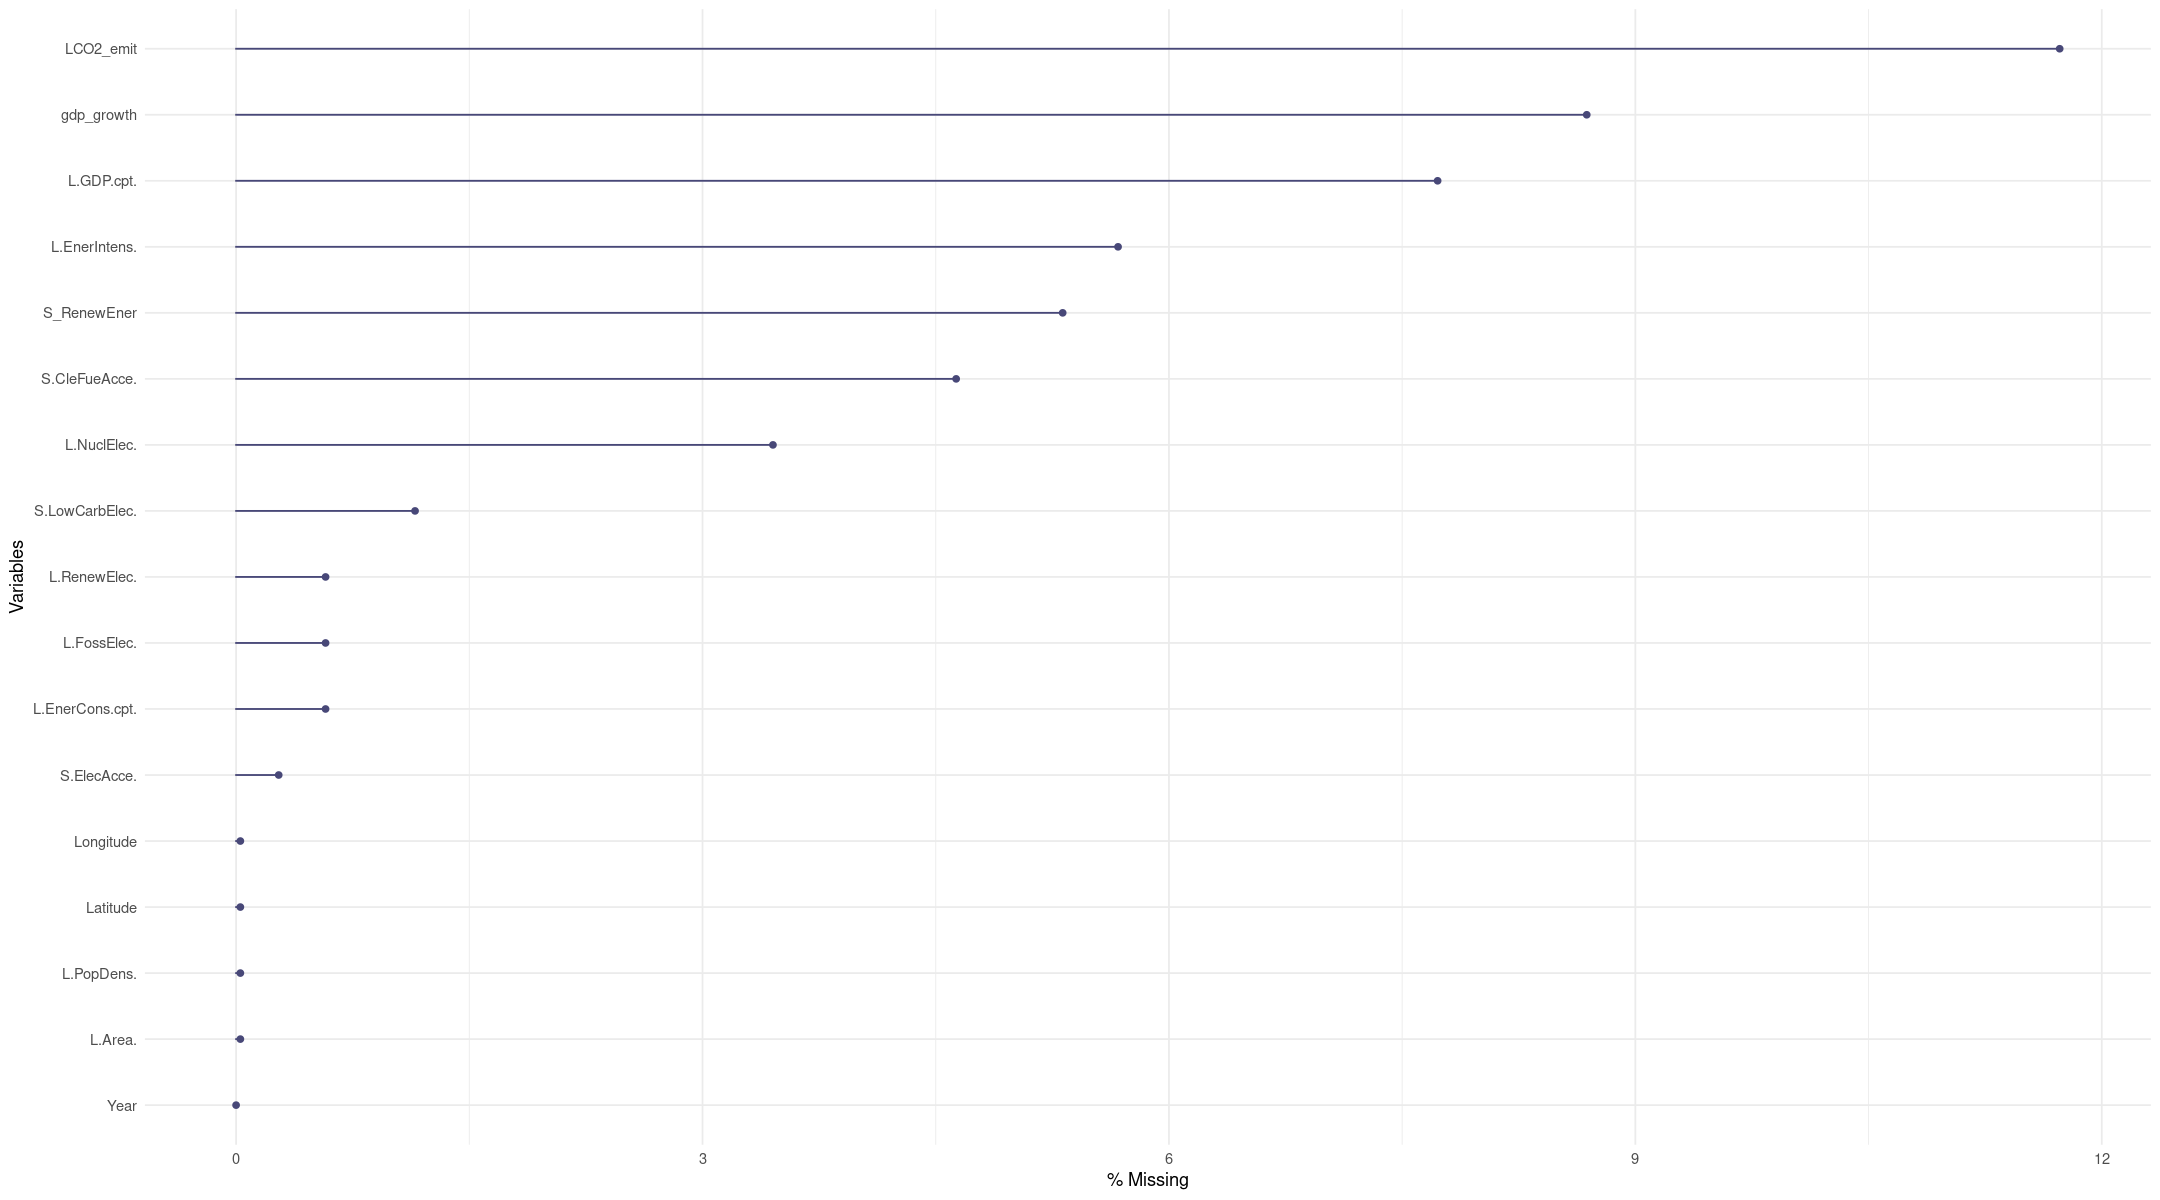

In [89]:
options(repr.plot.width = 18, repr.plot.height = 10)

dim(globDatNa)
globDatNa <- globDatNa[,-c(1)]   # Want only quantitative variables, so remove the 'Entity' variable
colnames(globDatNa)
gg_miss_var(globDatNa, show_pct=TRUE)

### Preparing the methods
We tested completion by Last Observation Carried Forward (LOCF), mean, median, KNN- algorithm, missForest and Amelia II.

In [90]:
# Last Observation Carried Forward (LOCF)

globDatNa.locf = na.locf(globDatNa, na.rm=FALSE)    # Forward
globDatNa.locf = na.locf(globDatNa.locf, na.rm = FALSE, fromLast = TRUE)  # Backward (NOCB)

In [91]:
# Completion by mean
mea = apply(globDatNa, 2, mean,na.rm=TRUE)
globDatNa.mea = globDatNa
ind.na = which(is.na(globDatNa.mea),arr.ind=TRUE)
globDatNa.mea[ind.na] = mea[ind.na[,2]]

In [92]:
# Completion by median

med = apply(globDatNa, 2, median, na.rm=TRUE)
globDatNa.med = globDatNa
ind.na = which(is.na(globDatNa.med),arr.ind=TRUE)
globDatNa.med[ind.na] = med[ind.na[,2]]

In [93]:
# Completion by KNN
globDatNa.kNN = kNN(globDatNa, k=5, imp_var=FALSE)

In [94]:
# Completion by MissForest
globDatNa.mf = missForest(globDatNa, maxiter=100, verbose=TRUE)

  missForest iteration 1 in progress...done!
    estimated error(s): 0.00600972 
    difference(s): 7.740991e-07 
    time: 51.807 seconds

  missForest iteration 2 in progress...done!
    estimated error(s): 0.005259299 
    difference(s): 8.377694e-08 
    time: 51.206 seconds

  missForest iteration 3 in progress...done!
    estimated error(s): 0.004840154 
    difference(s): 5.09005e-08 
    time: 52.237 seconds

  missForest iteration 4 in progress...done!
    estimated error(s): 0.005115902 
    difference(s): 4.416228e-08 
    time: 51.79 seconds

  missForest iteration 5 in progress...done!
    estimated error(s): 0.005366117 
    difference(s): 2.92162e-08 
    time: 53.491 seconds

  missForest iteration 6 in progress...done!
    estimated error(s): 0.004995041 
    difference(s): 4.049784e-08 
    time: 53.179 seconds



In [95]:
# Completion by AMELIA II
globDatNa.amelia = amelia(globDatNa, m=5) 
summary(globDatNa.amelia)

-- Imputation 1 --

  1  2  3  4  5  6

-- Imputation 2 --

  1  2  3  4  5  6  7

-- Imputation 3 --

  1  2  3  4  5

-- Imputation 4 --

  1  2  3  4  5  6  7

-- Imputation 5 --

  1  2  3  4  5  6


Amelia output with 5 imputed datasets.
Return code:  1 
Message:  Normal EM convergence. 

Chain Lengths:
--------------
Imputation 1:  6
Imputation 2:  7
Imputation 3:  5
Imputation 4:  7
Imputation 5:  6

Rows after Listwise Deletion:  2868 
Rows after Imputation:  3649 
Patterns of missingness in the data:  32 

Fraction Missing for original variables: 
-----------------------------------------

                Fraction Missing
Year                0.0000000000
LCO2_emit           0.1172924089
S_RenewEner         0.0531652508
S.ElecAcce.         0.0027404768
S.CleFueAcce.       0.0463140586
L.FossElec.         0.0057550014
L.NuclElec.         0.0345300082
L.RenewElec.        0.0057550014
S.LowCarbElec.      0.0115100027
L.EnerCons.cpt.     0.0057550014
L.EnerIntens.       0.056727870

In [96]:
globDatNa.amelia.mean = (globDatNa.amelia$imputations$imp1 + globDatNa.amelia$imputations$imp2 + 
                         globDatNa.amelia$imputations$imp3 + globDatNa.amelia$imputations$imp4 + 
                         globDatNa.amelia$imputations$imp5)/5

In [97]:
# Creating training and test set

#LOCF
inTrain = createDataPartition(globDatNa.locf[,2], 2, p = 0.8, list = FALSE)
trainDatLOCF = globDatNa.locf[inTrain,]
testDatLOCF = globDatNa.locf[-inTrain,]
colnames(trainDatLOCF) <- make.names(colnames(trainDatLOCF))   # Formatting the training and test datasets for use of Rpart
colnames(testDatLOCF) <- make.names(colnames(testDatLOCF))


# Completion by mean
inTrain = createDataPartition(globDatNa.mea[,2],p = 0.8, list = FALSE)
trainDatMea = globDatNa.mea[inTrain,]
testDatMea = globDatNa.mea[-inTrain,]
colnames(trainDatMea) <- make.names(colnames(trainDatMea))   # Formatting the training and test datasets for use of Rpart
colnames(testDatMea) <- make.names(colnames(testDatMea))

# Completion by median
inTrain = createDataPartition(globDatNa.med[,2],p = 0.8, list = FALSE)
trainDatMed = globDatNa.med[inTrain,]
testDatMed = globDatNa.med[-inTrain,]
colnames(trainDatMed) <- make.names(colnames(trainDatMed))   # Formatting the training and test datasets for use of Rpart
colnames(testDatMed) <- make.names(colnames(testDatMed))

# Completion by KNN
inTrain = createDataPartition(globDatNa.kNN[,2],p = 0.8, list = FALSE)
trainDatKNN = globDatNa.kNN[inTrain,]
testDatKNN = globDatNa.kNN[-inTrain,]
colnames(trainDatKNN) <- make.names(colnames(trainDatKNN))   # Formatting the training and test datasets for use of Rpart
colnames(testDatKNN) <- make.names(colnames(testDatKNN))

# Completion by MissForest
inTrain = createDataPartition(globDatNa.mf$ximp[,2],p = 0.8, list = FALSE)
trainDatMF = globDatNa.mf$ximp[inTrain,]
testDatMF = globDatNa.mf$ximp[-inTrain,]
colnames(trainDatMF) <- make.names(colnames(trainDatMF))   # Formatting the training and test datasets for use of Rpart
colnames(testDatMF) <- make.names(colnames(testDatMF))

# Completion by Amelia II
inTrain = createDataPartition(globDatNa.amelia.mean[,2], p = 0.8, list = FALSE)
trainDatAmelia = globDatNa.amelia.mean[inTrain,]
testDatAmelia = globDatNa.amelia.mean[-inTrain,]
colnames(trainDatAmelia) <- make.names(colnames(trainDatAmelia))   # Formatting the training and test datasets for use of Rpart
colnames(testDatAmelia) <- make.names(colnames(testDatAmelia))

### Testing the imputation algorithms
#### Linear regression

In [98]:
# Testing linear regression

x.mat = model.matrix(LCO2_emit ~ . -1, data = trainDatLOCF)
reg.lasso.cv.locf <- cv.glmnet(y = trainDatLOCF$LCO2_emit, x = x.mat)
fit.lasso.locf <- predict(reg.lasso.cv.locf, s = "lambda.min", newx = x.mat)
res.lasso.locf <- trainDatLOCF$LCO2_emit - fit.lasso.locf
errTrainLinLOCF = round(mean(res.lasso.locf^2),4)

x.mat = model.matrix(LCO2_emit ~ . -1, data = trainDatMea)
reg.lasso.cv.mea <- cv.glmnet(y = trainDatMea$LCO2_emit, x = x.mat)
fit.lasso.mea <- predict(reg.lasso.cv.mea, s = "lambda.min", newx = x.mat)
res.lasso.mea <- trainDatMea$LCO2_emit - fit.lasso.mea
errTrainLinMea = round(mean(res.lasso.mea^2),4)

x.mat = model.matrix(LCO2_emit ~ . -1, data = trainDatMed)
reg.lasso.cv.med <- cv.glmnet(y = trainDatMed$LCO2_emit, x = x.mat)
fit.lasso.med <- predict(reg.lasso.cv.med, s = "lambda.min", newx = x.mat)
res.lasso.med <- trainDatMed$LCO2_emit - fit.lasso.med
errTrainLinMed = round(mean(res.lasso.med^2),4)

x.mat = model.matrix(LCO2_emit ~ . -1, data = trainDatKNN)
reg.lasso.cv.knn <- cv.glmnet(y = trainDatKNN$LCO2_emit, x = x.mat)
fit.lasso.knn <- predict(reg.lasso.cv.knn, s = "lambda.min", newx = x.mat)
res.lasso.knn <- trainDatKNN$LCO2_emit - fit.lasso.knn
errTrainLinKNN = round(mean(res.lasso.knn^2),4)

x.mat = model.matrix(LCO2_emit ~ . -1, data = trainDatMF)
reg.lasso.cv.mf <- cv.glmnet(y = trainDatMF$LCO2_emit, x = x.mat)
fit.lasso.mf <- predict(reg.lasso.cv.mf, s = "lambda.min", newx = x.mat)
res.lasso.mf <- trainDatMF$LCO2_emit - fit.lasso.mf
errTrainLinMF = round(mean(res.lasso.mf^2),4)

x.mat = model.matrix(LCO2_emit ~ . -1, data = trainDatAmelia)
reg.lasso.cv.amelia <- cv.glmnet(y = trainDatAmelia$LCO2_emit, x = x.mat)
fit.lasso.amelia <- predict(reg.lasso.cv.amelia, s = "lambda.min", newx = x.mat)
res.lasso.amelia <- trainDatAmelia$LCO2_emit - fit.lasso.amelia
errTrainLinAmelia = round(mean(res.lasso.amelia^2),4)

In [99]:
x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDatLOCF)
pred.lin.locf <- predict(reg.lasso.cv.locf, newx= x.mat, s='lambda.1se')
errTestLinLOCF = round(sum((pred.lin.locf-testDatLOCF$LCO2_emit)^2)/nrow(testDatLOCF), 5)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDatMea)
pred.lin.mea <- predict(reg.lasso.cv.mea, newx= x.mat, s='lambda.1se')
errTestLinMea = round(sum((pred.lin.mea-testDatMea$LCO2_emit)^2)/nrow(testDatMea), 5)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDatMed)
pred.lin.med <- predict(reg.lasso.cv.med, newx= x.mat, s='lambda.1se')
errTestLinMed = round(sum((pred.lin.med-testDatMed$LCO2_emit)^2)/nrow(testDatMed), 5)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDatKNN)
pred.lin.knn <- predict(reg.lasso.cv.knn, newx= x.mat, s='lambda.1se')
errTestLinKNN = round(sum((pred.lin.knn-testDatKNN$LCO2_emit)^2)/nrow(testDatKNN), 5)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDatMF)
pred.lin.mf <- predict(reg.lasso.cv.mf, newx= x.mat, s='lambda.1se')
errTestLinMF = round(sum((pred.lin.mf-testDatMF$LCO2_emit)^2)/nrow(testDatMF), 5)

x.mat <- model.matrix(LCO2_emit ~ . -1, data = testDatAmelia)
pred.lin.amelia <- predict(reg.lasso.cv.amelia, newx= x.mat, s='lambda.1se')
errTestLinAmelia = round(sum((pred.lin.amelia-testDatAmelia$LCO2_emit)^2)/nrow(testDatAmelia), 5)


In [100]:
print("Error on training sample for the different imputation methods:")
paste(" - LOCF:", errTrainLinLOCF)
paste(" - Mean:", errTrainLinMea)
paste(" - Median:", errTrainLinMed)
paste(" - KNN:", errTrainLinKNN)
paste(" - MissForest", errTrainLinMF)
paste(" - Amelia", errTrainLinAmelia)

print("Error on test sample for the different imputation methods:")
paste(" - LOCF:", errTestLinLOCF)
paste(" - Mean:", errTestLinMea)
paste(" - Median:", errTestLinMed)
paste(" - KNN:", errTestLinKNN)
paste(" - MissForest", errTestLinMF)
paste(" - Amelia", errTestLinAmelia)


[1] "Error on training sample for the different imputation methods:"


[1] " - LOCF: 0.4841"

[1] " - Mean: 0.6781"

[1] " - Median: 0.69"

[1] " - KNN: 0.4376"

[1] " - MissForest 0.1029"

[1] " - Amelia 0.083"

[1] "Error on test sample for the different imputation methods:"


[1] " - LOCF: 0.79032"

[1] " - Mean: 0.76247"

[1] " - Median: 0.72828"

[1] " - KNN: 0.36003"

[1] " - MissForest 0.10835"

[1] " - Amelia 0.0832"

The results are much higher than for linear regression on the original dataframe. However, the Amelia II and MissForest outperforms the rest prominently, giving comparable results to some of the methods obtained in the first part of the project.

We will not test the method performing best on the first part of the project, Random Forest.

#### Random Forest

In [101]:
# Testing Random Forest

rf.reg.tuned.locf = randomForest(LCO2_emit~., data = trainDatLOCF, mtry = mtry_best, xtest = testDatLOCF[,-c(16)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)

rf.reg.tuned.mea = randomForest(LCO2_emit~., data = trainDatMea, mtry = mtry_best, xtest = testDatMea[,-c(16)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)

rf.reg.tuned.med = randomForest(LCO2_emit~., data = trainDatMed, mtry = mtry_best, xtest = testDatMed[,-c(16)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)

rf.reg.tuned.knn = randomForest(LCO2_emit~., data = trainDatKNN, mtry = mtry_best, xtest = testDatKNN[,-c(16)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)

rf.reg.tuned.mf = randomForest(LCO2_emit~., data = trainDatMF, mtry = mtry_best, xtest = testDatMF[,-c(16)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)

rf.reg.tuned.amelia = randomForest(LCO2_emit~., data = trainDatAmelia, mtry = mtry_best, xtest = testDatAmelia[,-c(16)], 
                             ytest=testDat$LCO2_emit, ntree=500, do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 | 0.007604     0.13 |    10.55   152.47 |
 100 | 0.006437     0.11 |    9.781   141.39 |
 150 |  0.00582     0.10 |     9.64   139.35 |
 200 |  0.00588     0.10 |    9.773   141.27 |
 250 | 0.005744     0.10 |    9.845   142.32 |
 300 | 0.005707     0.10 |    9.891   142.98 |
 350 | 0.005571     0.09 |    9.822   141.98 |
 400 |  0.00539     0.09 |    9.812   141.83 |
 450 | 0.005269     0.09 |    9.785   141.44 |
 500 | 0.005208     0.09 |    9.745   140.86 |
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.08661     1.60 |    6.312   138.54 |
 100 |  0.07625     1.41 |    6.641   145.76 |
 150 |  0.07638     1.41 |    7.014   153.95 |
 200 |  0.07663     1.41 |    7.226   158.58 |
 250 |   0.0769     1.42 |    7.179   157.56 |
 300 |  0.07799     1.44 |    7.358   161.50 |
 350 |  0.07829     1.44 |    7.337   161.02 |
 400 |  0.077

In [102]:
fit.rfr.locf = rf.reg.tuned.locf$predicted
res.rfr.locf = fit.rfr.locf - trainDatLOCF$LCO2_emit
errTrainRFLocf = round(mean(res.rfr.locf^2),4)
pred.rfr.locf = rf.reg.tuned.locf$test$predicted
errTestRFLocf = MSE(pred.rfr.locf, dataset=testDatLOCF)
RRFLOCF = R_squared(pred.rfr.locf, dataset=testDatLOCF)
#errTestRFLocf = round(sum((pred.rfr.locf-testDatLOCF$LCO2_emit)^2)/nrow(testDatLOCF), 5)

fit.rfr.mea = rf.reg.tuned.mea$predicted
res.rfr.mea = fit.rfr.mea - trainDatMea$LCO2_emit
errTrainRFMea = round(mean(res.rfr.mea^2),4)
pred.rfr.mea = rf.reg.tuned.mea$test$predicted
errTestRFMea = MSE(pred.rfr.mea, dataset=testDatMea)
RRFMea = R_squared(pred.rfr.mea, dataset=testDatMea)
#errTestRFMea = round(sum((pred.rfr.mea-testDatMea$LCO2_emit)^2)/nrow(testDatMea), 5)

fit.rfr.med = rf.reg.tuned.med$predicted
res.rfr.med = fit.rfr.med - trainDatMed$LCO2_emit
errTrainRFMed = round(mean(res.rfr.med^2),4)
pred.rfr.med = rf.reg.tuned.med$test$predicted
errTestRFMed = MSE(pred.rfr.med, dataset=testDatMed)
RRFMed = R_squared(pred.rfr.med, dataset=testDatMed)
#errTestRFMed = round(sum((pred.rfr.med -testDatMed$LCO2_emit)^2)/nrow(testDatMed), 5)

fit.rfr.knn = rf.reg.tuned.knn$predicted
res.rfr.knn = fit.rfr.knn - trainDatKNN$LCO2_emit
errTrainRFKnn = round(mean(res.rfr.knn^2),4)
pred.rfr.knn = rf.reg.tuned.knn$test$predicted
errTestRFKnn = MSE(pred.rfr.knn, dataset=testDatKNN)
RRFKNN = R_squared(pred.rfr.knn, dataset=testDatKNN)
#errTestRFKnn = round(sum((pred.rfr.knn-testDatKNN$LCO2_emit)^2)/nrow(testDatKNN), 5)

fit.rfr.mf = rf.reg.tuned.mf$predicted
res.rfr.mf = fit.rfr.mf - trainDatMF$LCO2_emit
errTrainRFMf = round(mean(res.rfr.mf^2),4)
pred.rfr.mf = rf.reg.tuned.mf$test$predicted
errTestRFMf = MSE(pred.rfr.mf, dataset=testDatMF)
RRFMF = R_squared(pred.rfr.mf, dataset=testDatMF)
#errTestRFMf = round(sum((pred.rfr.mf-testDatMF$LCO2_emit)^2)/nrow(testDatMF), 5)

fit.rfr.amelia = rf.reg.tuned.amelia$predicted
res.rfr.amelia = fit.rfr.amelia - trainDatAmelia$LCO2_emit
errTrainRFAmelia = round(mean(res.rfr.amelia^2),4)
pred.rfr.amelia = rf.reg.tuned.amelia$test$predicted
errTestRFAmelia = MSE(pred.rfr.amelia, dataset=testDatAmelia)
RRFAmelia = R_squared(pred.rfr.amelia, dataset=testDatAmelia)
#errTestRFAmelia = round(sum((pred.rfr.amelia-testDatAmelia$LCO2_emit)^2)/nrow(testDatAmelia), 5)

In [103]:
# Mean squared error
print("Error on training sample for the different imputation methods:")
paste(" - LOCF:", errTrainRFLocf)
paste(" - Mean:", errTrainRFMea)
paste(" - Median:", errTrainRFMed)
paste(" - KNN:", errTrainRFKnn)
paste(" - MissForest", errTrainRFMf)
paste(" - Amelia", errTrainRFAmelia)

print("MSE on test sample for the different imputation methods:")
paste(" - LOCF:", errTestRFLocf)
paste(" - Mean:", errTestRFMea)
paste(" - Median:", errTestRFMed)
paste(" - KNN:", errTestRFKnn)
paste(" - MissForest", errTestRFMf)
paste(" - Amelia", errTestRFAmelia)

print("R-squared on test sample for the different imputation methods:")
paste(" - LOCF:", RRFLOCF)
paste(" - Mean:", RRFMea)
paste(" - Median:", RRFMed)
paste(" - KNN:", RRFKNN)
paste(" - MissForest", RRFMF)
paste(" - Amelia", RRFAmelia)

[1] "Error on training sample for the different imputation methods:"


[1] " - LOCF: 0.0052"

[1] " - Mean: 0.0778"

[1] " - Median: 0.0685"

[1] " - KNN: 0.0915"

[1] " - MissForest 0.014"

[1] " - Amelia 0.0208"

[1] "MSE on test sample for the different imputation methods:"


[1] " - LOCF: 4.17590531553414"

[1] " - Mean: 4.06037955137407"

[1] " - Median: 3.68011291647047"

[1] " - KNN: 4.76089181311253"

[1] " - MissForest 5.3828538562241"

[1] " - Amelia 5.90938608446518"

[1] "R-squared on test sample for the different imputation methods:"


[1] " - LOCF: 0.9091"

[1] " - Mean: 0.9805"

[1] " - Median: 0.9827"

[1] " - KNN: 0.981"

[1] " - MissForest 0.9769"

[1] " - Amelia 0.975"

The training error are low since we tune the RF. However, the test error are enormous. Almost all methods of imputations work equally bad, but what is mroe surprising is that the MissForest and Amelia II which worked best for the linear model, are the ones the work the worst with Random Forest. This might be to the fact that the many iterations of Random Forest magnify the error for the first iteration, leading to the good results. It is though strange as the Random Forest is known to work very well with the MissForest. Either way, the naïve linear regression work the best and actually performs quite good on the missing values datas, even though it is simple.

## Conclusion on the project

To conclude, we can use several methods to predict one variable. Some of them have quite similar results and errors as Random Forest and Boosting for our case. It is important to adapt the method with the dataset and the variable we want to predict. For example, the linear regression is really easy to interpret and can have really good results for some dataset but for our, it was not the best choice.
  
Some variables were, for multiple methods and criterias, variables of importance, L.Area and L.PopDens for example. Those describe the total land area and the population density. The variable we wanted to predict is the one we named LCO2_emit which describes the carbon dioxide emission. It it thus not suprising that it is related to the previous variables. 